In [184]:
library(tidyverse, magrittr, ggdark)

In [276]:
source("../R/alg/cma-es-csa.R")
source("../R/alg/cma-es-expth.R")
source("../R/alg/cma-es-tpat.R")
source("../R/eval-funcs.R")
source("../R/plot-funcs.R")
options(repr.plot.width=20, repr.plot.height=10)

In [301]:
get_sigma = function(algs) {
    algs %>% purrr::map_dfr(function(alg) {
        data.frame(
            sigma = alg$diagnostic$sigma,
            bval = alg$diagnostic$bestVal
        ) %>% dplyr::mutate(label = alg$label)
    }) %>%
    dplyr::group_by(label) %>%
    dplyr::mutate(t = 1:dplyr::n()) %>%
    dplyr::ungroup()
}
plot_sigma = function(df, tmax = 500) {
    df %>%
    ggplot2::ggplot() +
    ggplot2::geom_line(aes(x = t, y = log10(sigma), col = label)) + 
    ggdark::dark_theme_bw() + 
    ggplot2::theme(
        axis.title = ggplot2::element_text(size = 15, face = "bold"),
        axis.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.title = ggplot2::element_text(size = 15, face = "bold"),
    ) + 
    xlim(0, tmax)
}
plot_bval = function(df, tmax = 500) {
    df %>%
    ggplot2::ggplot() +
    ggplot2::geom_line(aes(x = t, y = log10(abs(bval)), col = label)) + 
   ggdark::dark_theme_bw() +
    ggplot2::theme(
        axis.title = ggplot2::element_text(size = 15, face = "bold"),
        axis.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.title = ggplot2::element_text(size = 15, face = "bold"),
    ) + 
    xlim(0, tmax)
}

# Sphere function, sigma = 1

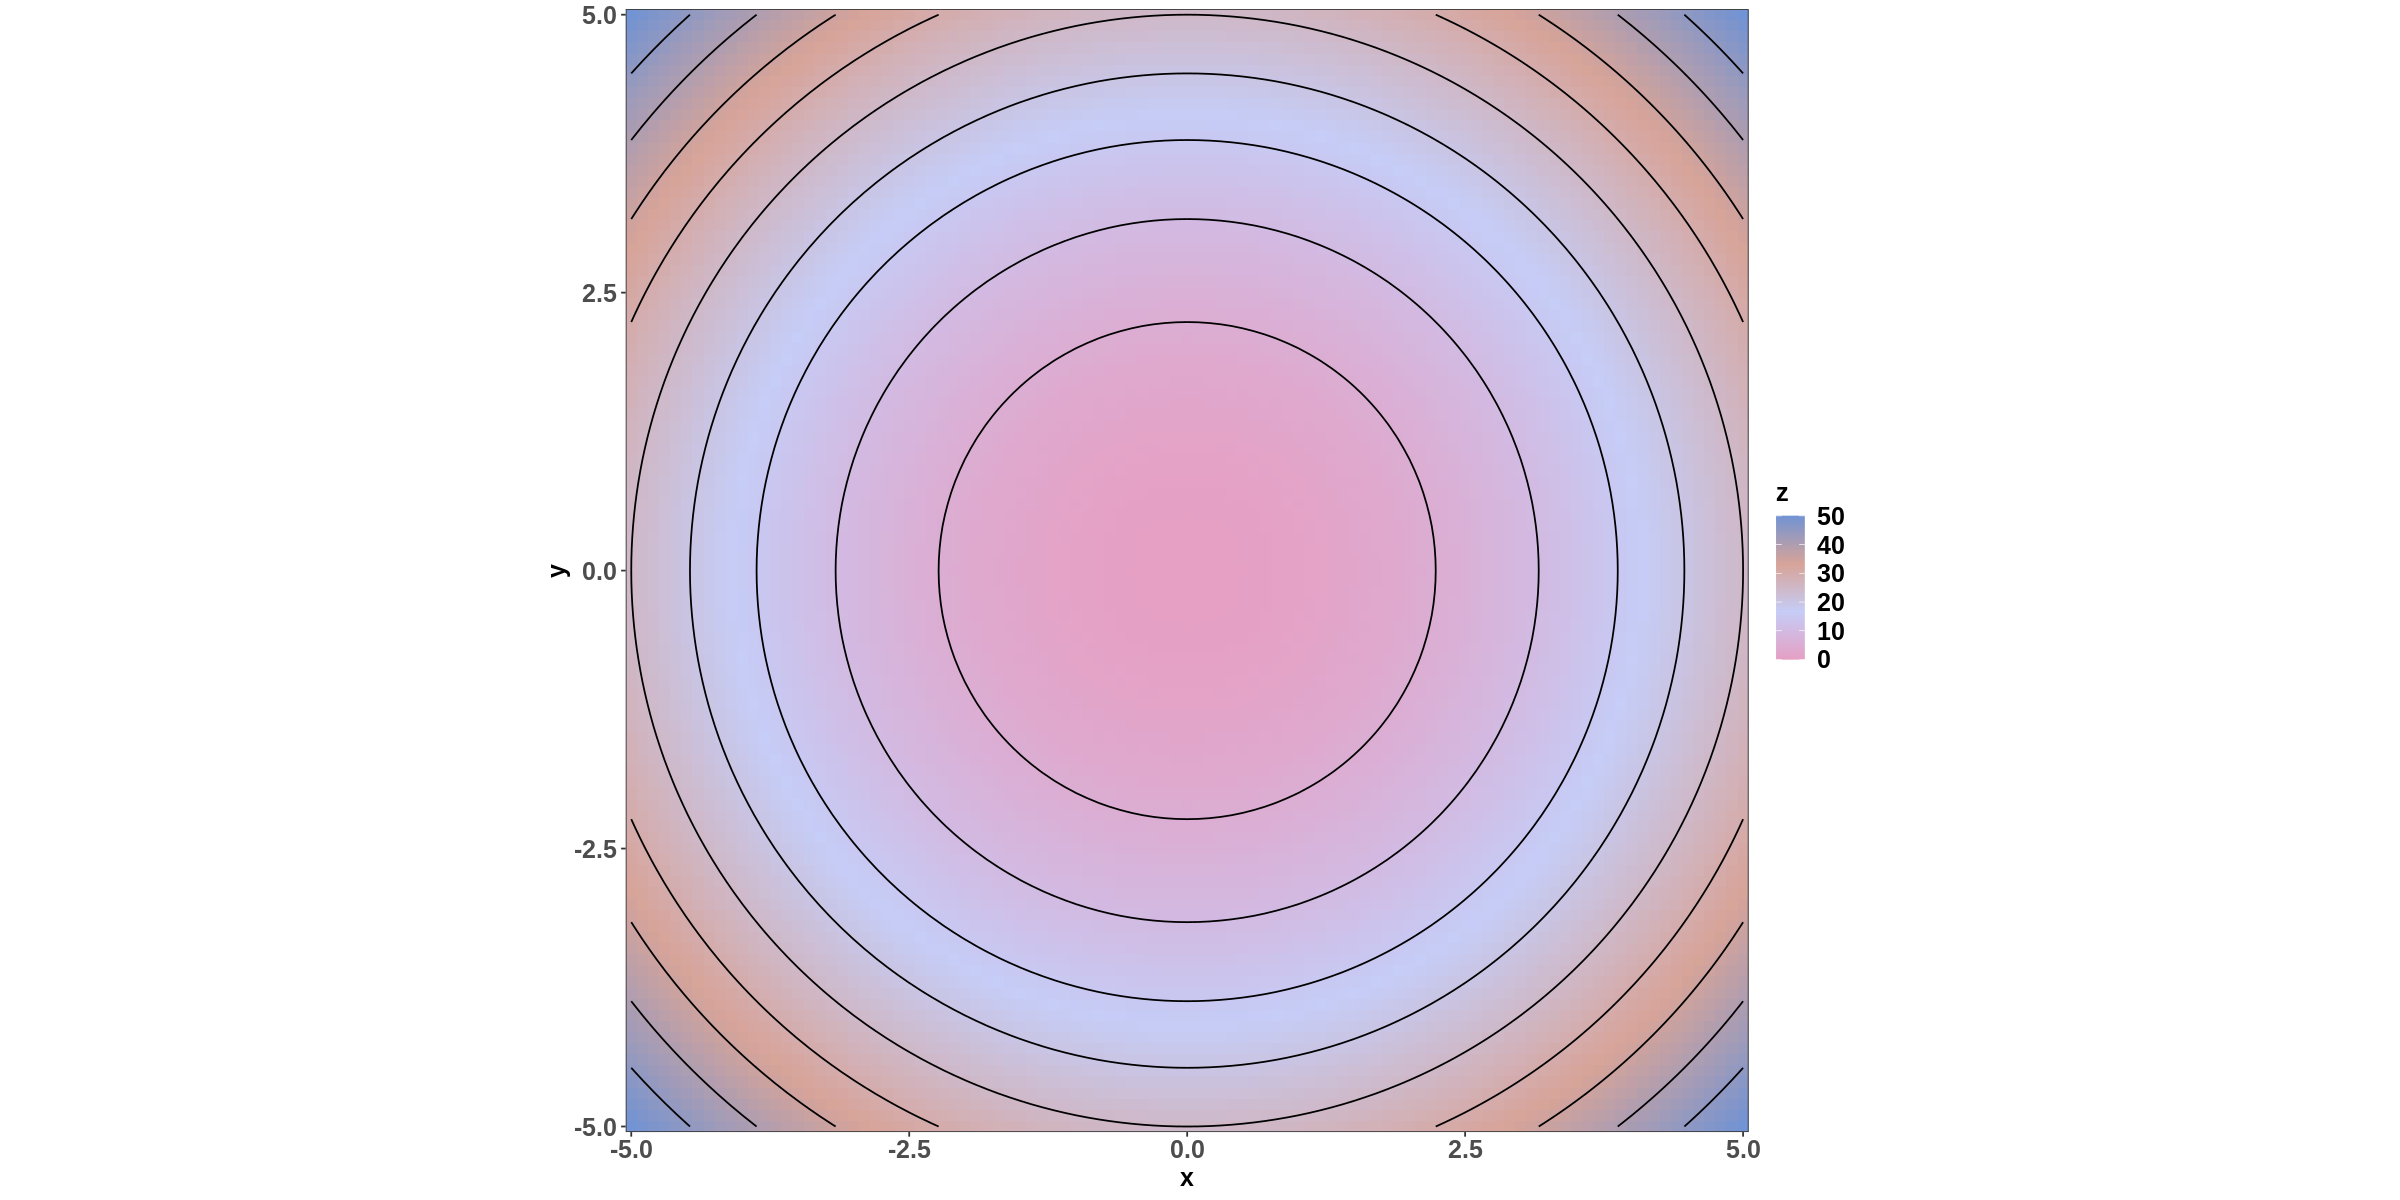

In [187]:
contour_plot(sphere_func, c(-5, 5), c(-5, 5))

## X_0 = (100, ..., 100)

In [188]:
x0 = rep(100, 10)
N = 10
maxiter = round((10000*N)/(4*N))

In [189]:
csa = 
    cma_es_csa(x0, fn = function(x) sphere_func(x), lower = -100, upper = 100)

In [190]:
ppmf = 
    cma_es_expth(x0, fn = function(x) sphere_func(x), lower = -100, upper = 100)

In [191]:
sigma_df = 
    list(csa, ppmf) %>% 
    get_sigma()

Warning message:
“Removed 1234 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1234 row(s) containing missing values (geom_path).”


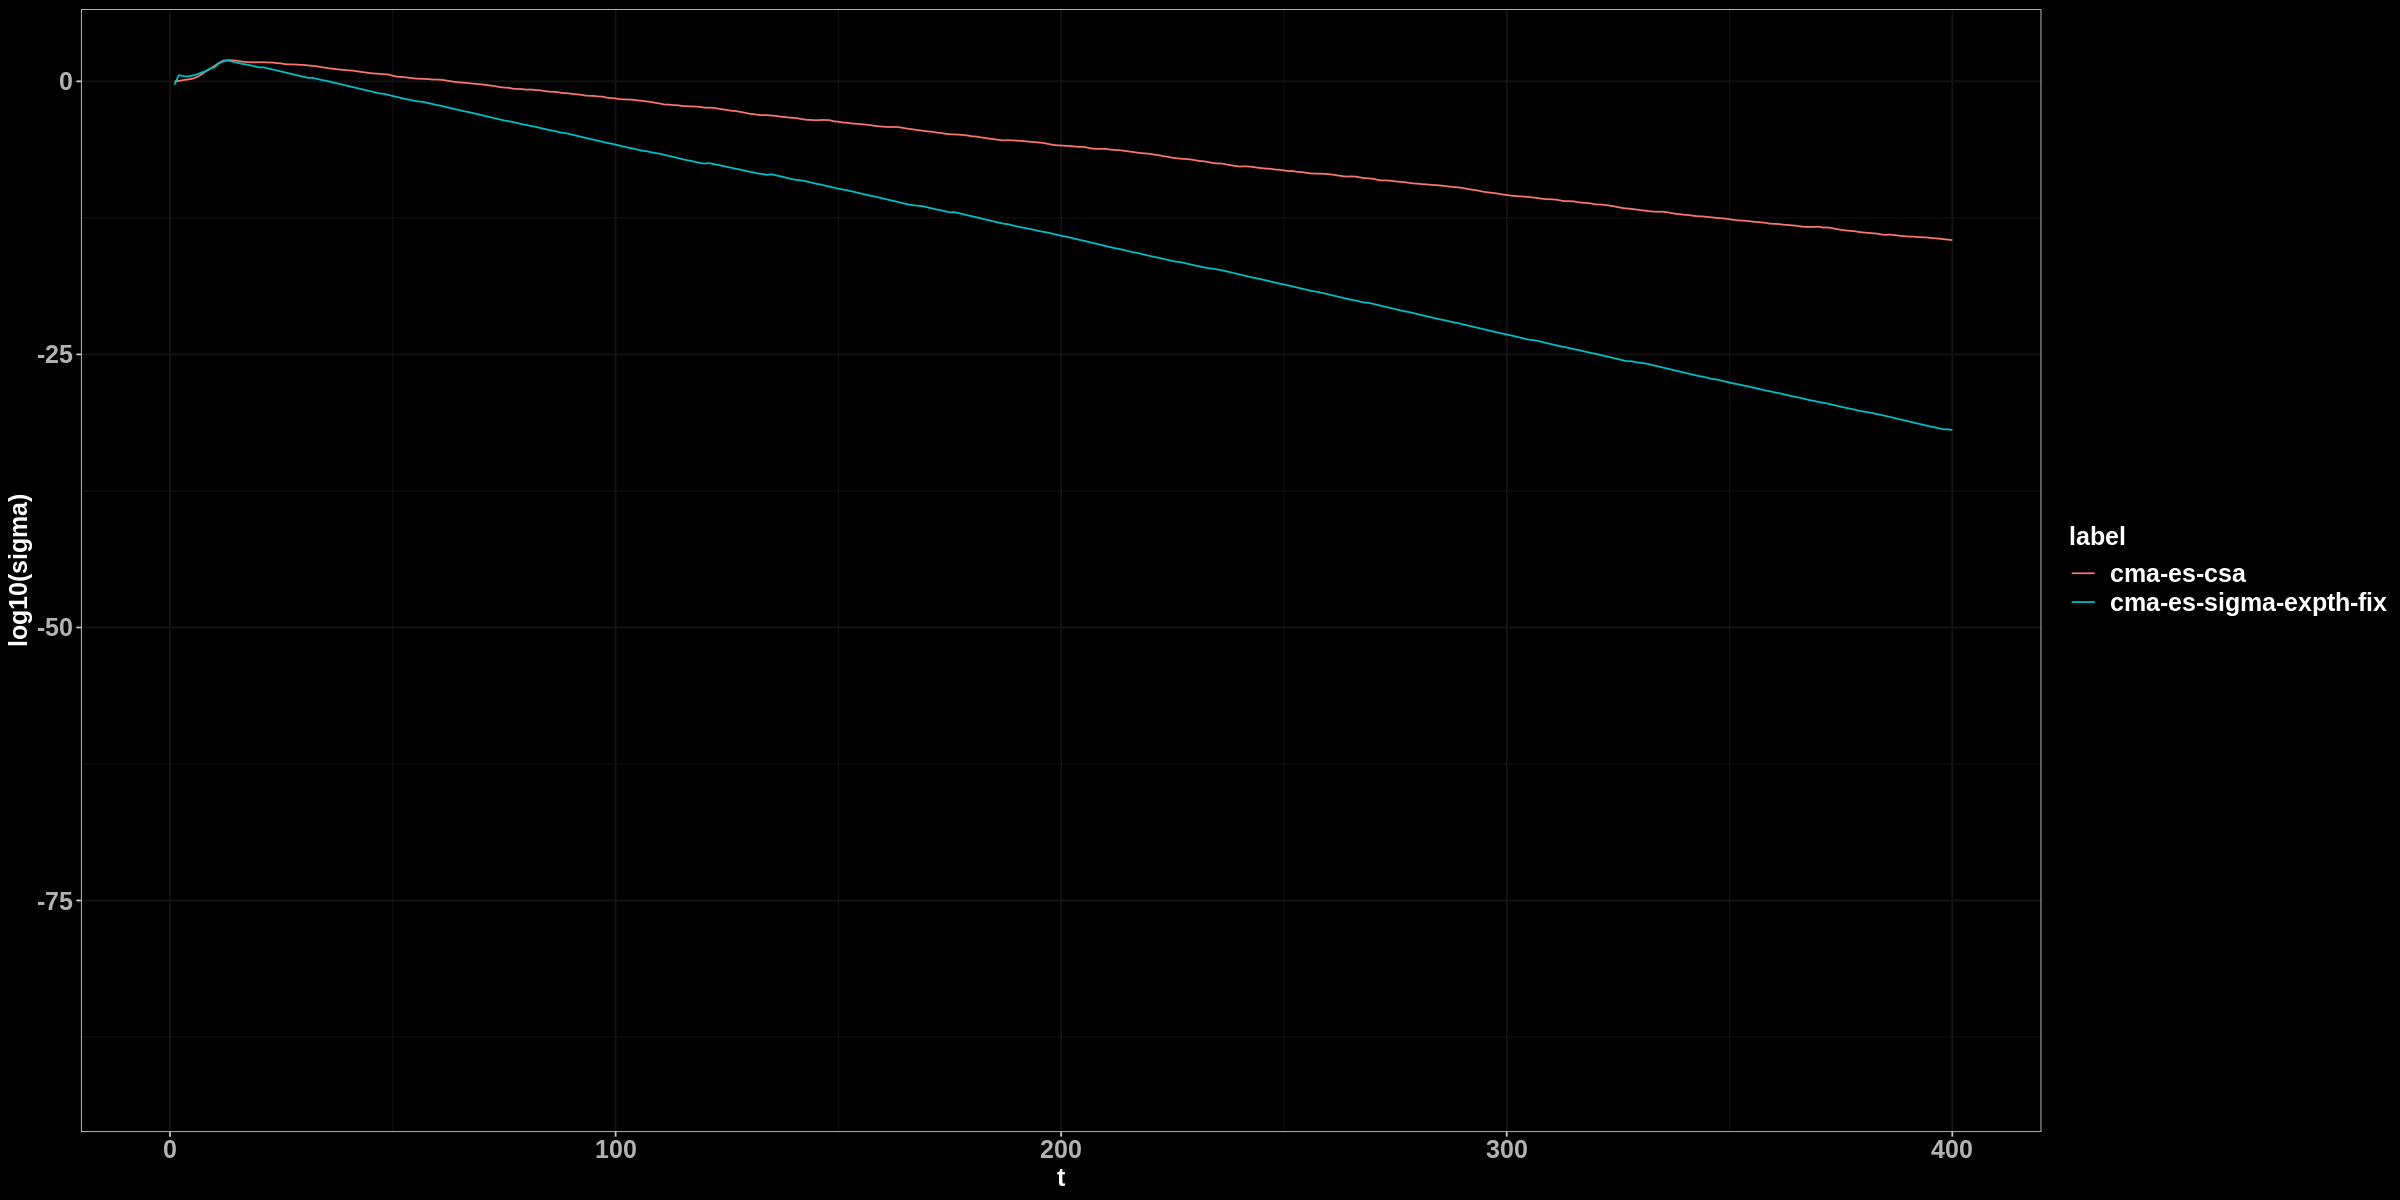

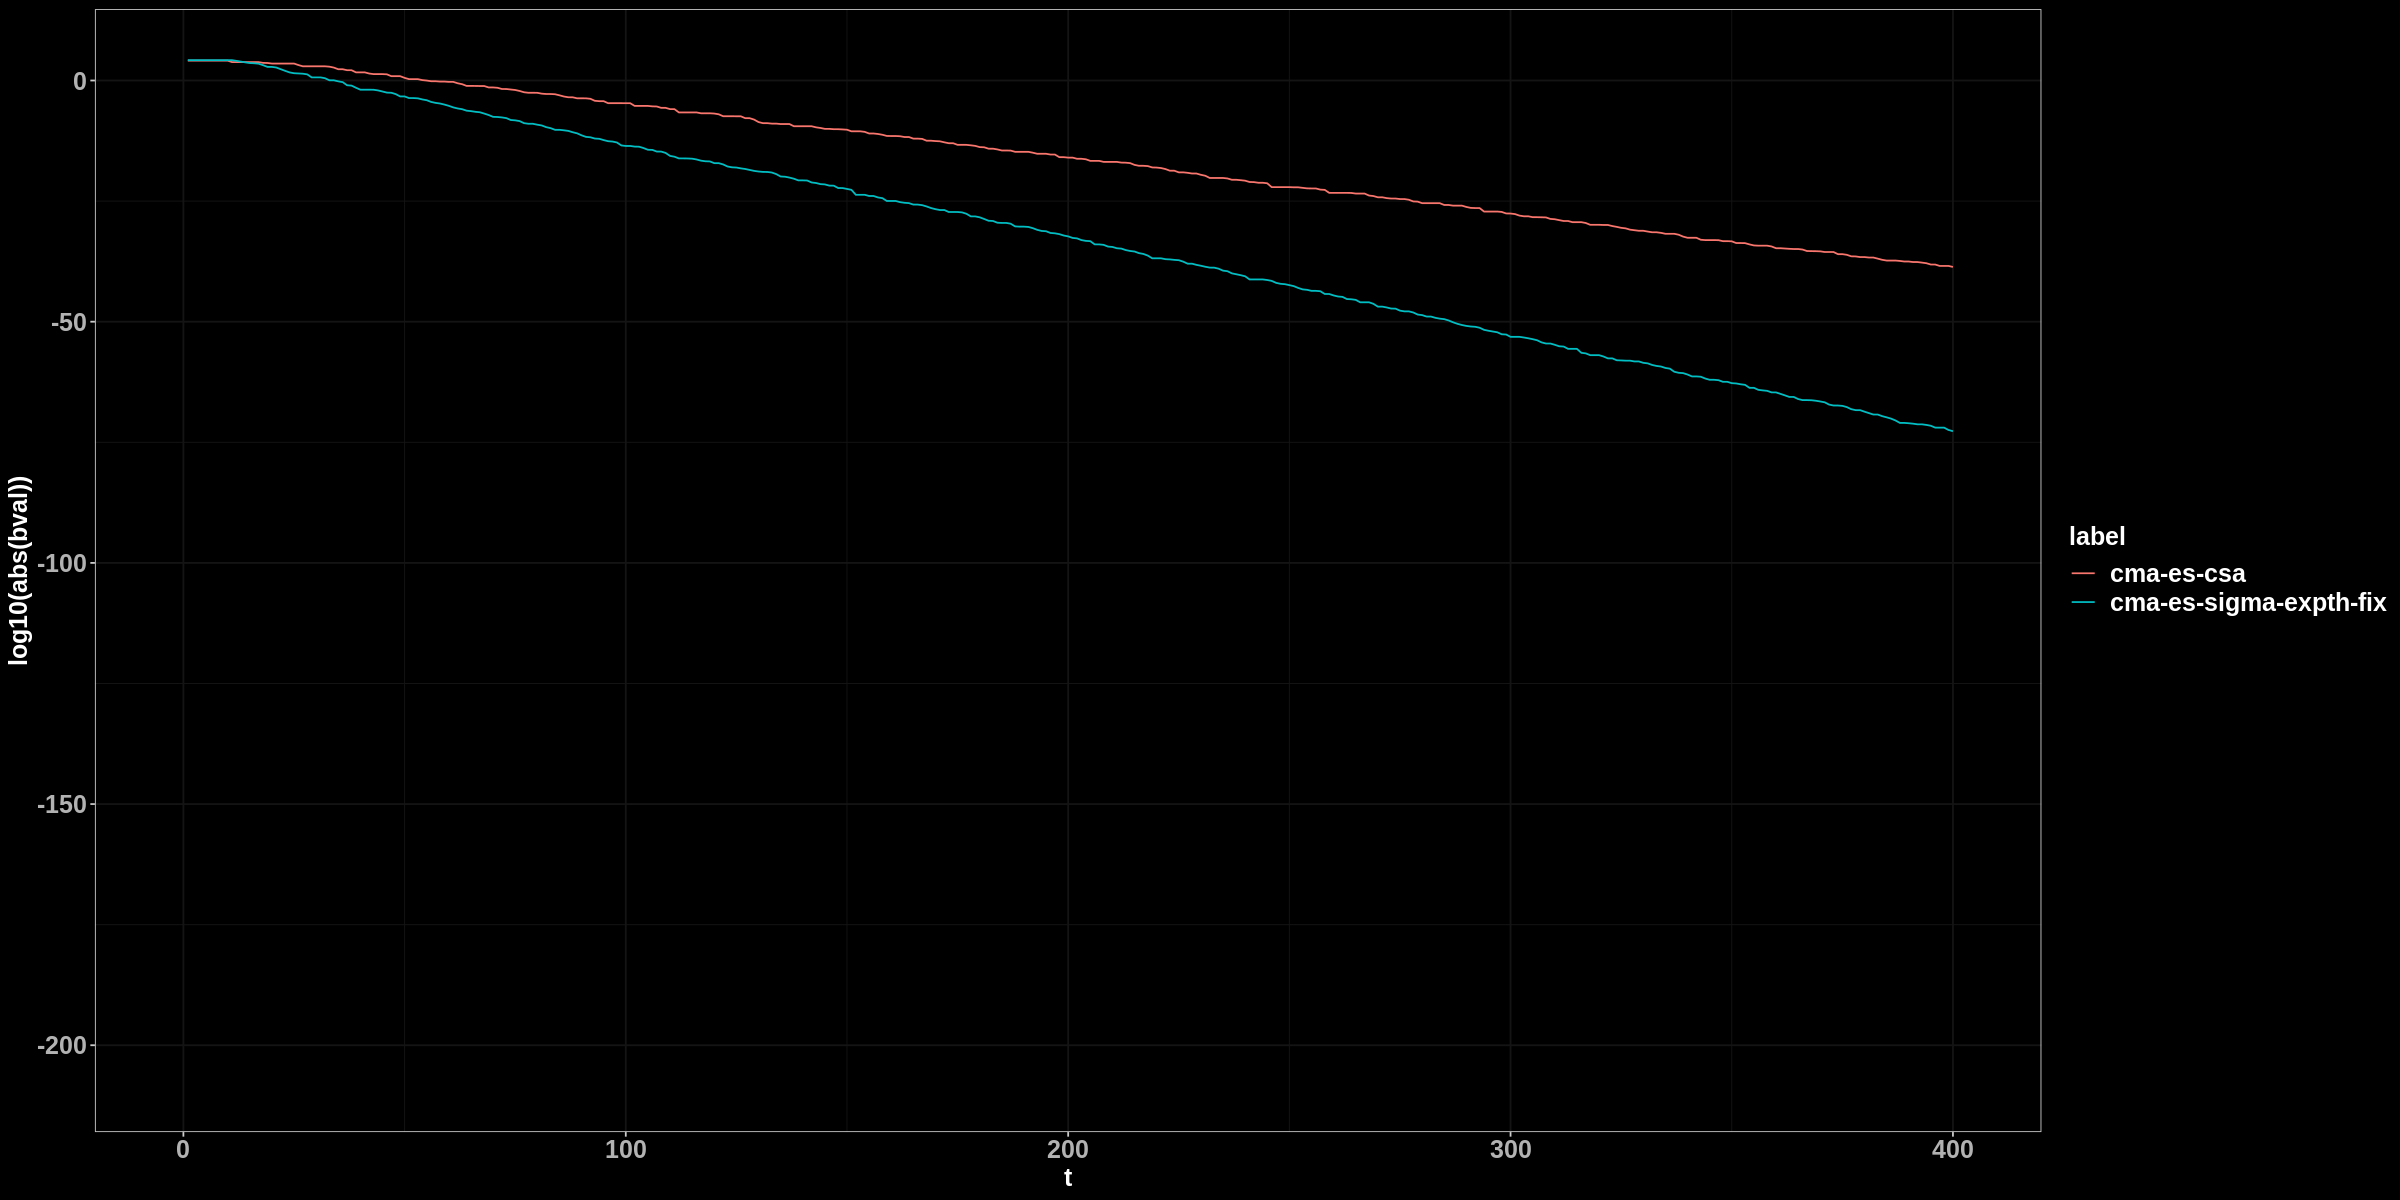

In [192]:
sigma_df %>% 
    plot_sigma(400)
sigma_df %>% 
    plot_bval(400)

## X_0 = (1, ..., 1)

In [193]:
x0 = rep(1, 10)
N = 10
maxiter = round((10000*N)/(4*N))

In [194]:
csa = 
    cma_es_csa(x0, fn = function(x) sphere_func(x), lower = -100, upper = 100)

In [195]:
ppmf = 
    cma_es_expth(x0, fn = function(x) sphere_func(x), lower = -100, upper = 100)

In [196]:
sigma_df = 
    list(csa, ppmf) %>% 
    get_sigma()

Warning message:
“Removed 1222 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1222 row(s) containing missing values (geom_path).”


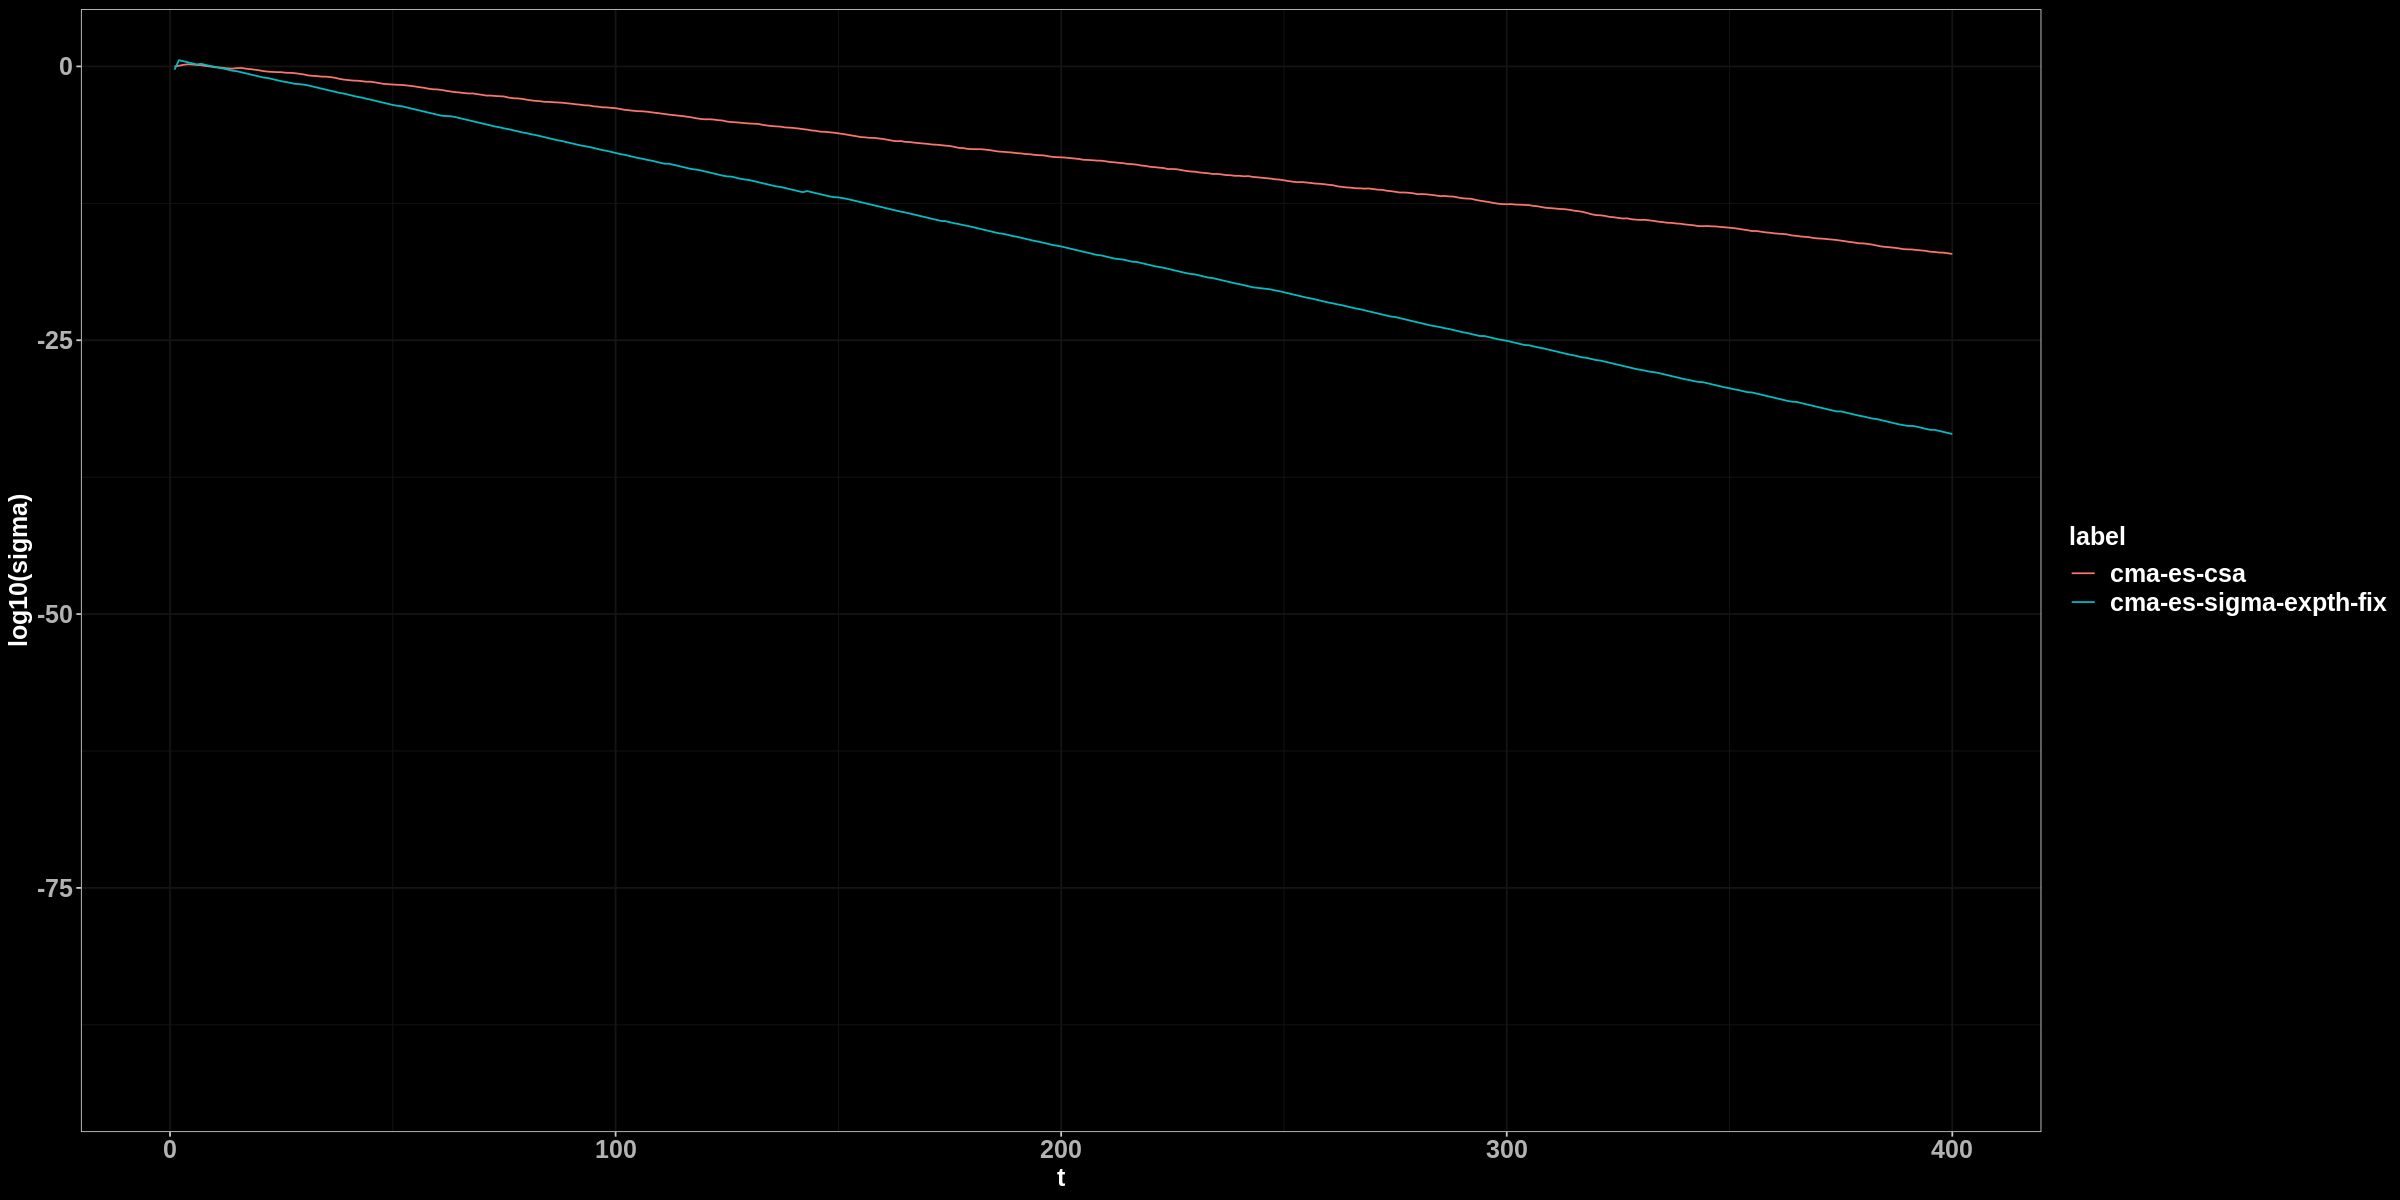

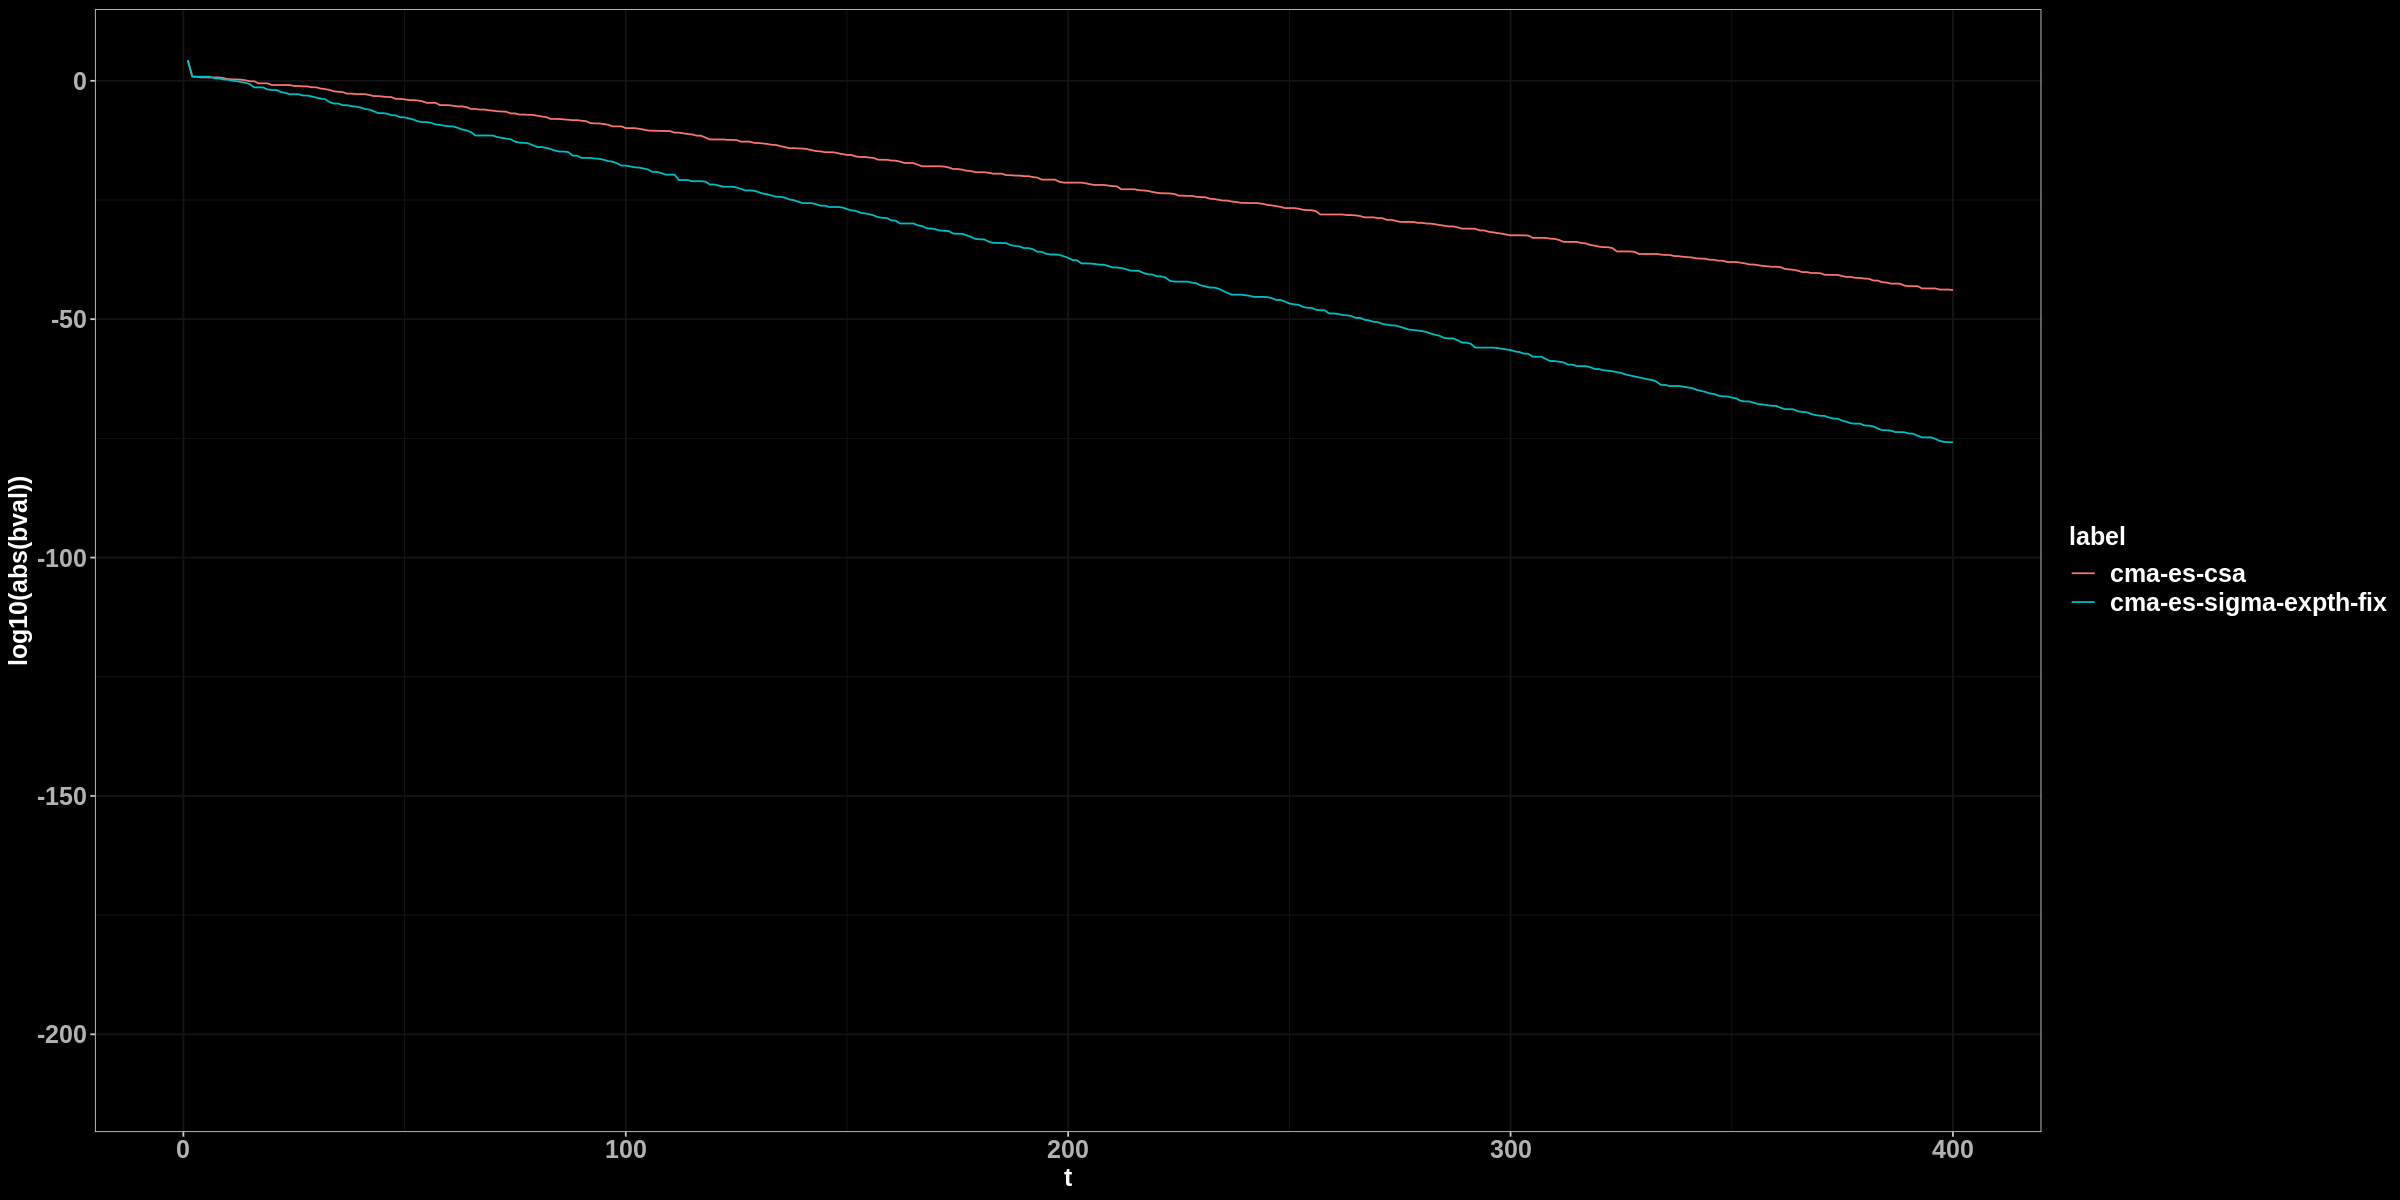

In [197]:
sigma_df %>% 
    plot_sigma(400)
sigma_df %>% 
    plot_bval(400)

# Linear function, sigma = 1

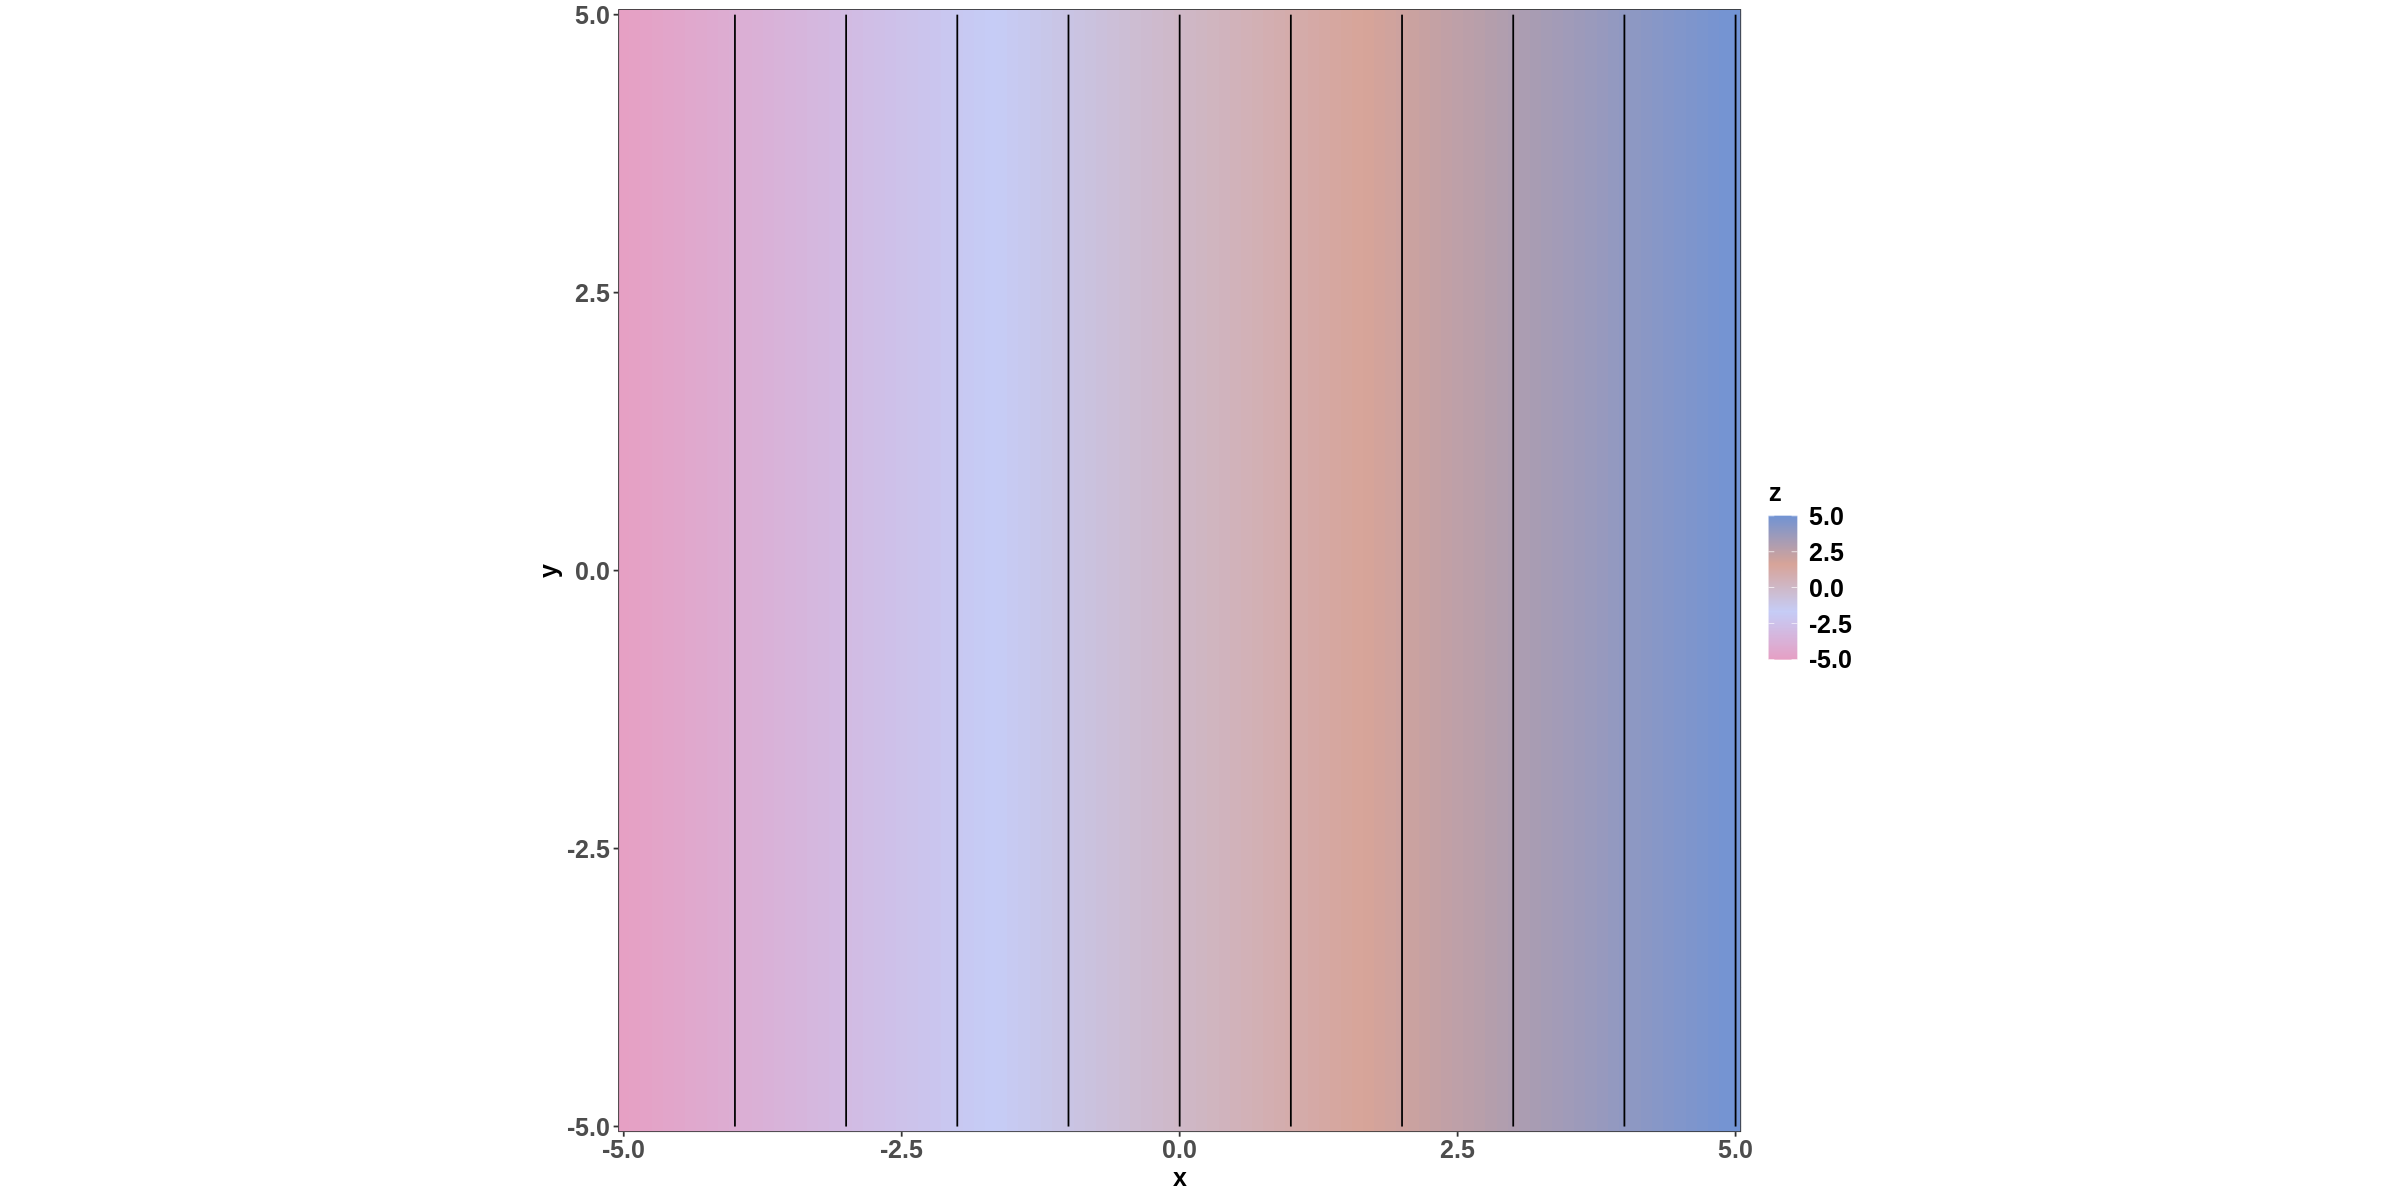

In [198]:
contour_plot(linear_func, c(-5, 5), c(-5, 5))

## X_0 = (100, ..., 100)

In [199]:
x0 = rep(100, 10)
N = 10
maxiter = round((10000*N)/(4*N))

In [200]:
csa = 
    cma_es_csa(x0, fn = function(x) linear_func(x), lower = -100, upper = 100)

In [201]:
ppmf = 
    cma_es_expth(x0, fn = function(x) linear_func(x), lower = -100, upper = 100)

In [202]:
sigma_df = 
    list(csa, ppmf) %>% 
    get_sigma()

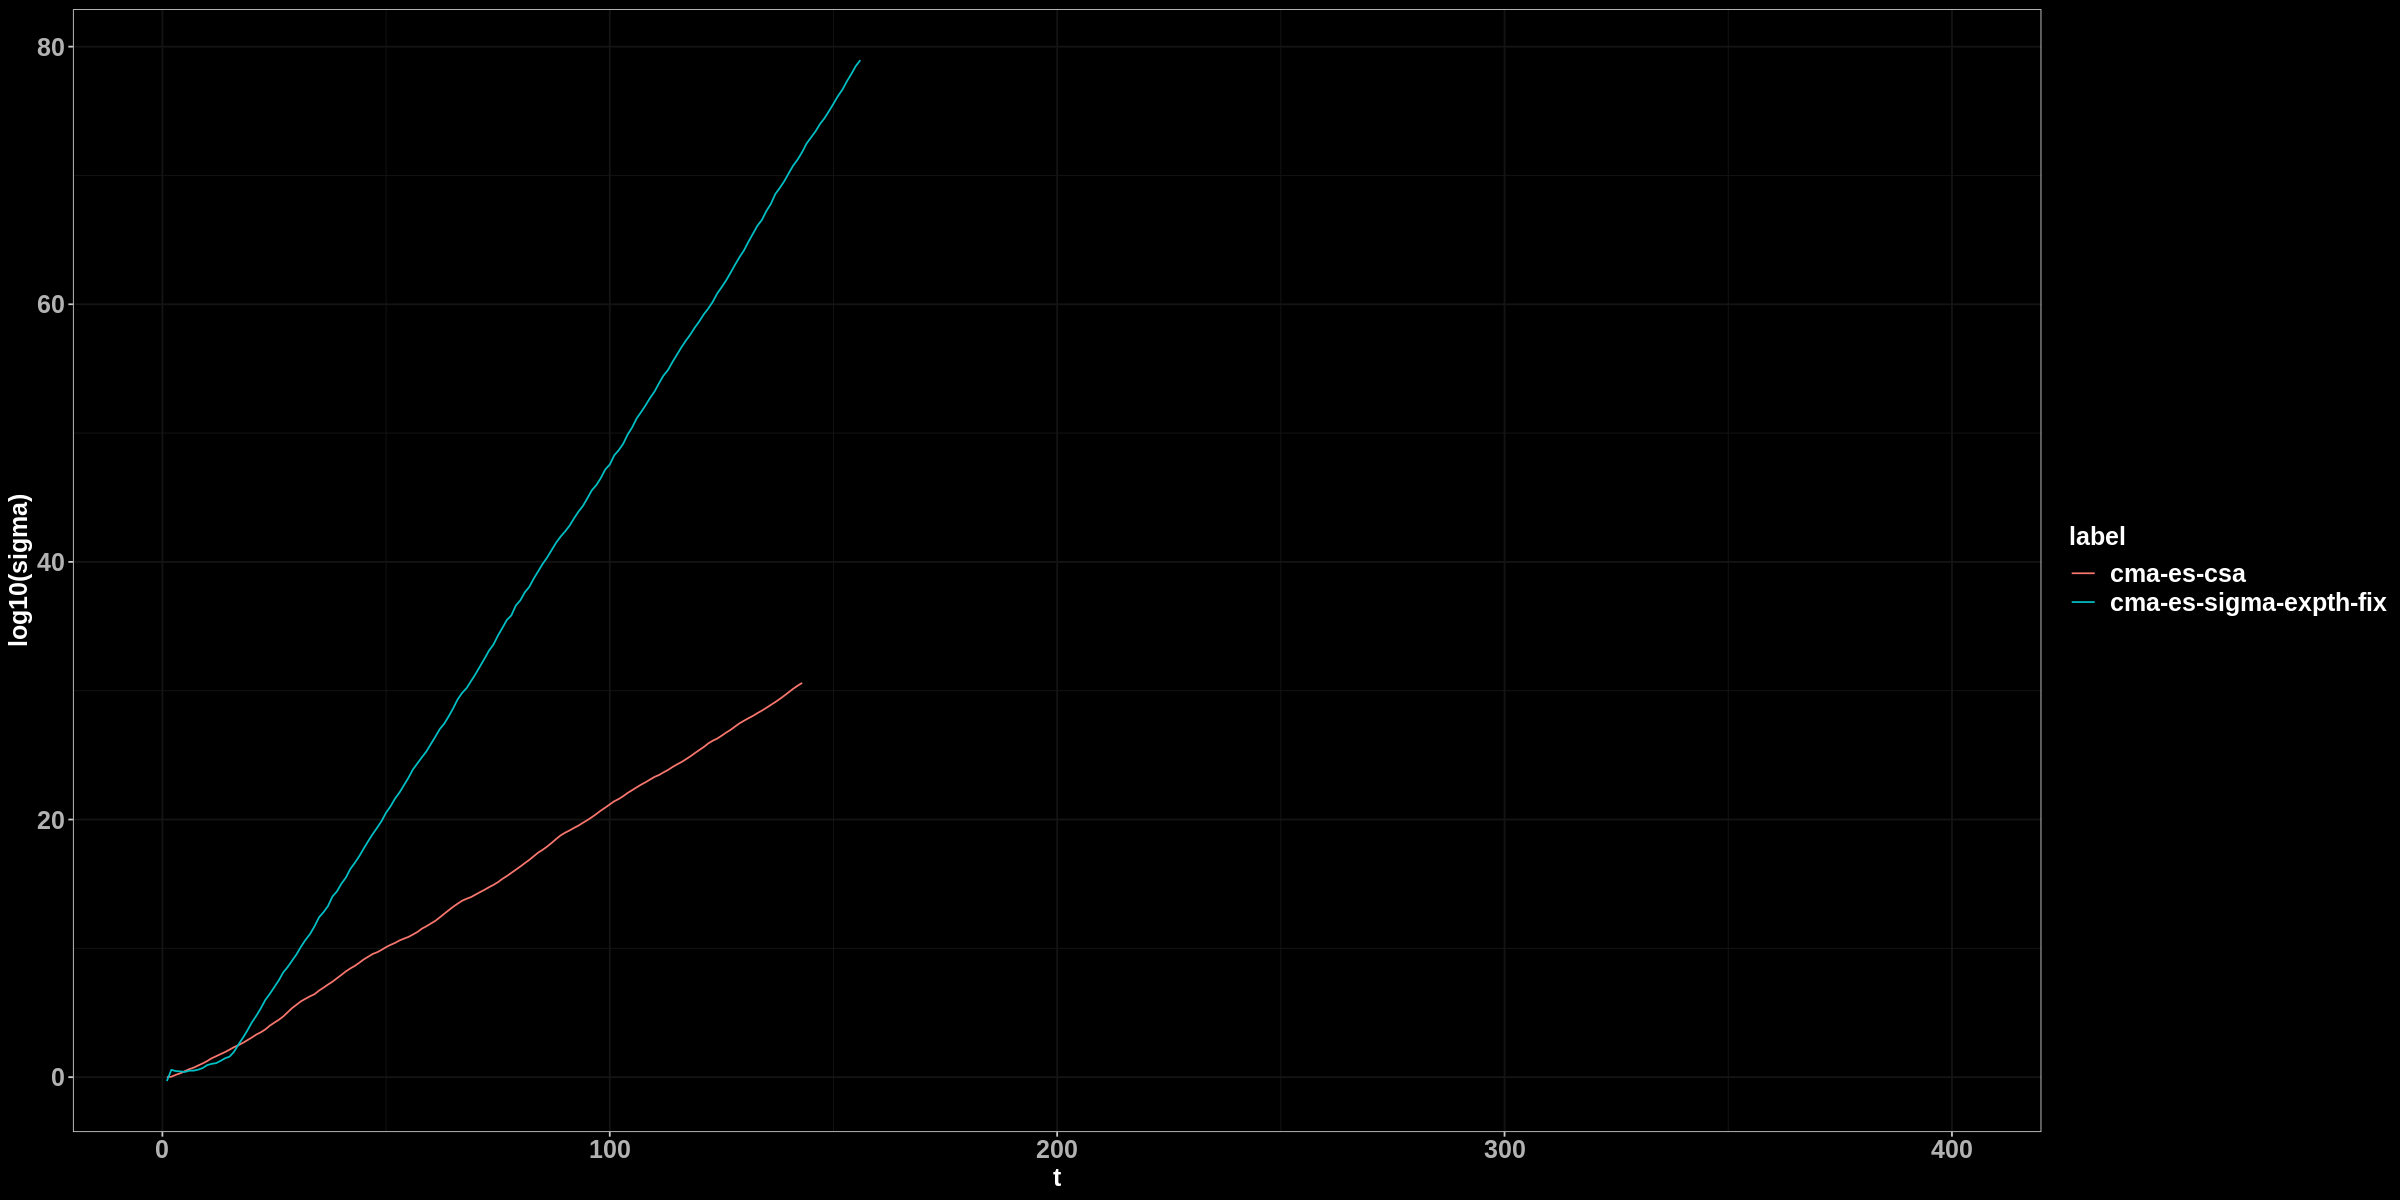

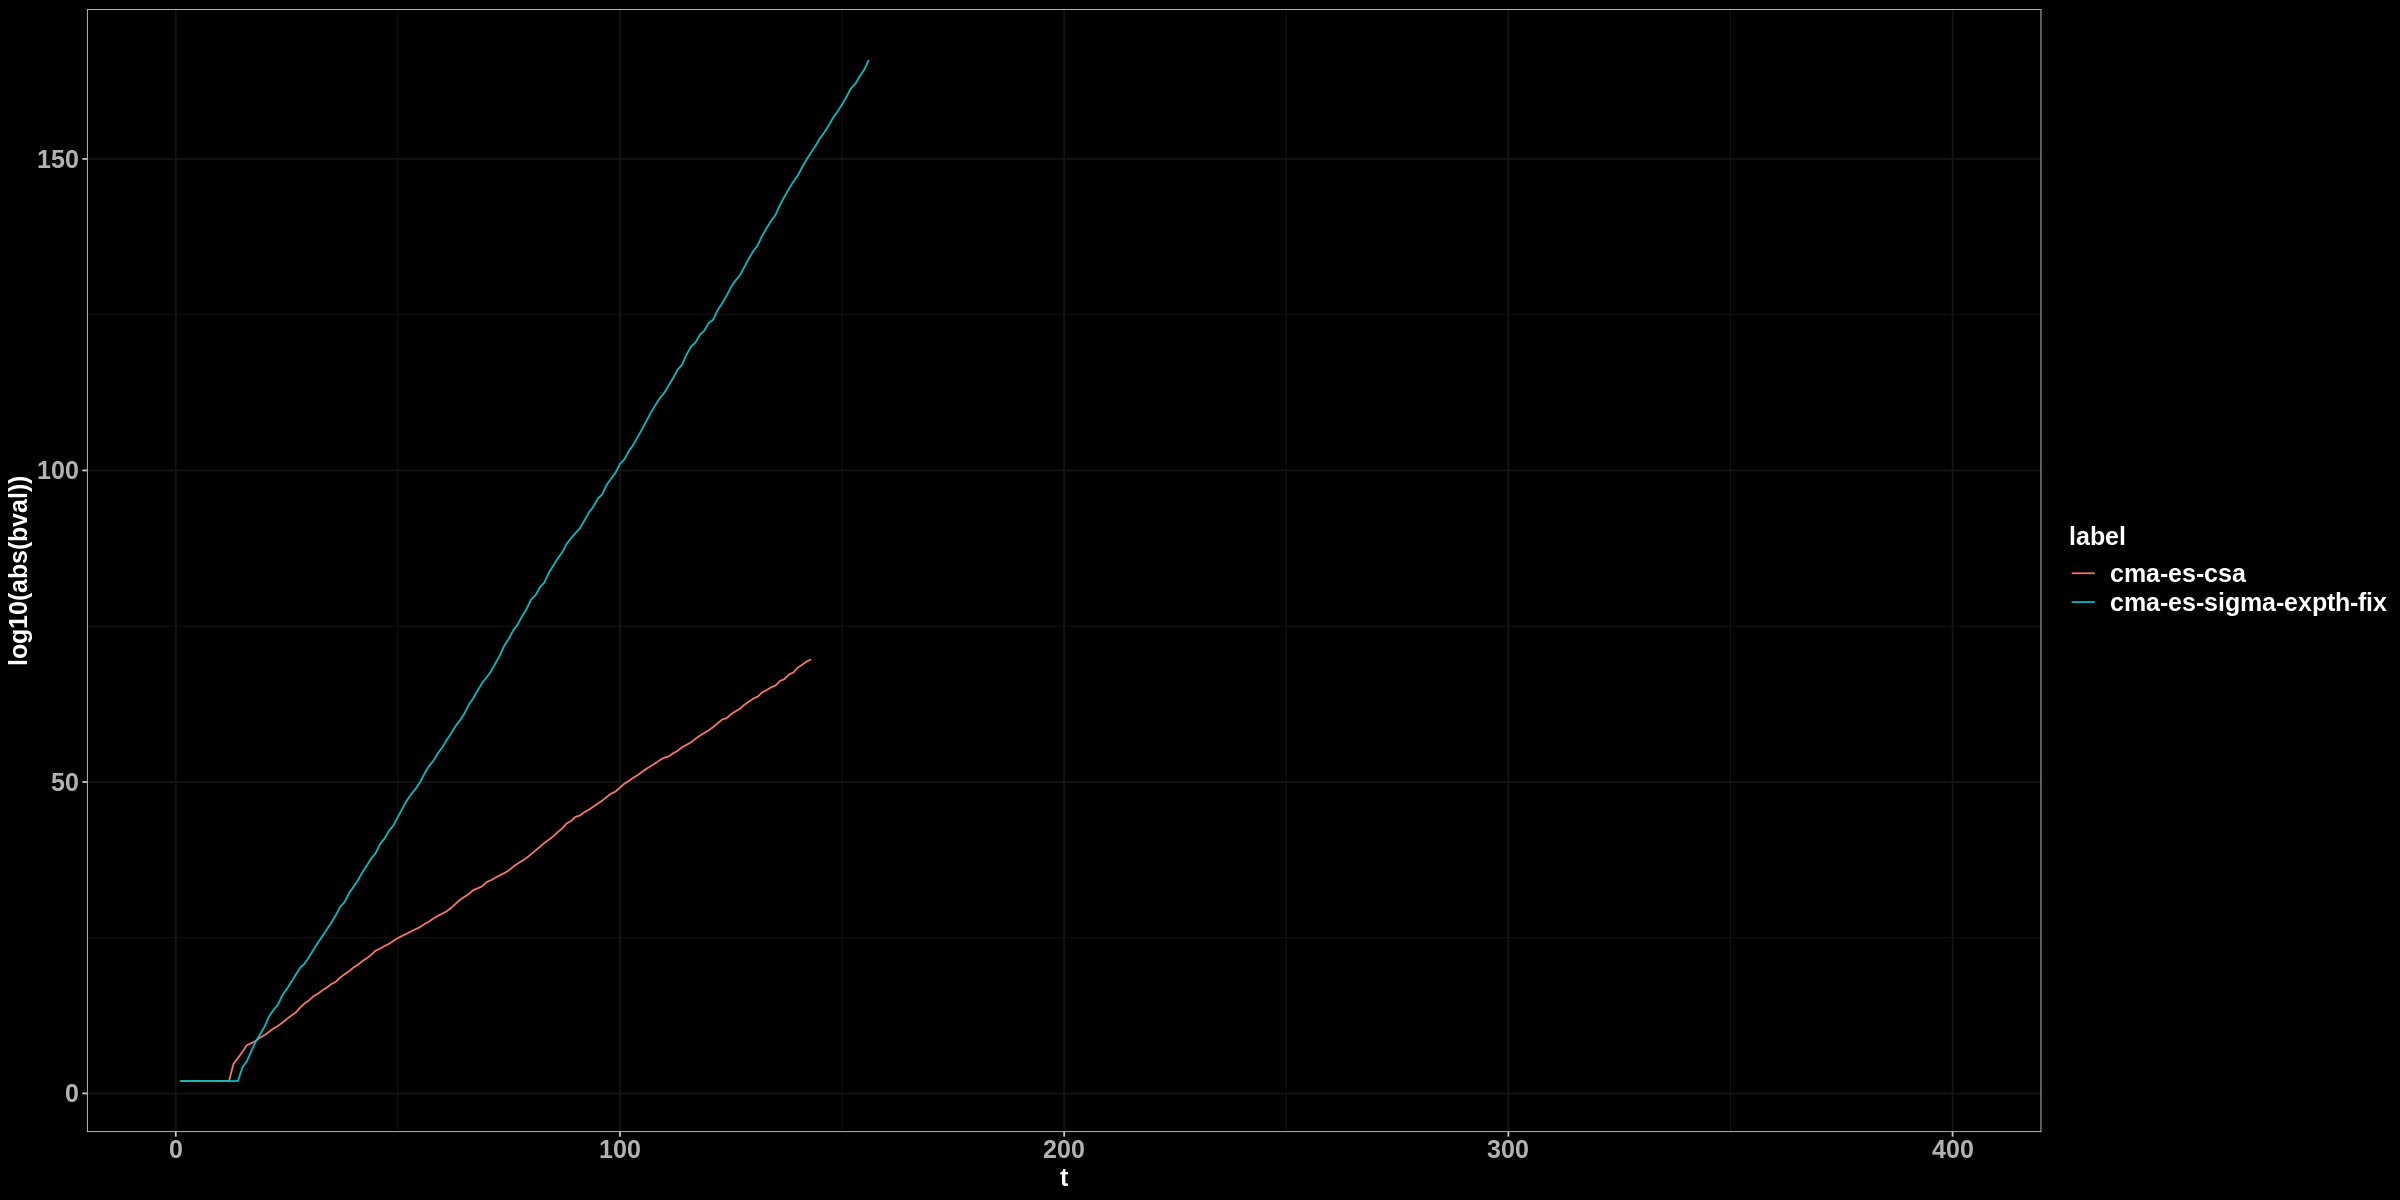

In [203]:
sigma_df %>% 
    plot_sigma(400)
sigma_df %>% 
    plot_bval(400)

## X_0 = (1, ..., 1)

In [204]:
x0 = rep(1, 10)
N = 10
maxiter = round((10000*N)/(4*N))

In [205]:
csa = 
    cma_es_csa(x0, fn = function(x) linear_func(x), lower = -100, upper = 100)

In [206]:
ppmf = 
    cma_es_expth(x0, fn = function(x) linear_func(x), lower = -100, upper = 100)

In [207]:
sigma_df = 
    list(csa, ppmf) %>% 
    get_sigma()

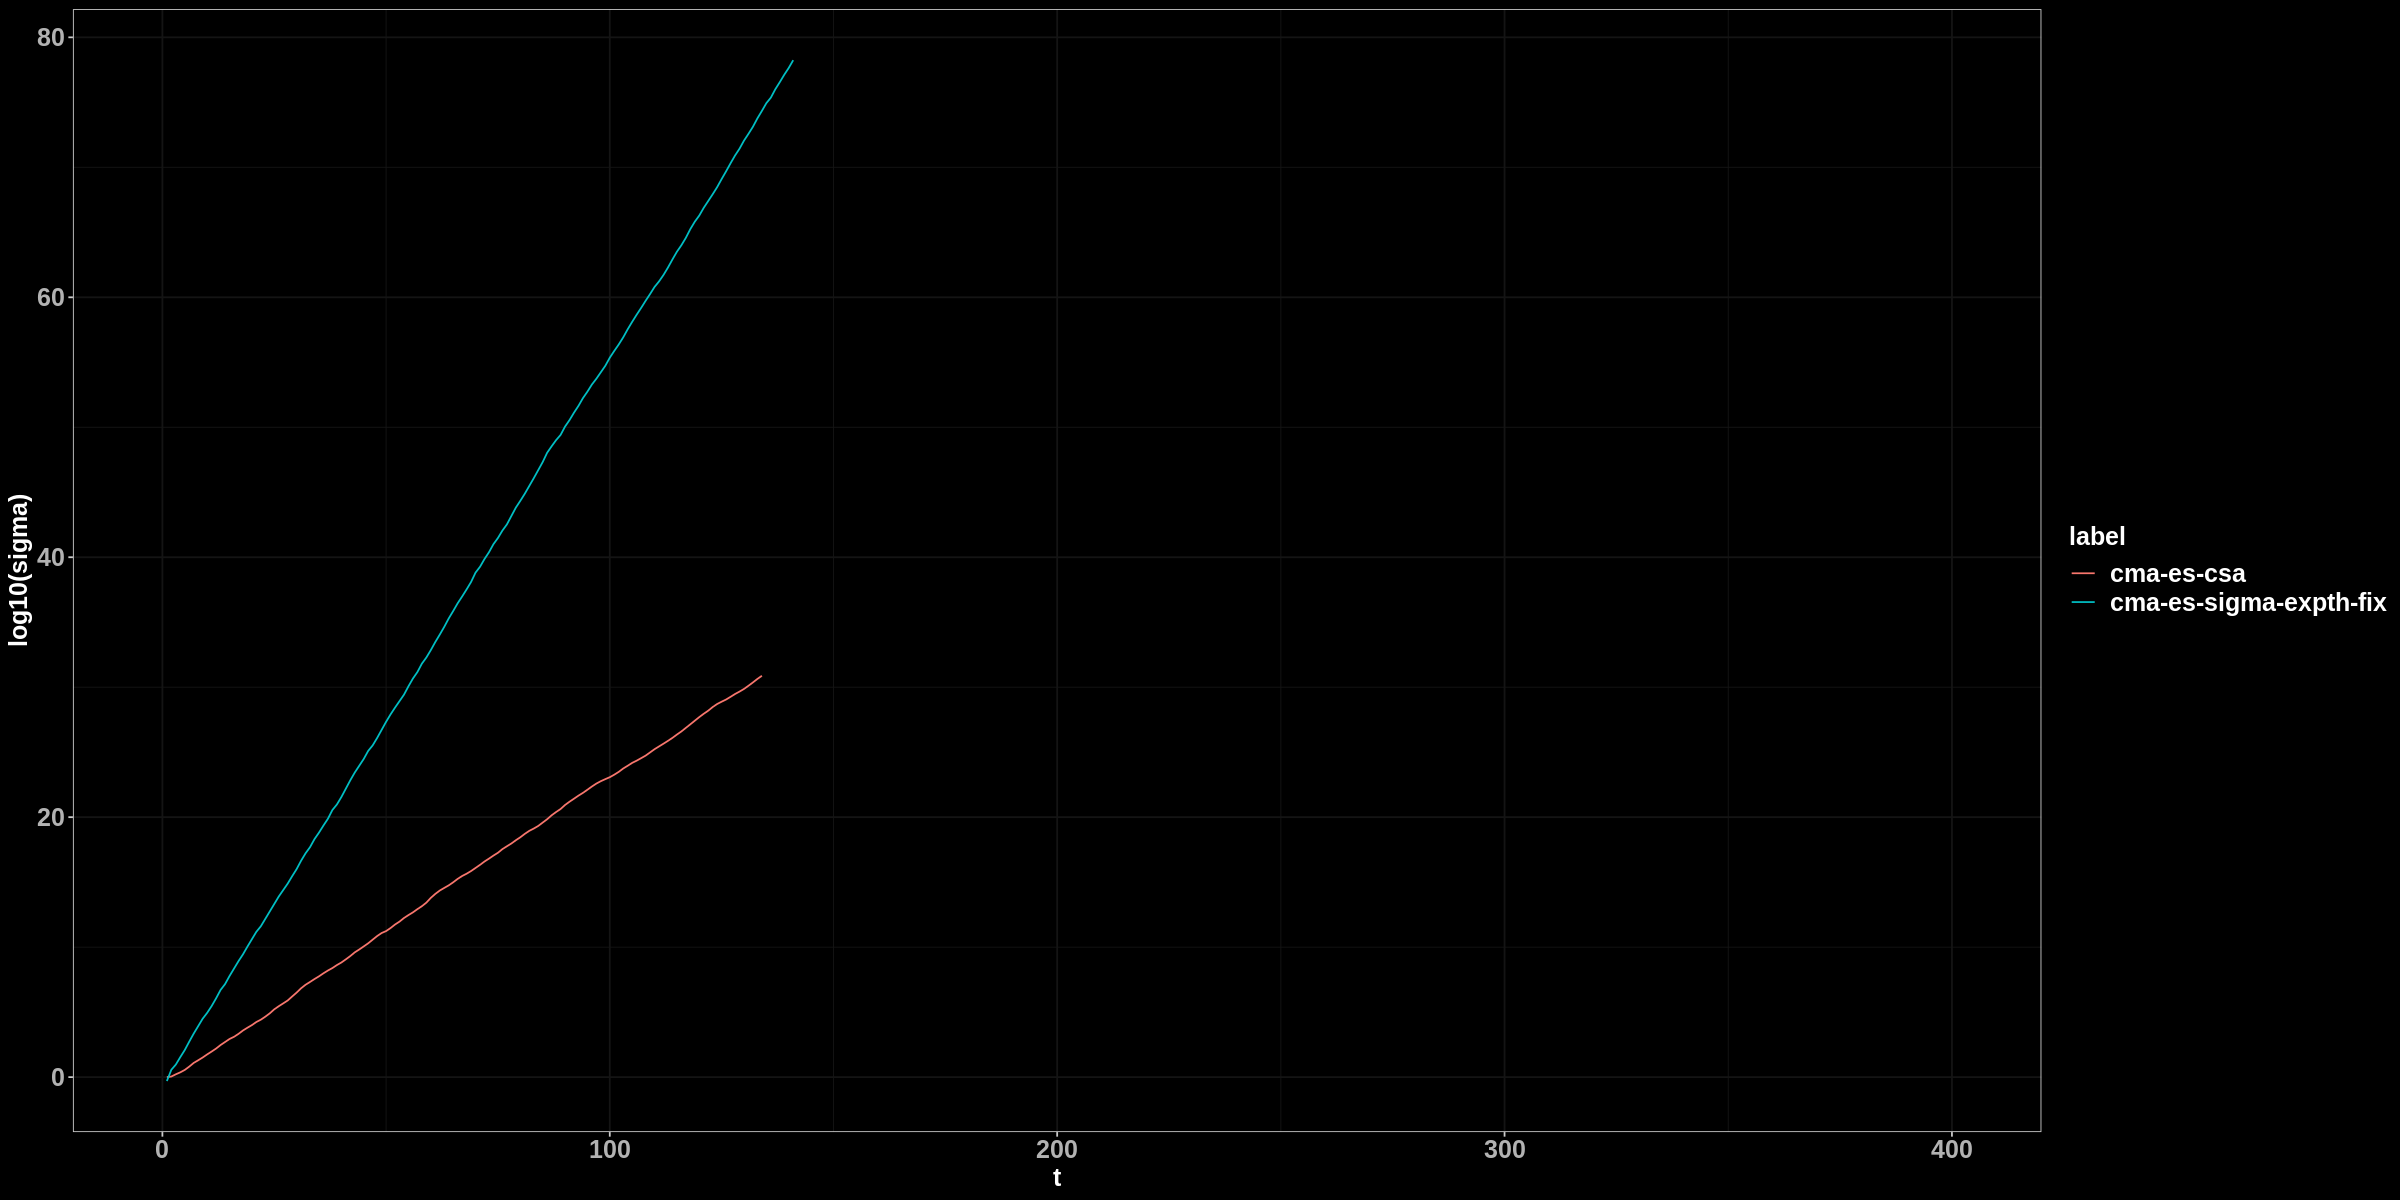

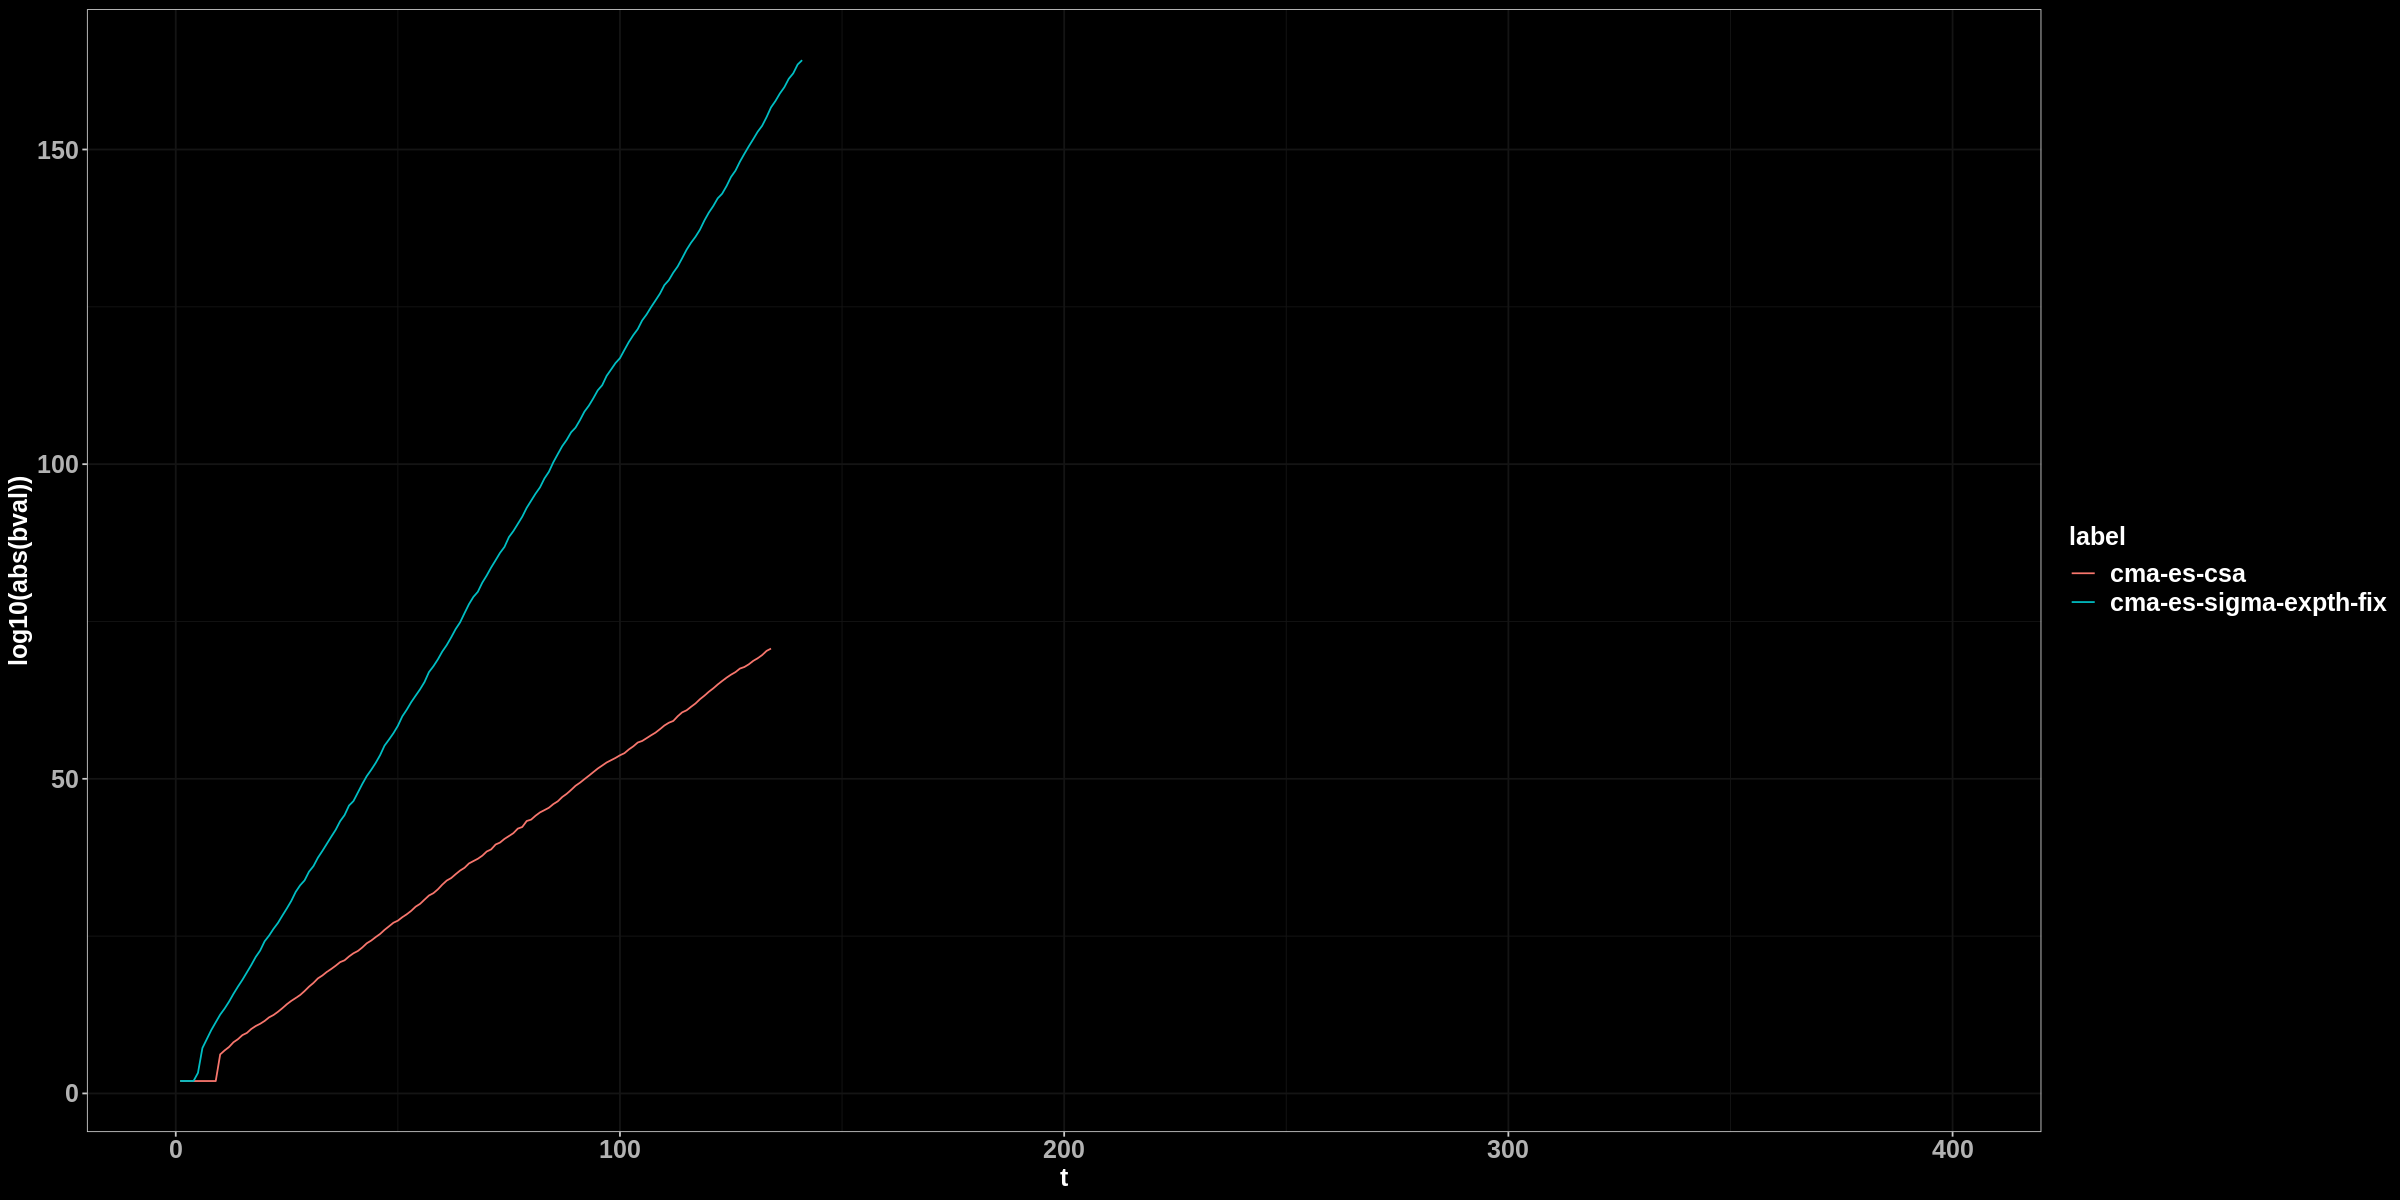

In [208]:
sigma_df %>% 
    plot_sigma(400)
sigma_df %>% 
    plot_bval(400)

# Linear function, sigma = 100

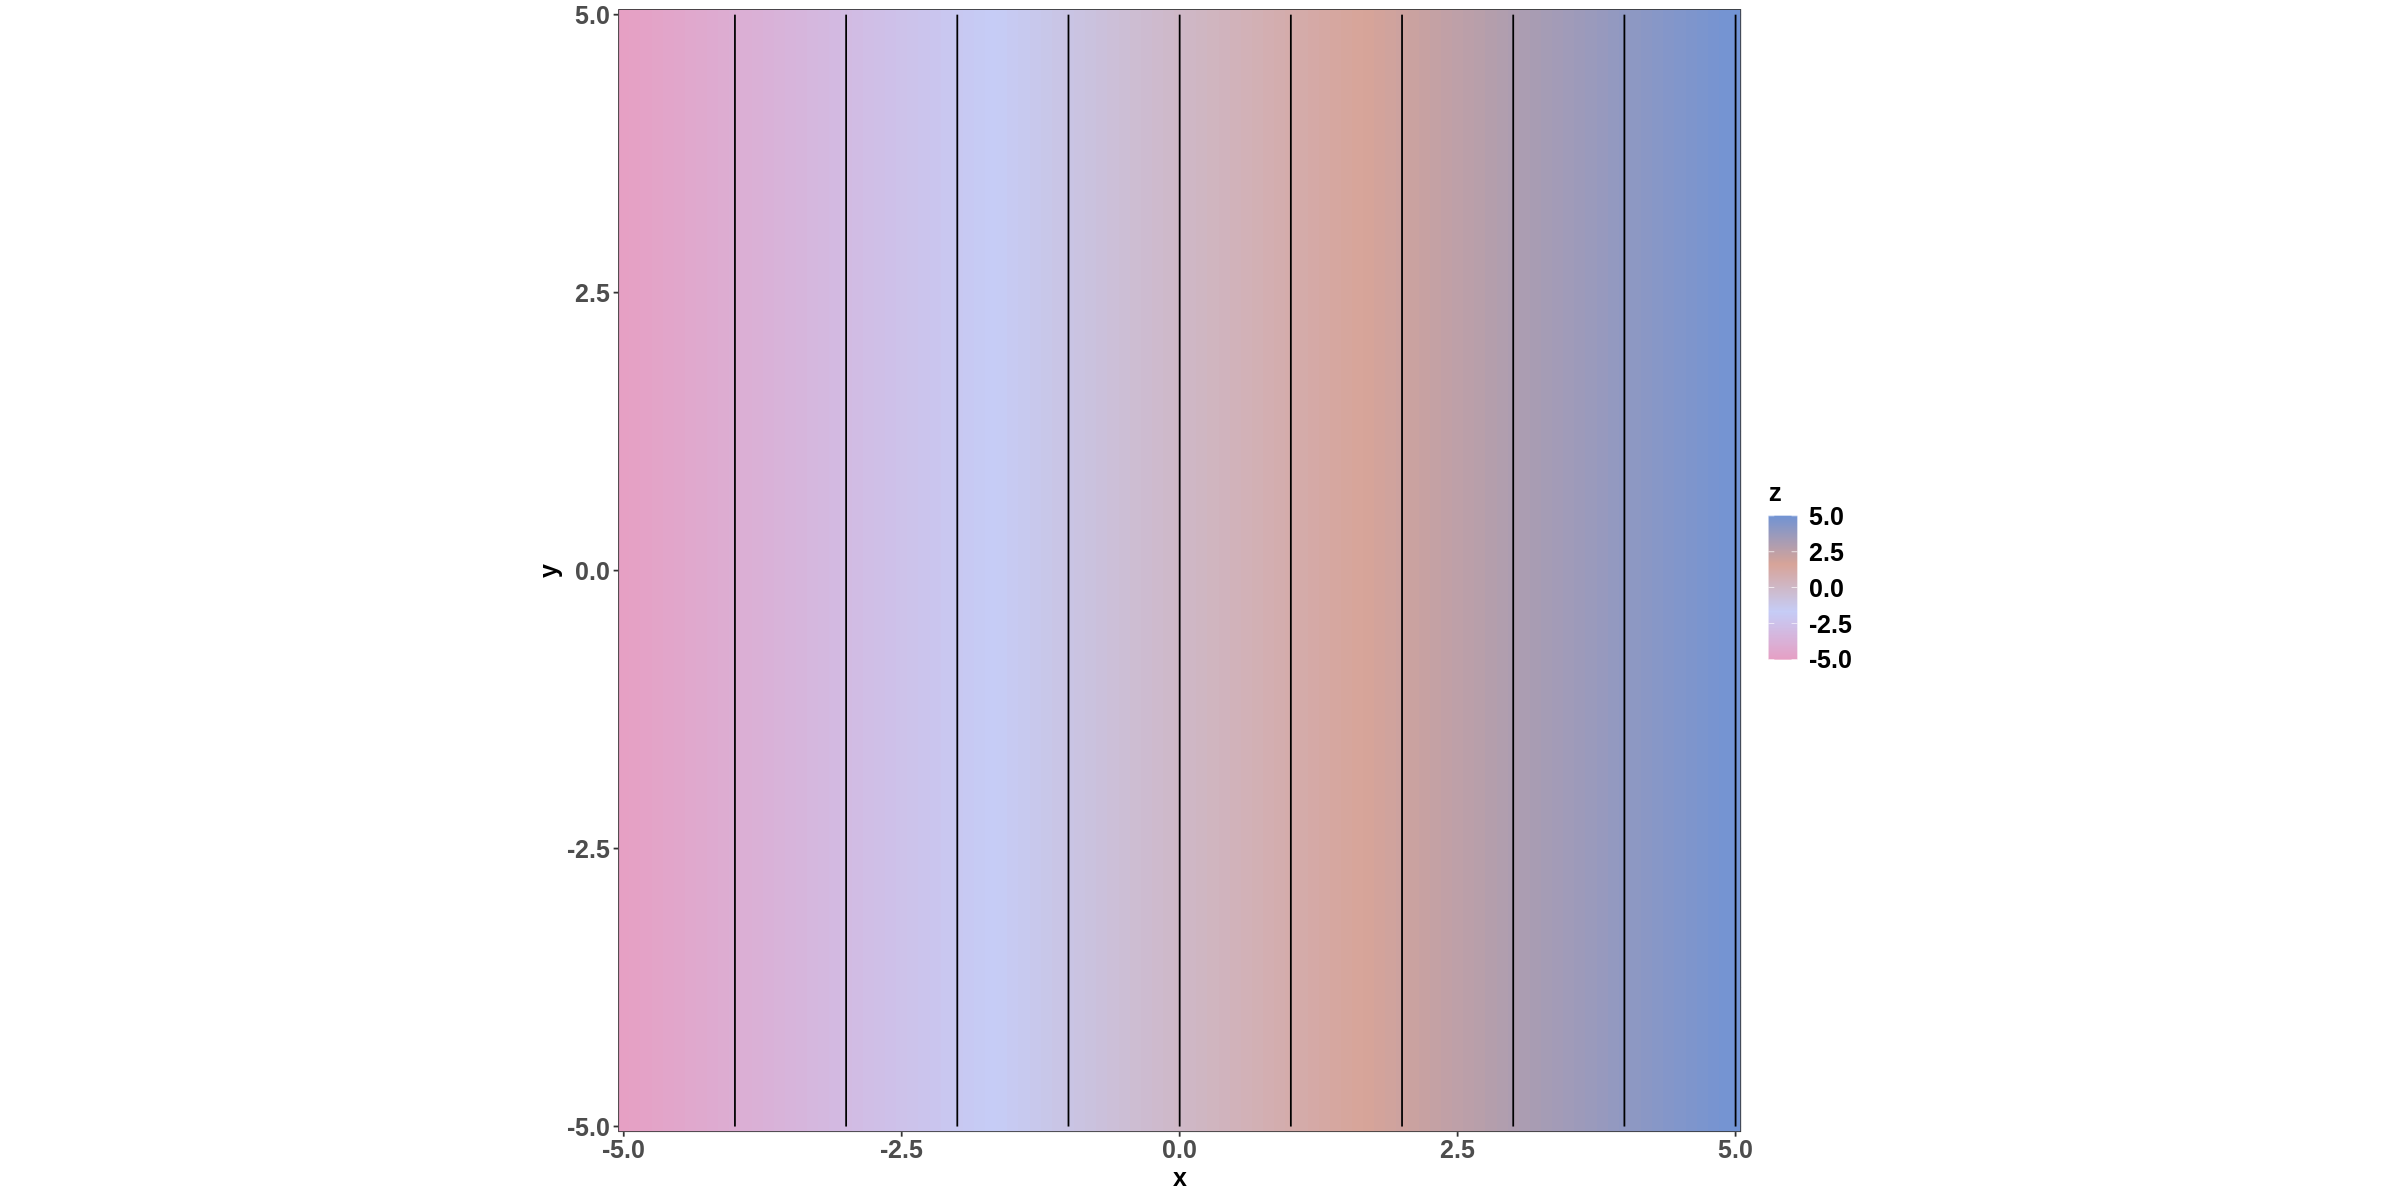

In [198]:
contour_plot(linear_func, c(-5, 5), c(-5, 5))

## X_0 = (100, ..., 100)

In [313]:
x0 = rep(100, 10)
N = 10
maxiter = round((10000*N)/(4*N))

In [314]:
csa = 
    cma_es_csa(x0, fn = function(x) linear_func(x), lower = -100, upper = 100, control = list(sigma = 100))

In [315]:
ppmf = 
    cma_es_expth(x0, fn = function(x) linear_func(x), lower = -100, upper = 100,  control = list(sigma = 100))

In [316]:
sigma_df = 
    list(csa, ppmf) %>% 
    get_sigma()

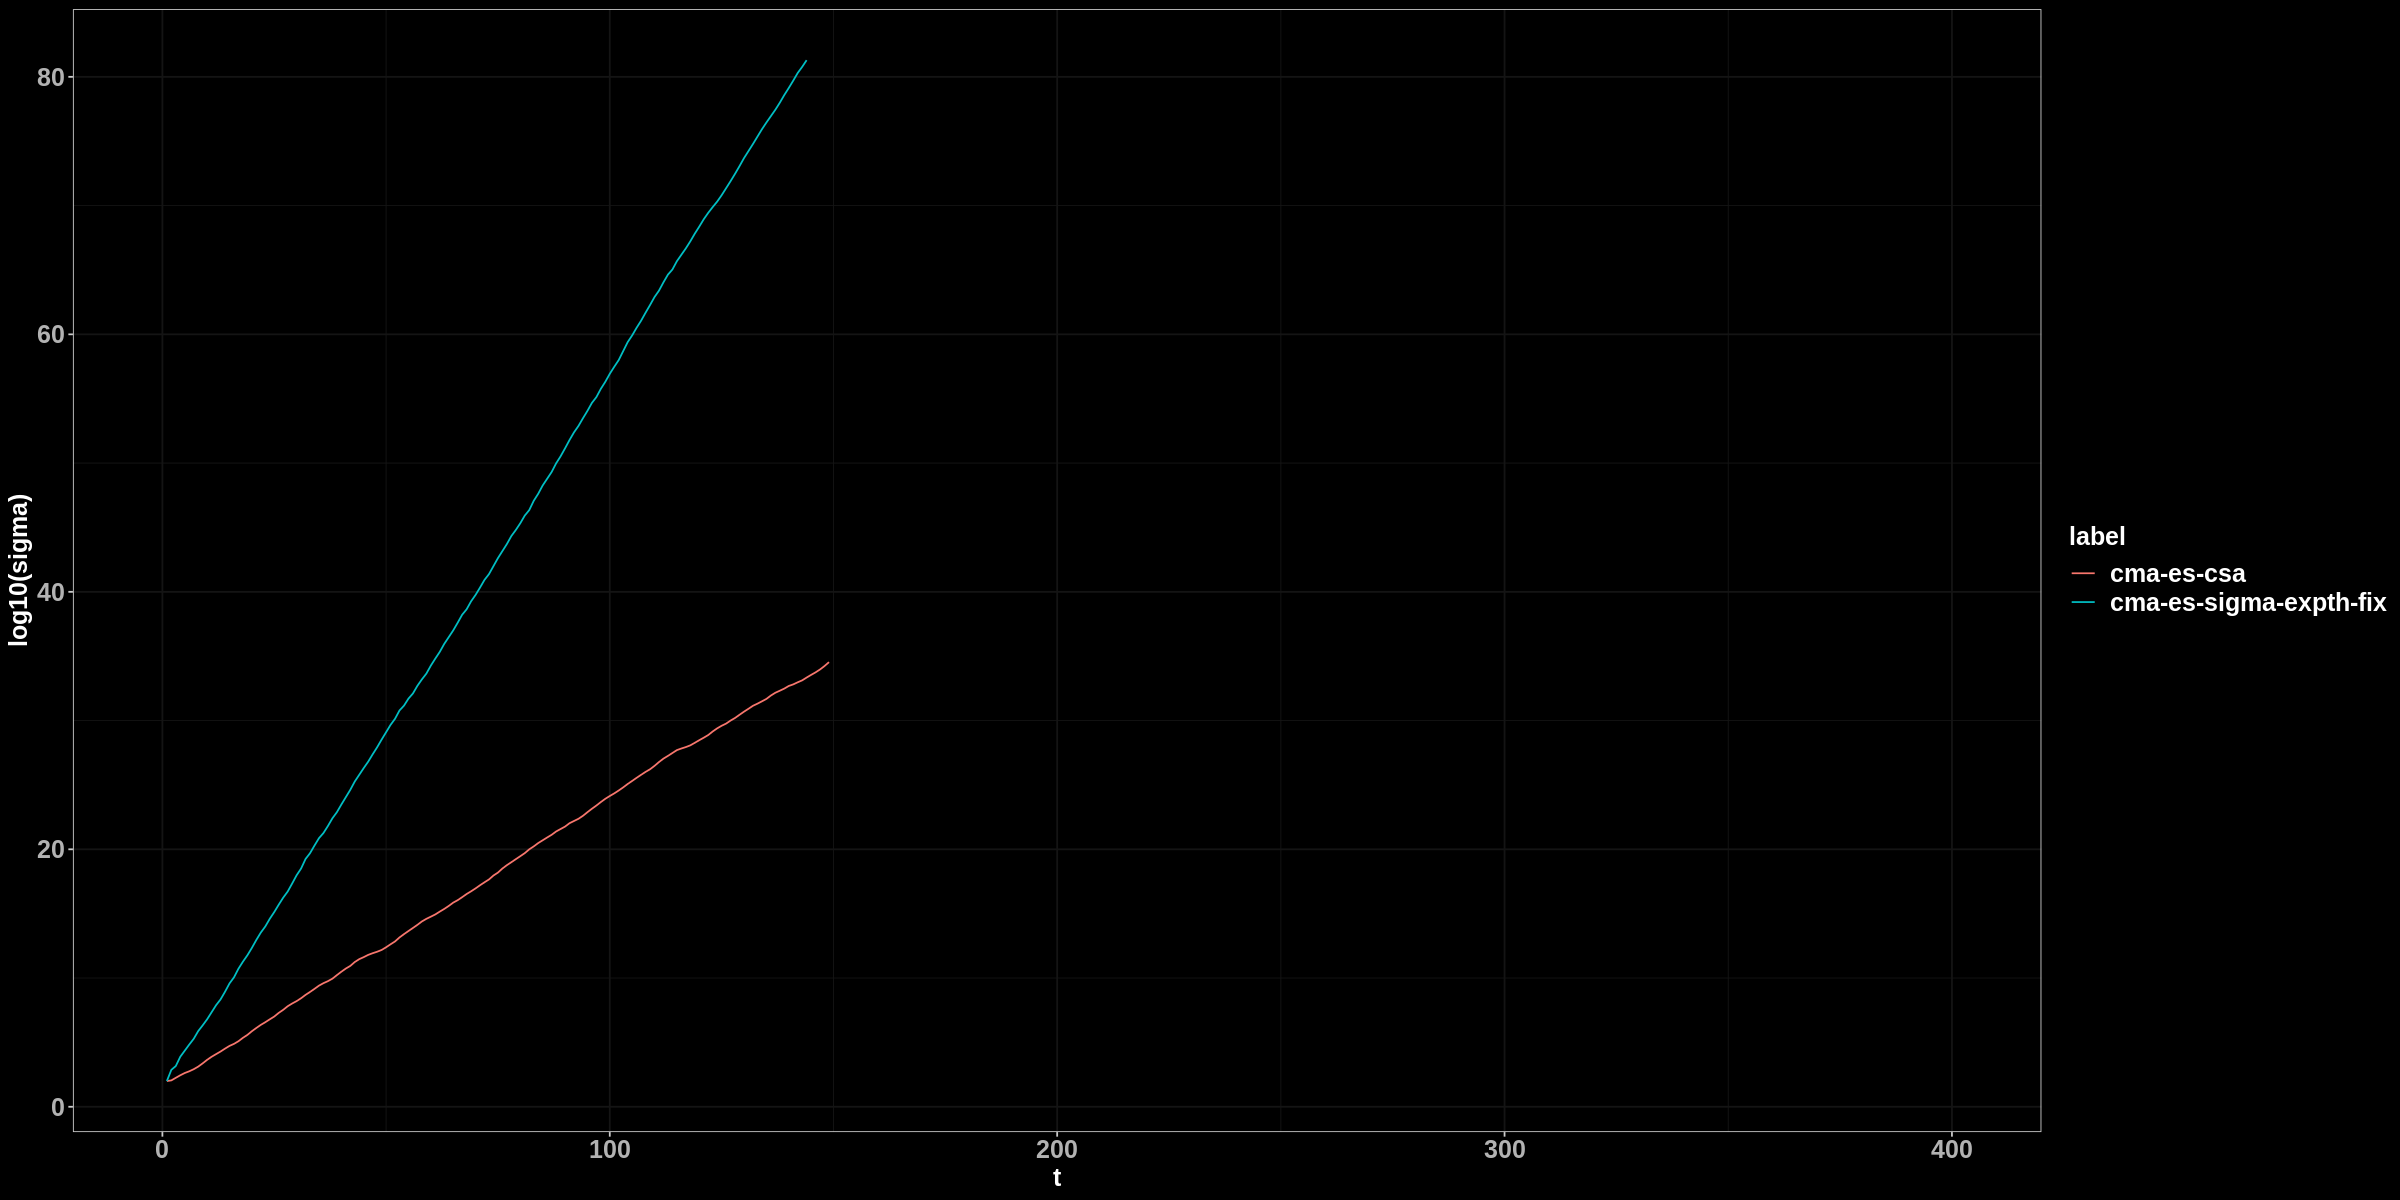

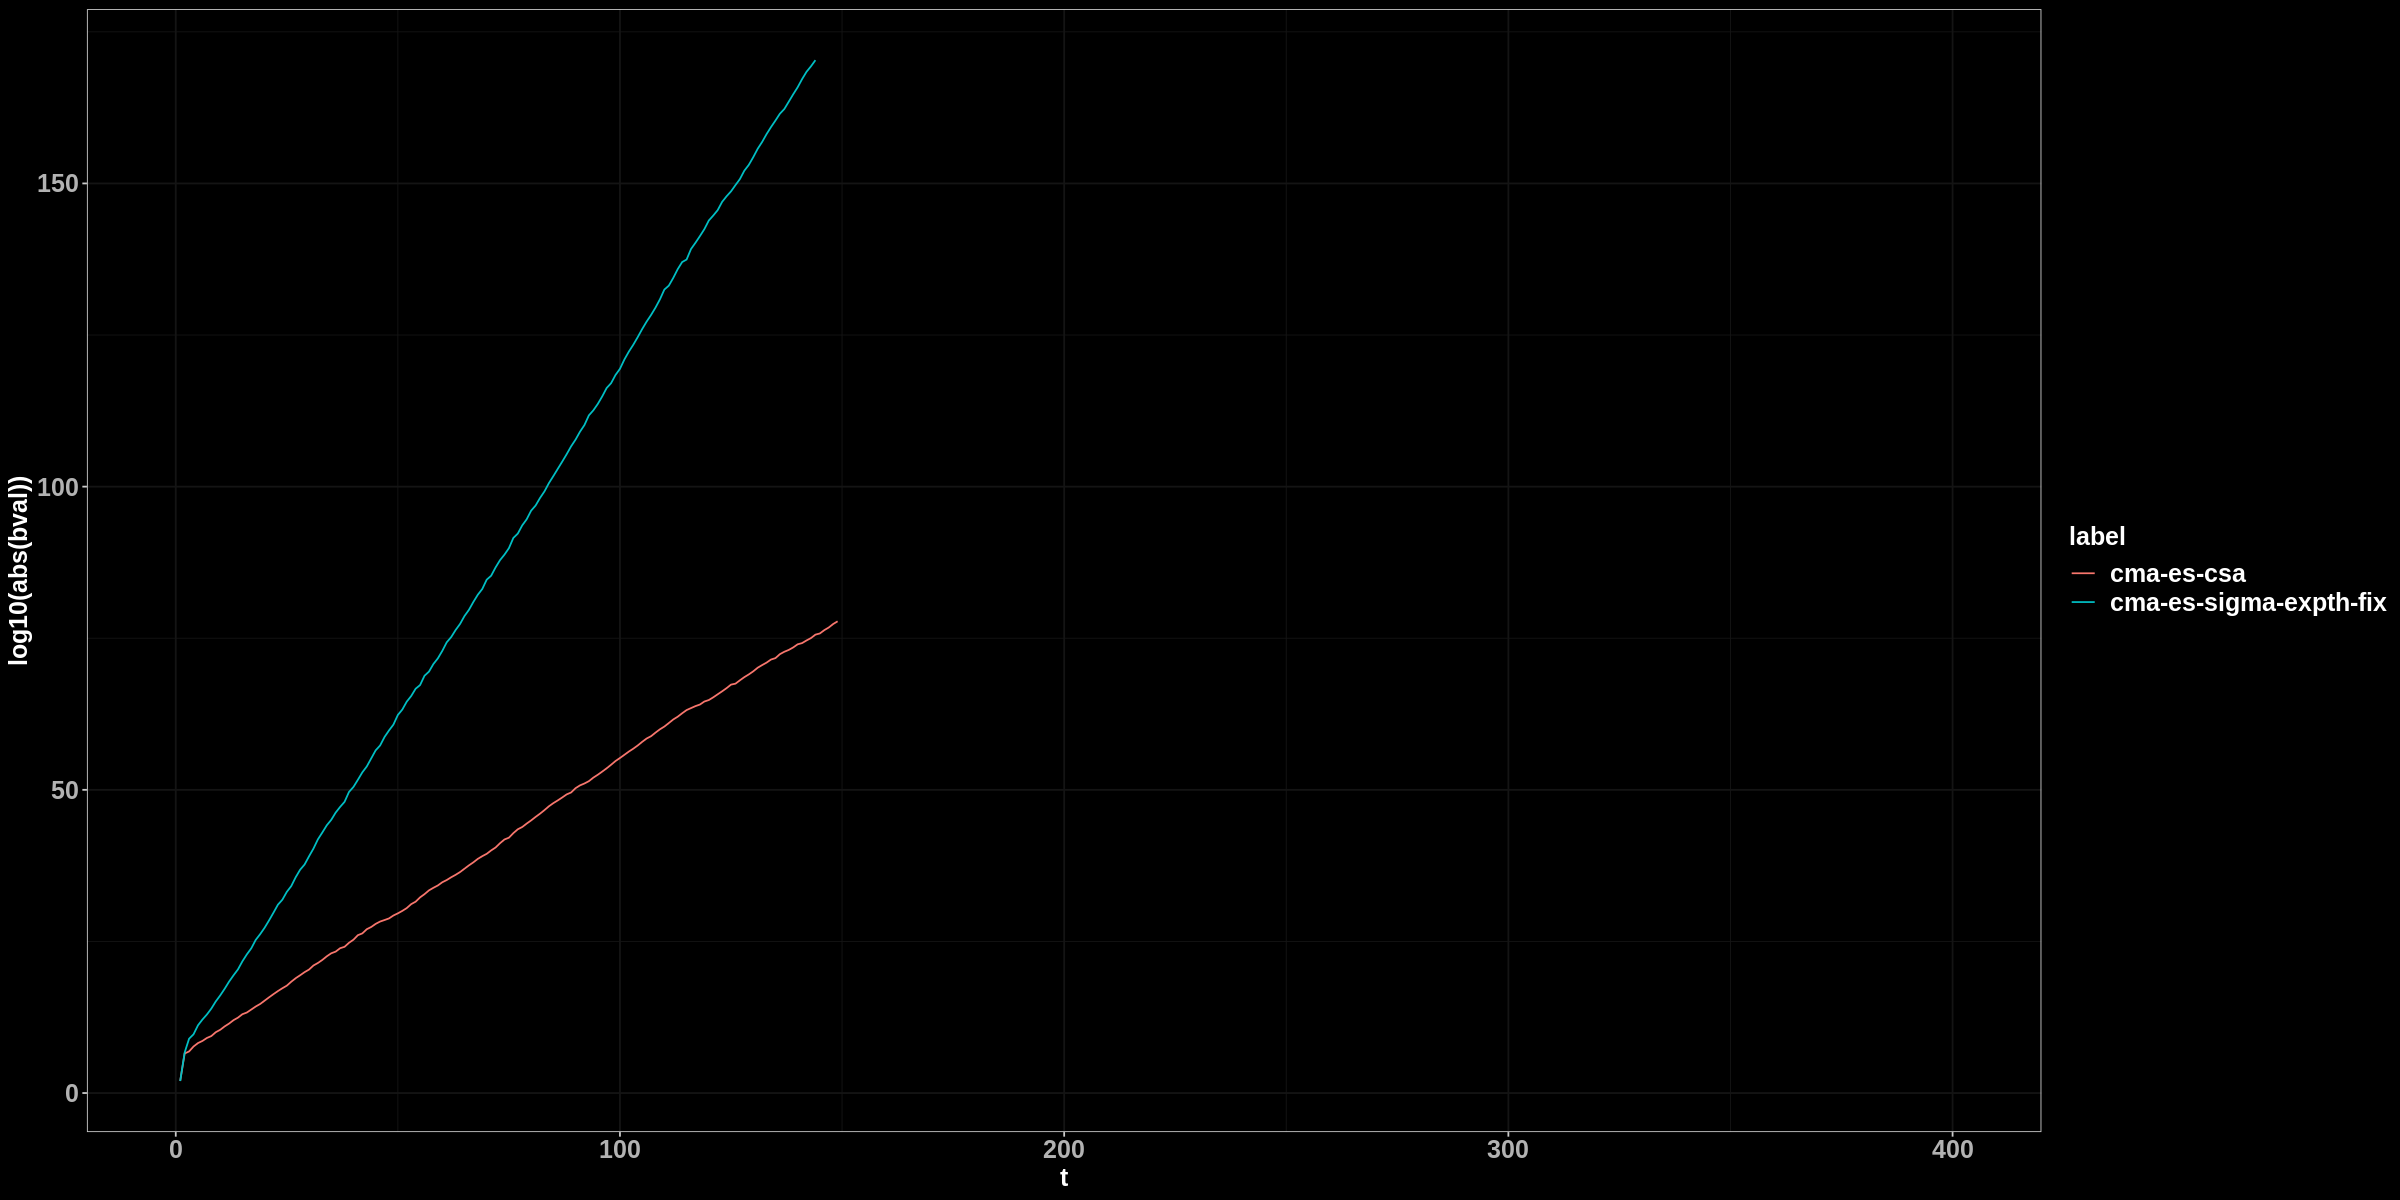

In [317]:
sigma_df %>% 
    plot_sigma(400)
sigma_df %>% 
    plot_bval(400)

## X_0 = (1, ..., 1)

In [318]:
x0 = rep(1, 10)
N = 10
maxiter = round((10000*N)/(4*N))

In [319]:
csa = 
    cma_es_csa(x0, fn = function(x) linear_func(x), lower = -100, upper = 100,  control = list(sigma = 100))

In [320]:
ppmf = 
    cma_es_expth(x0, fn = function(x) linear_func(x), lower = -100, upper = 100,  control = list(sigma = 100))

In [321]:
sigma_df = 
    list(csa, ppmf) %>% 
    get_sigma()

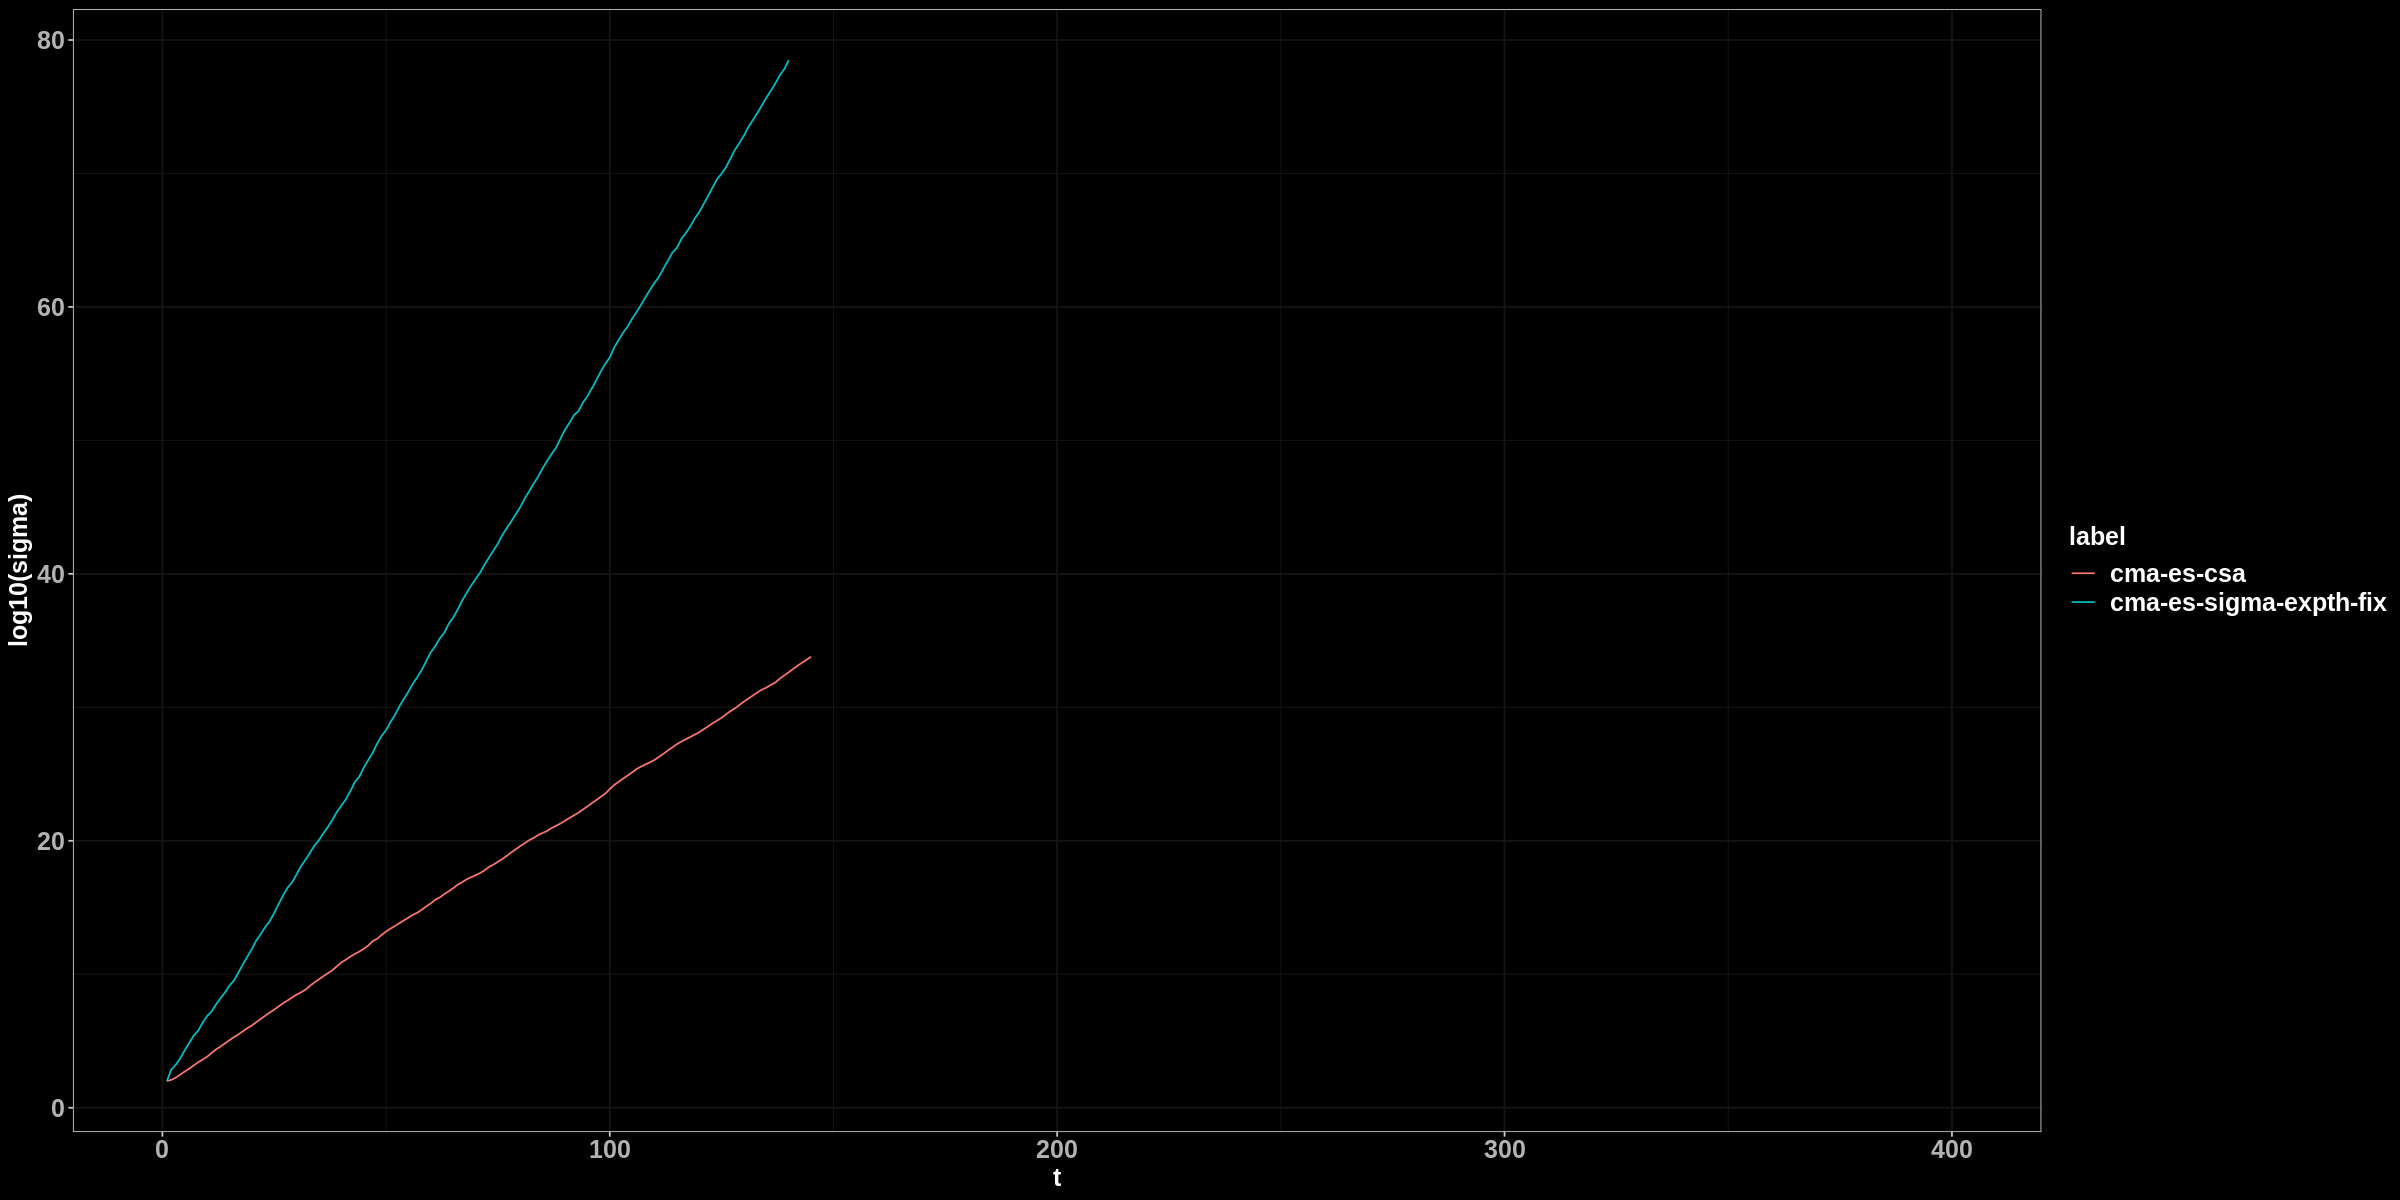

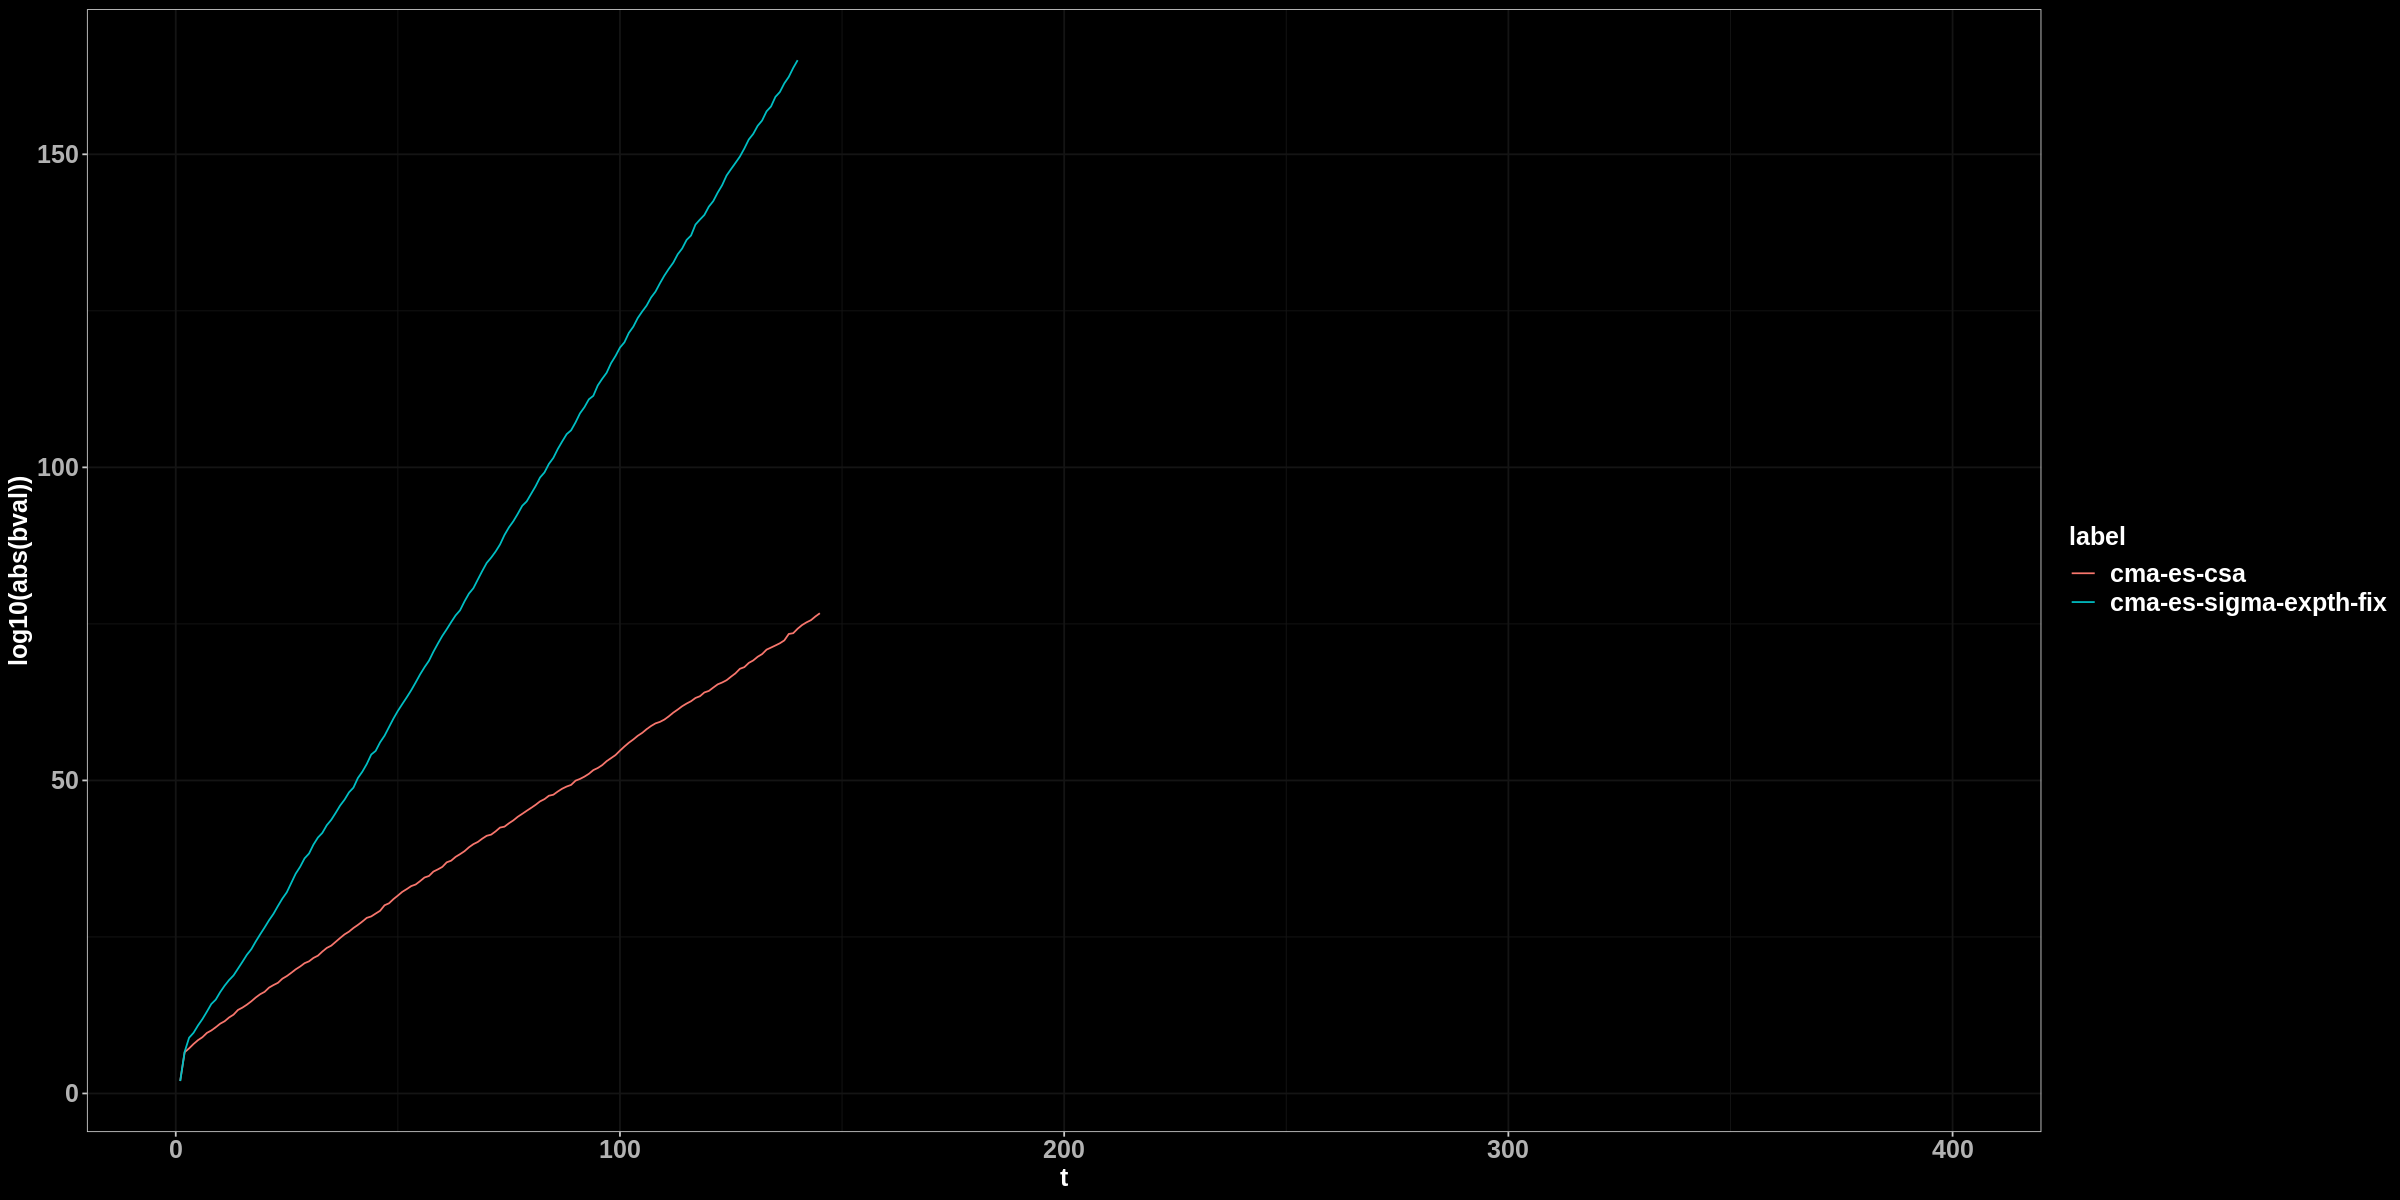

In [322]:
sigma_df %>% 
    plot_sigma(400)
sigma_df %>% 
    plot_bval(400)

# Linear function, sigma = 0.01

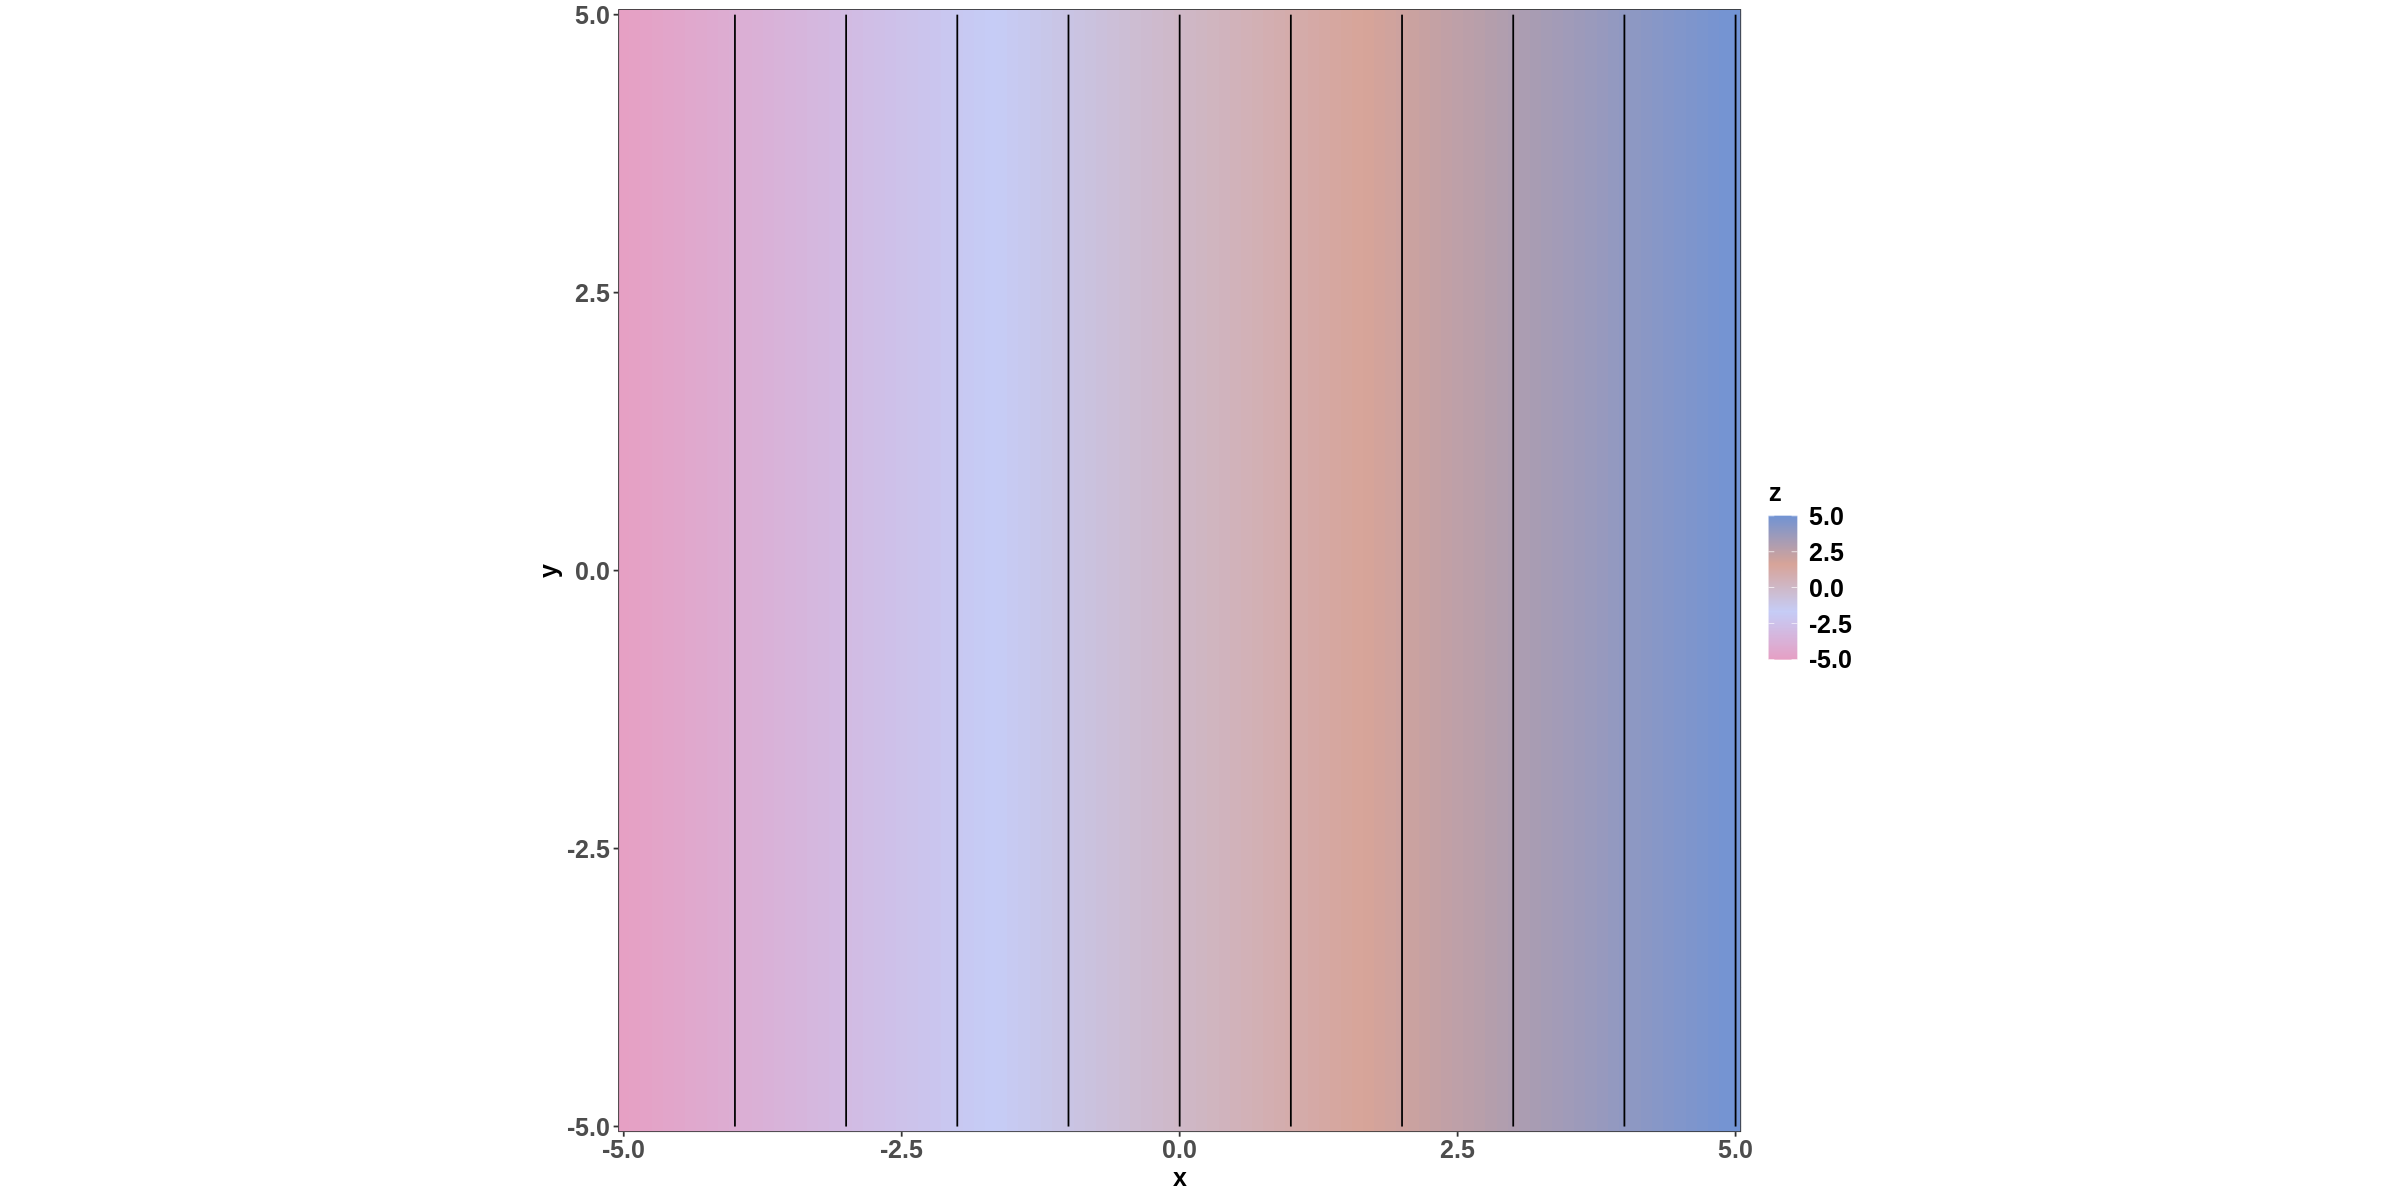

In [198]:
contour_plot(linear_func, c(-5, 5), c(-5, 5))

## X_0 = (100, ..., 100)

In [323]:
x0 = rep(100, 10)
N = 10
maxiter = round((10000*N)/(4*N))

In [324]:
csa = 
    cma_es_csa(x0, fn = function(x) linear_func(x), lower = -100, upper = 100,  control = list(sigma = 0.01))

In [325]:
ppmf = 
    cma_es_expth(x0, fn = function(x) linear_func(x), lower = -100, upper = 100,  control = list(sigma = 0.01))

In [326]:
sigma_df = 
    list(csa, ppmf) %>% 
    get_sigma()

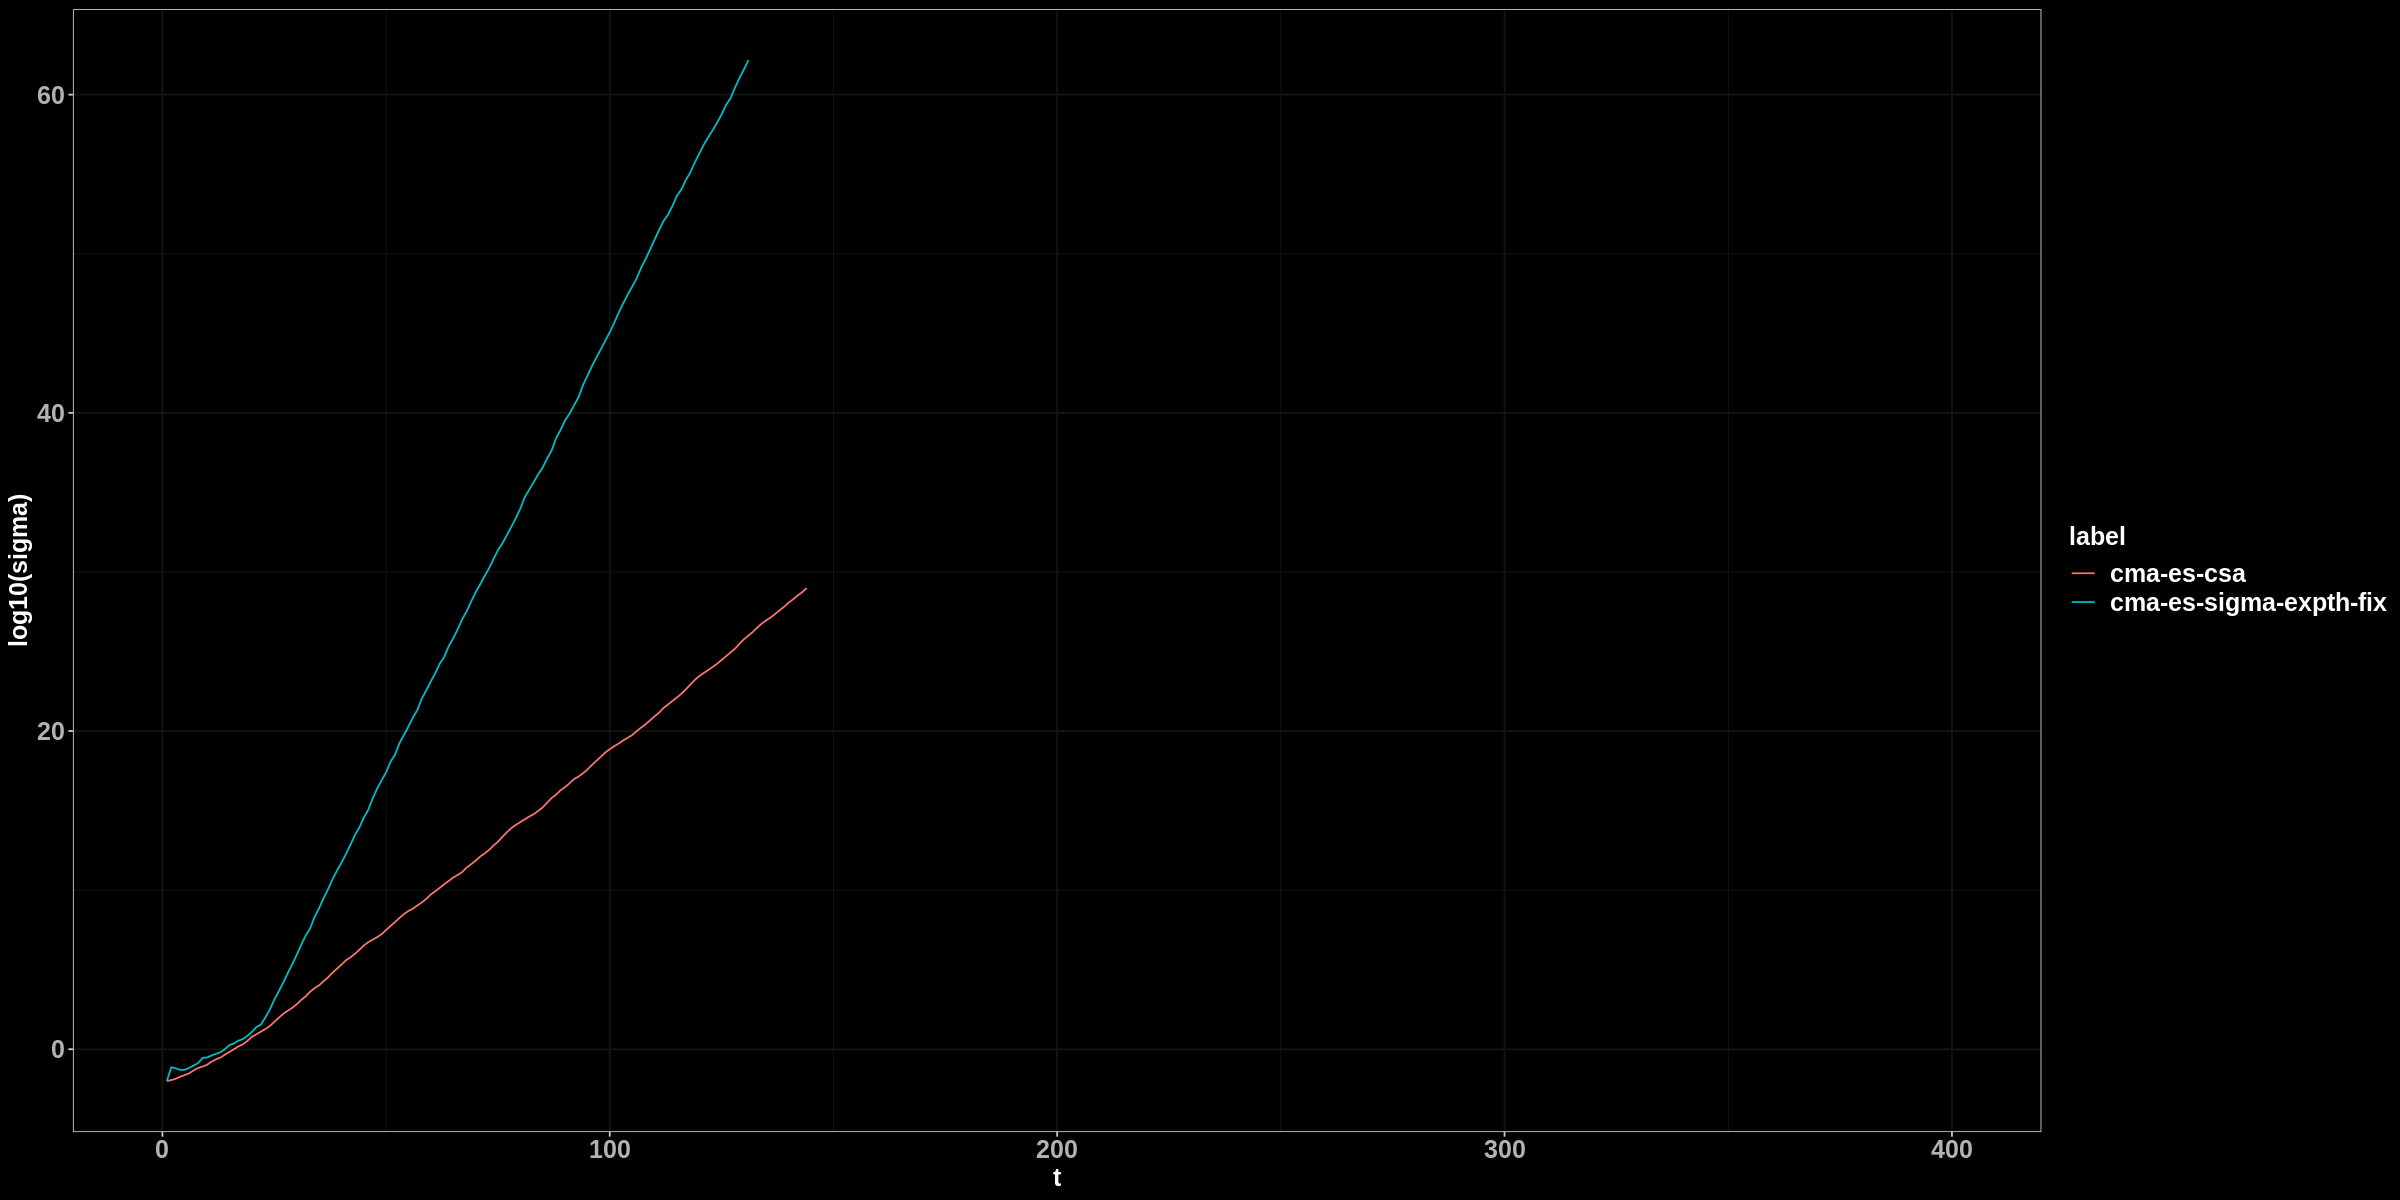

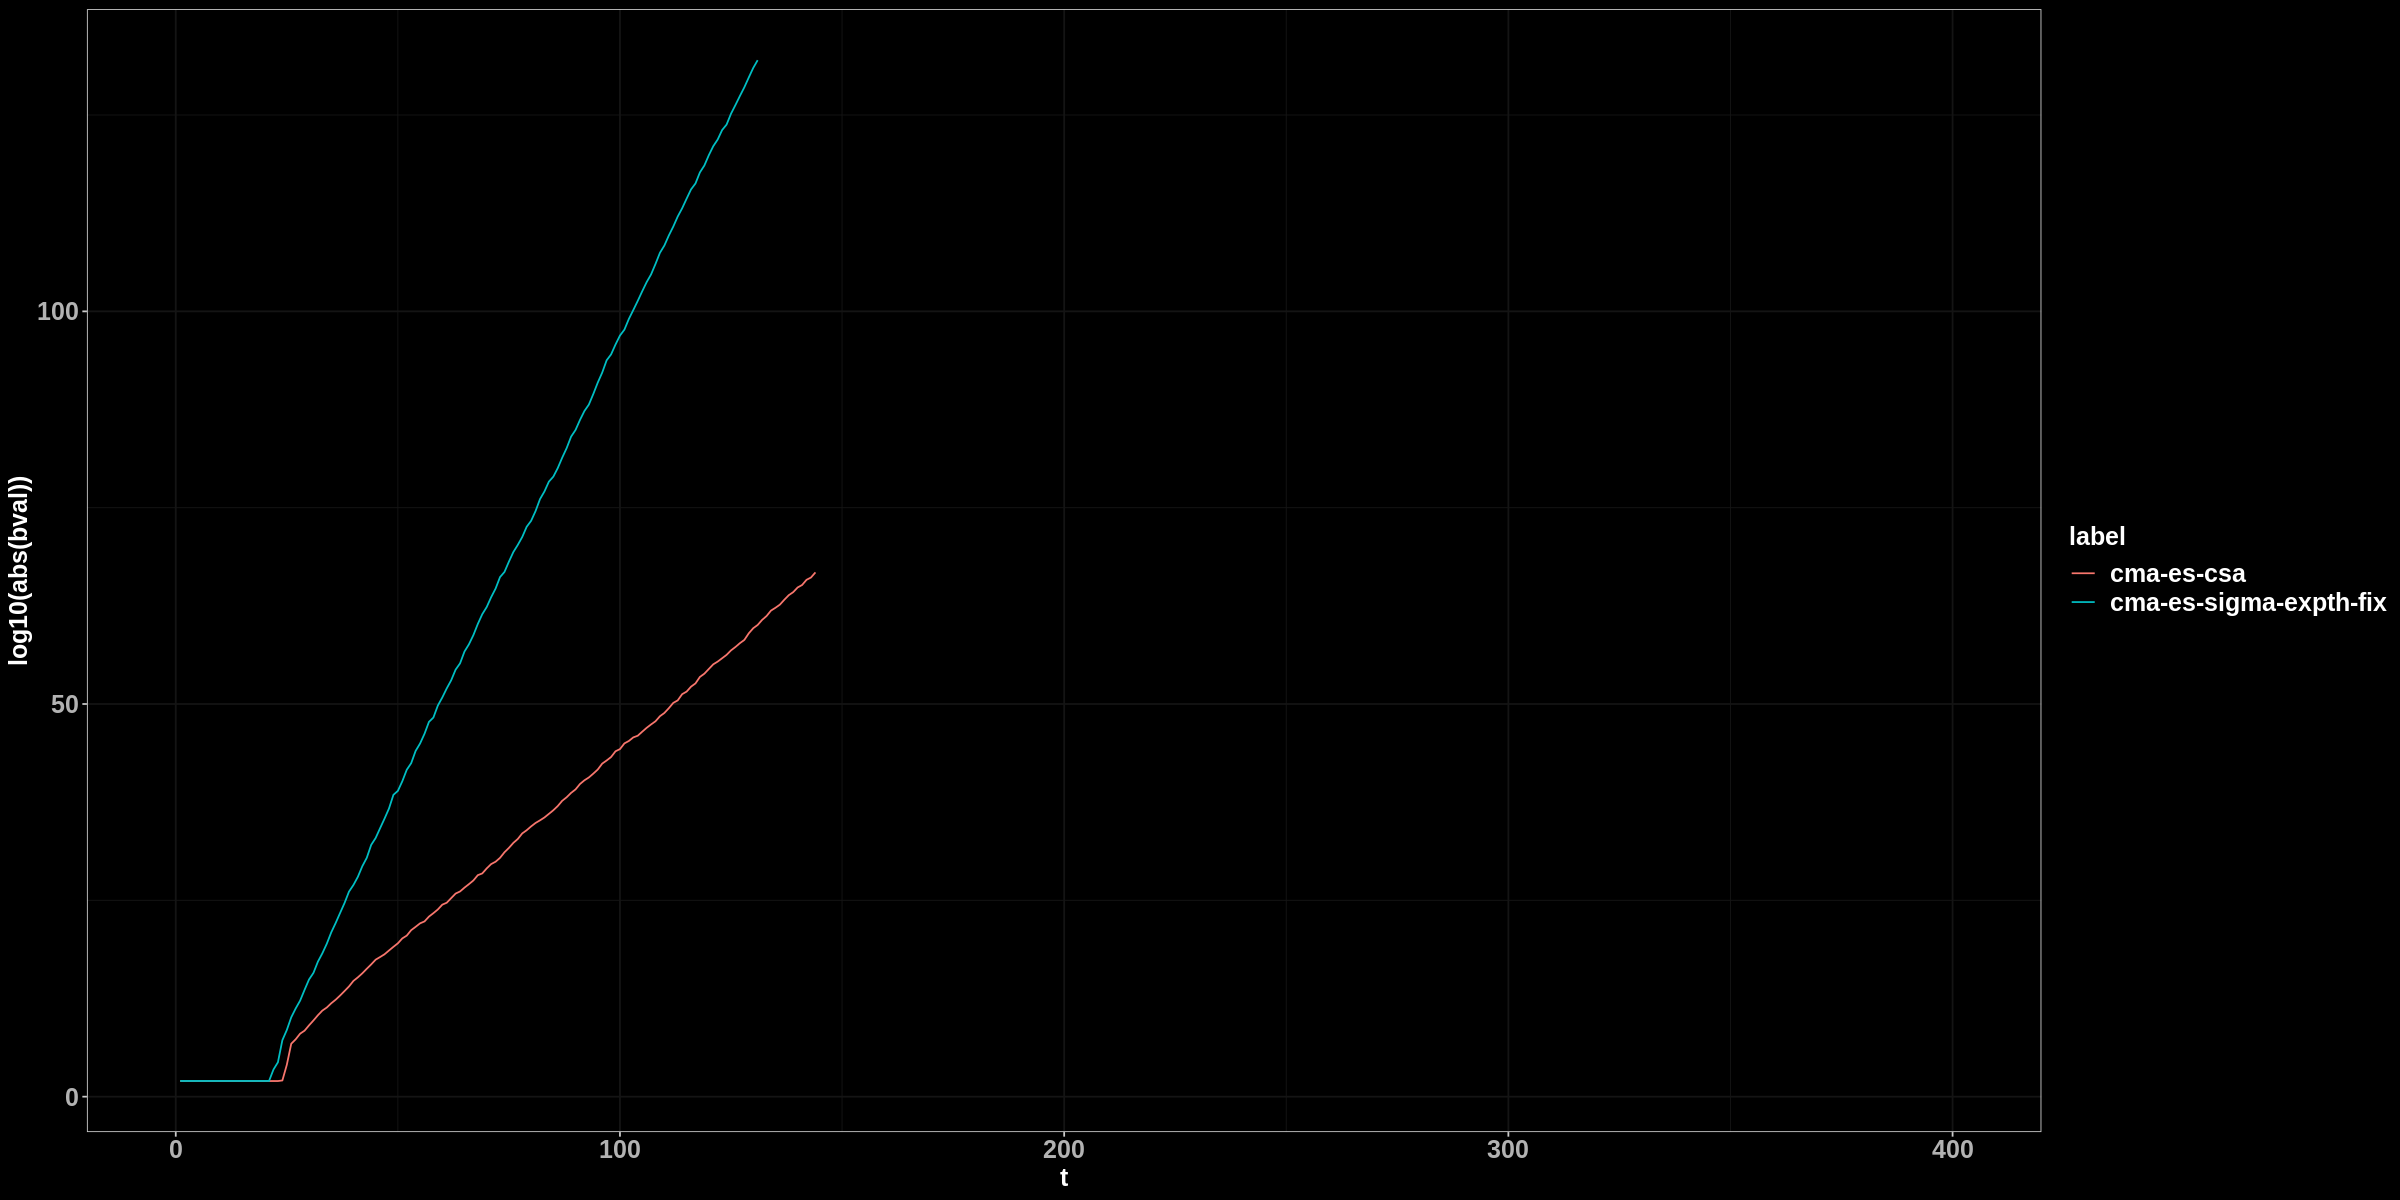

In [327]:
sigma_df %>% 
    plot_sigma(400)
sigma_df %>% 
    plot_bval(400)

## X_0 = (1, ..., 1)

In [328]:
x0 = rep(1, 10)
N = 10
maxiter = round((10000*N)/(4*N))

In [329]:
csa = 
    cma_es_csa(x0, fn = function(x) linear_func(x), lower = -100, upper = 100,  control = list(sigma = 0.01))

In [330]:
ppmf = 
    cma_es_expth(x0, fn = function(x) linear_func(x), lower = -100, upper = 100,  control = list(sigma = 0.01))

In [331]:
sigma_df = 
    list(csa, ppmf) %>% 
    get_sigma()

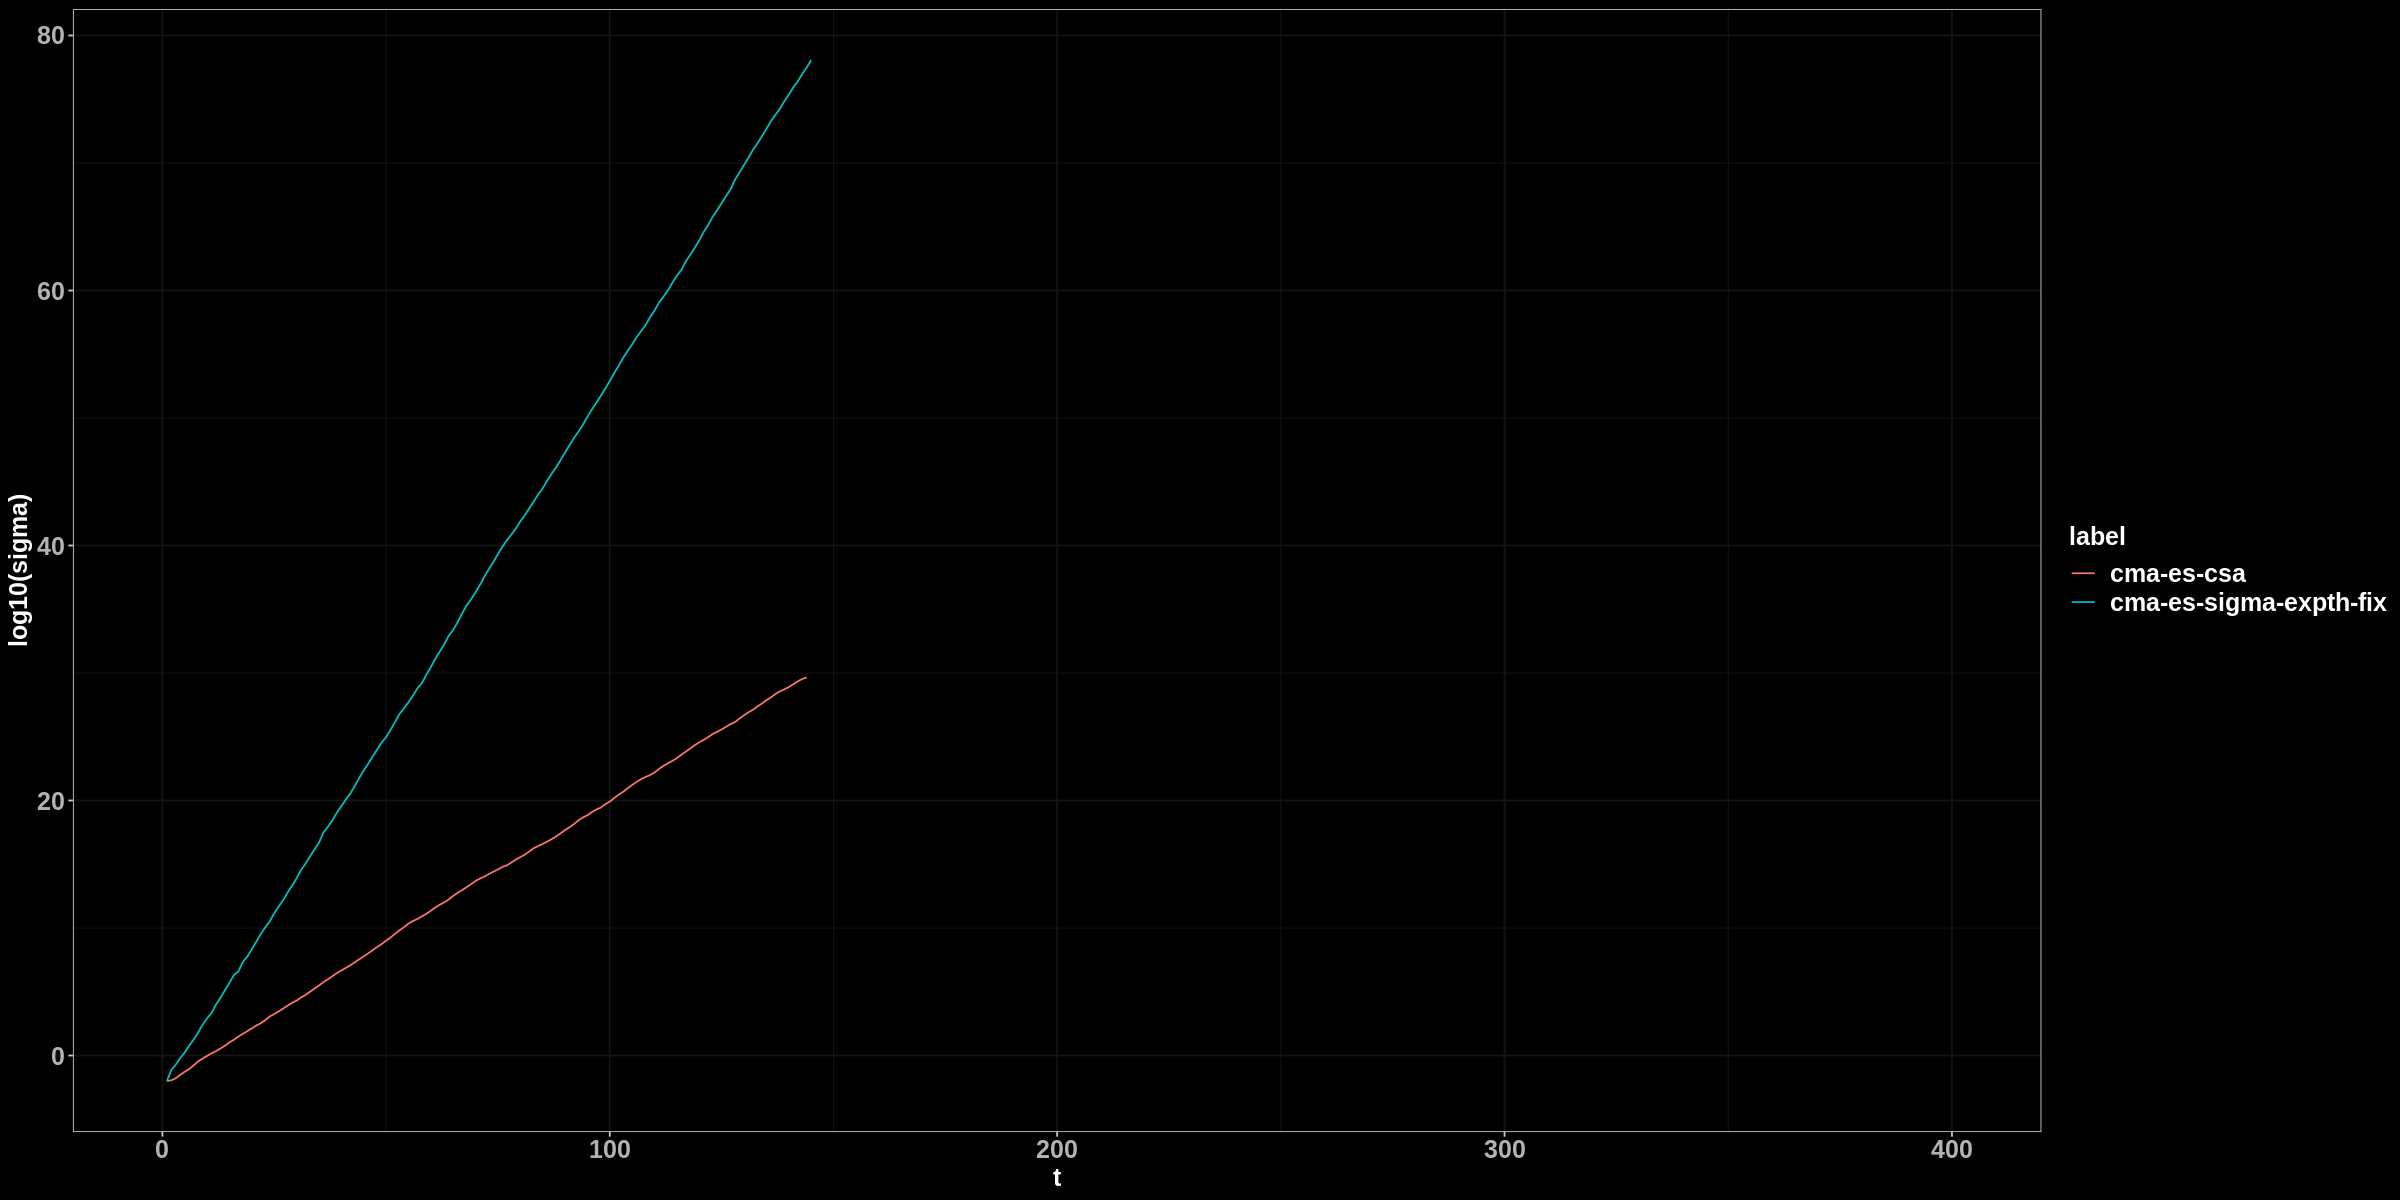

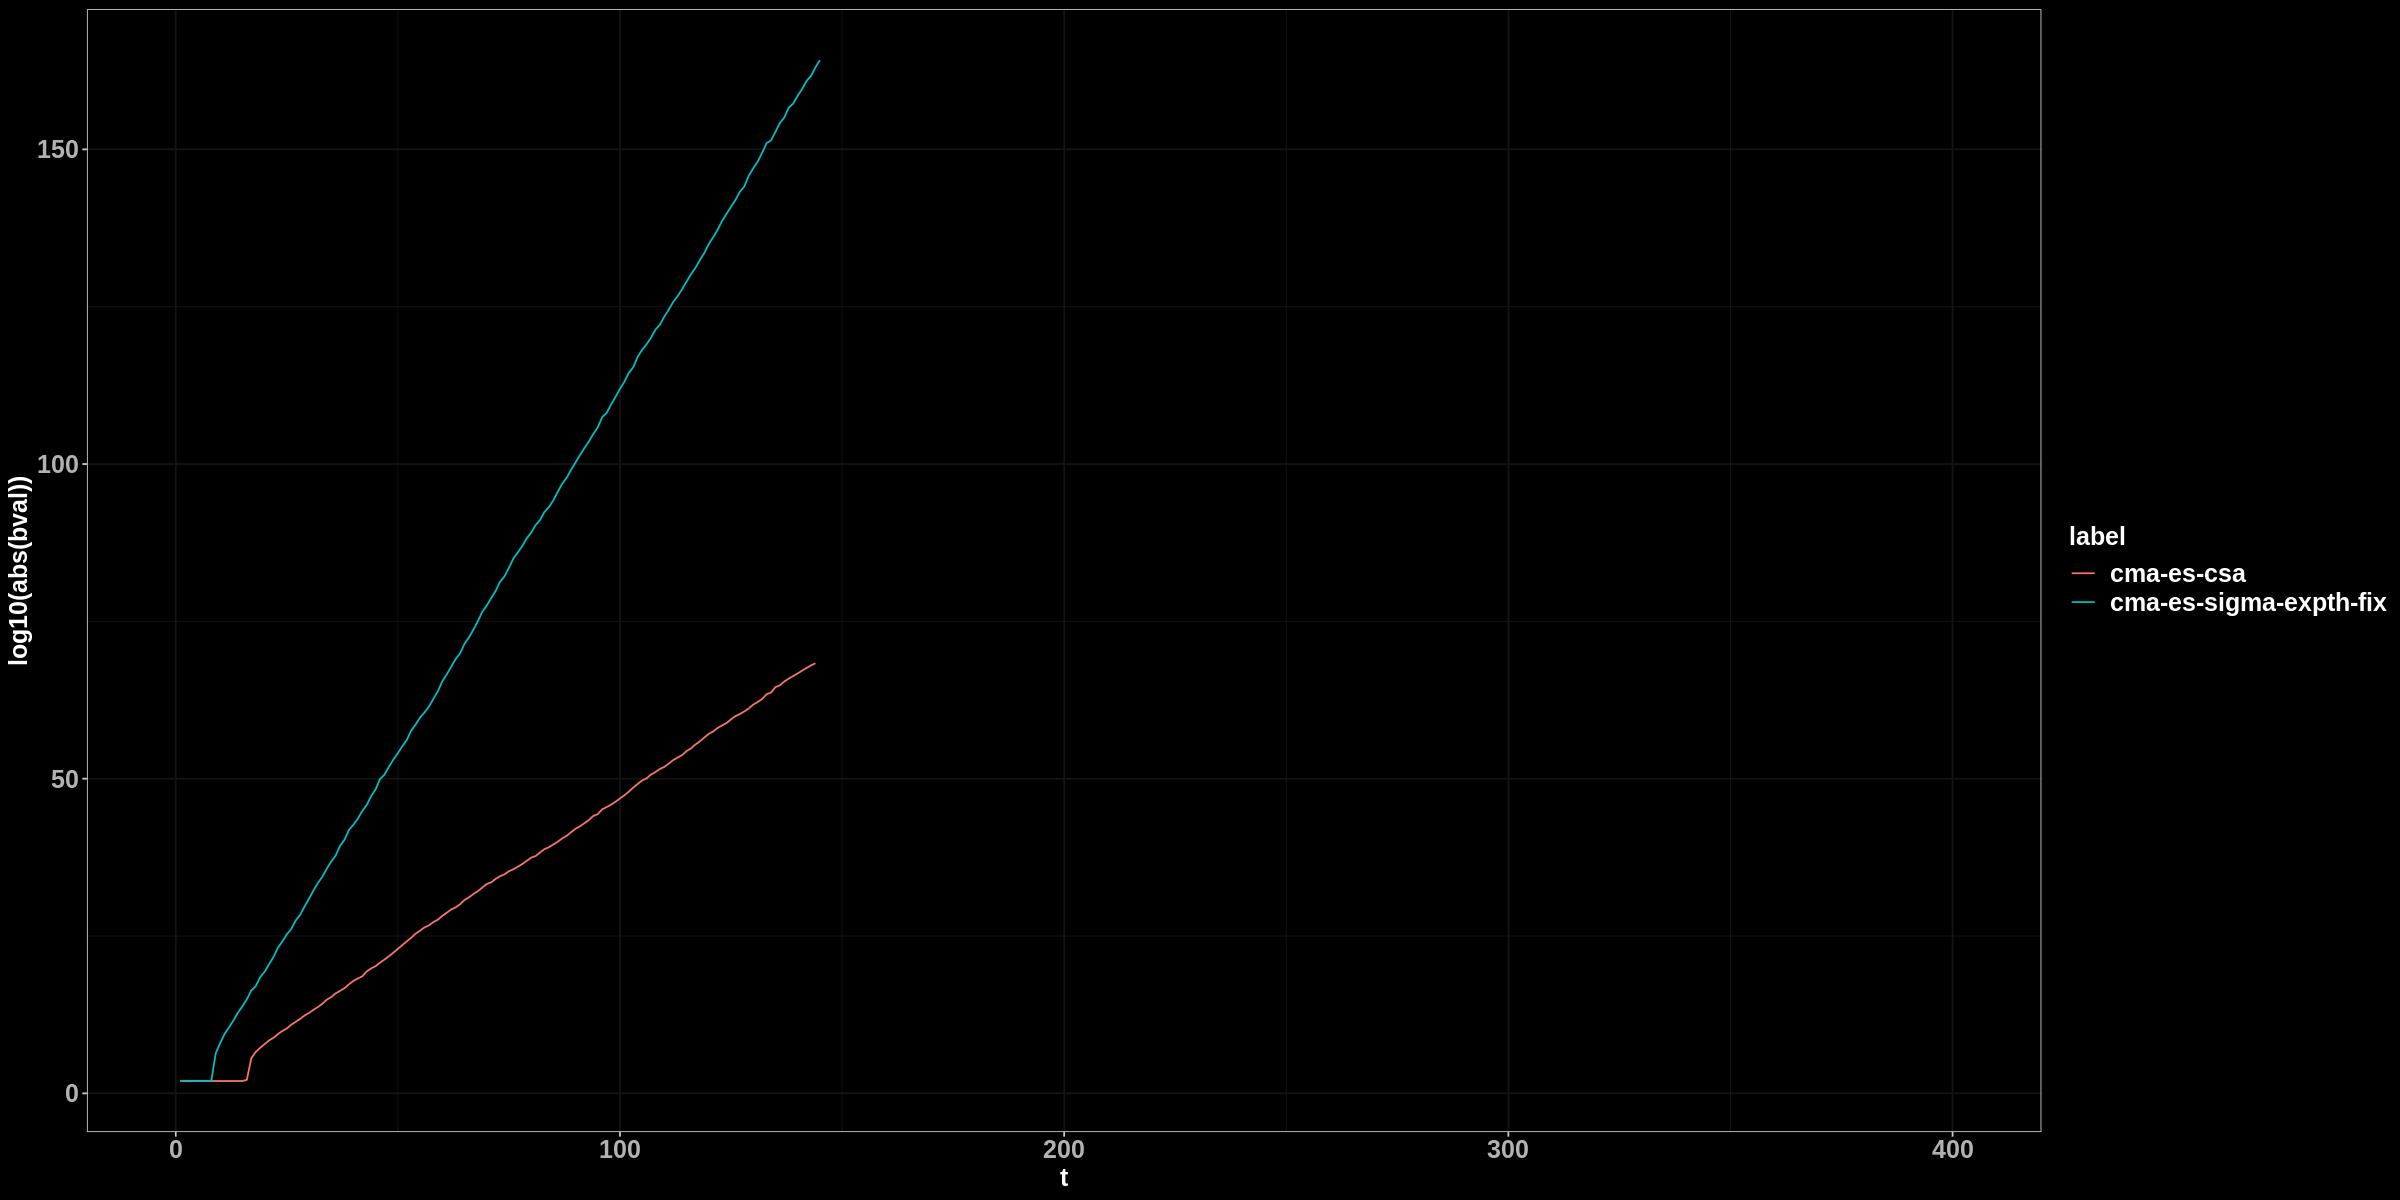

In [332]:
sigma_df %>% 
    plot_sigma(400)
sigma_df %>% 
    plot_bval(400)

# Sphere function, sigma = 100

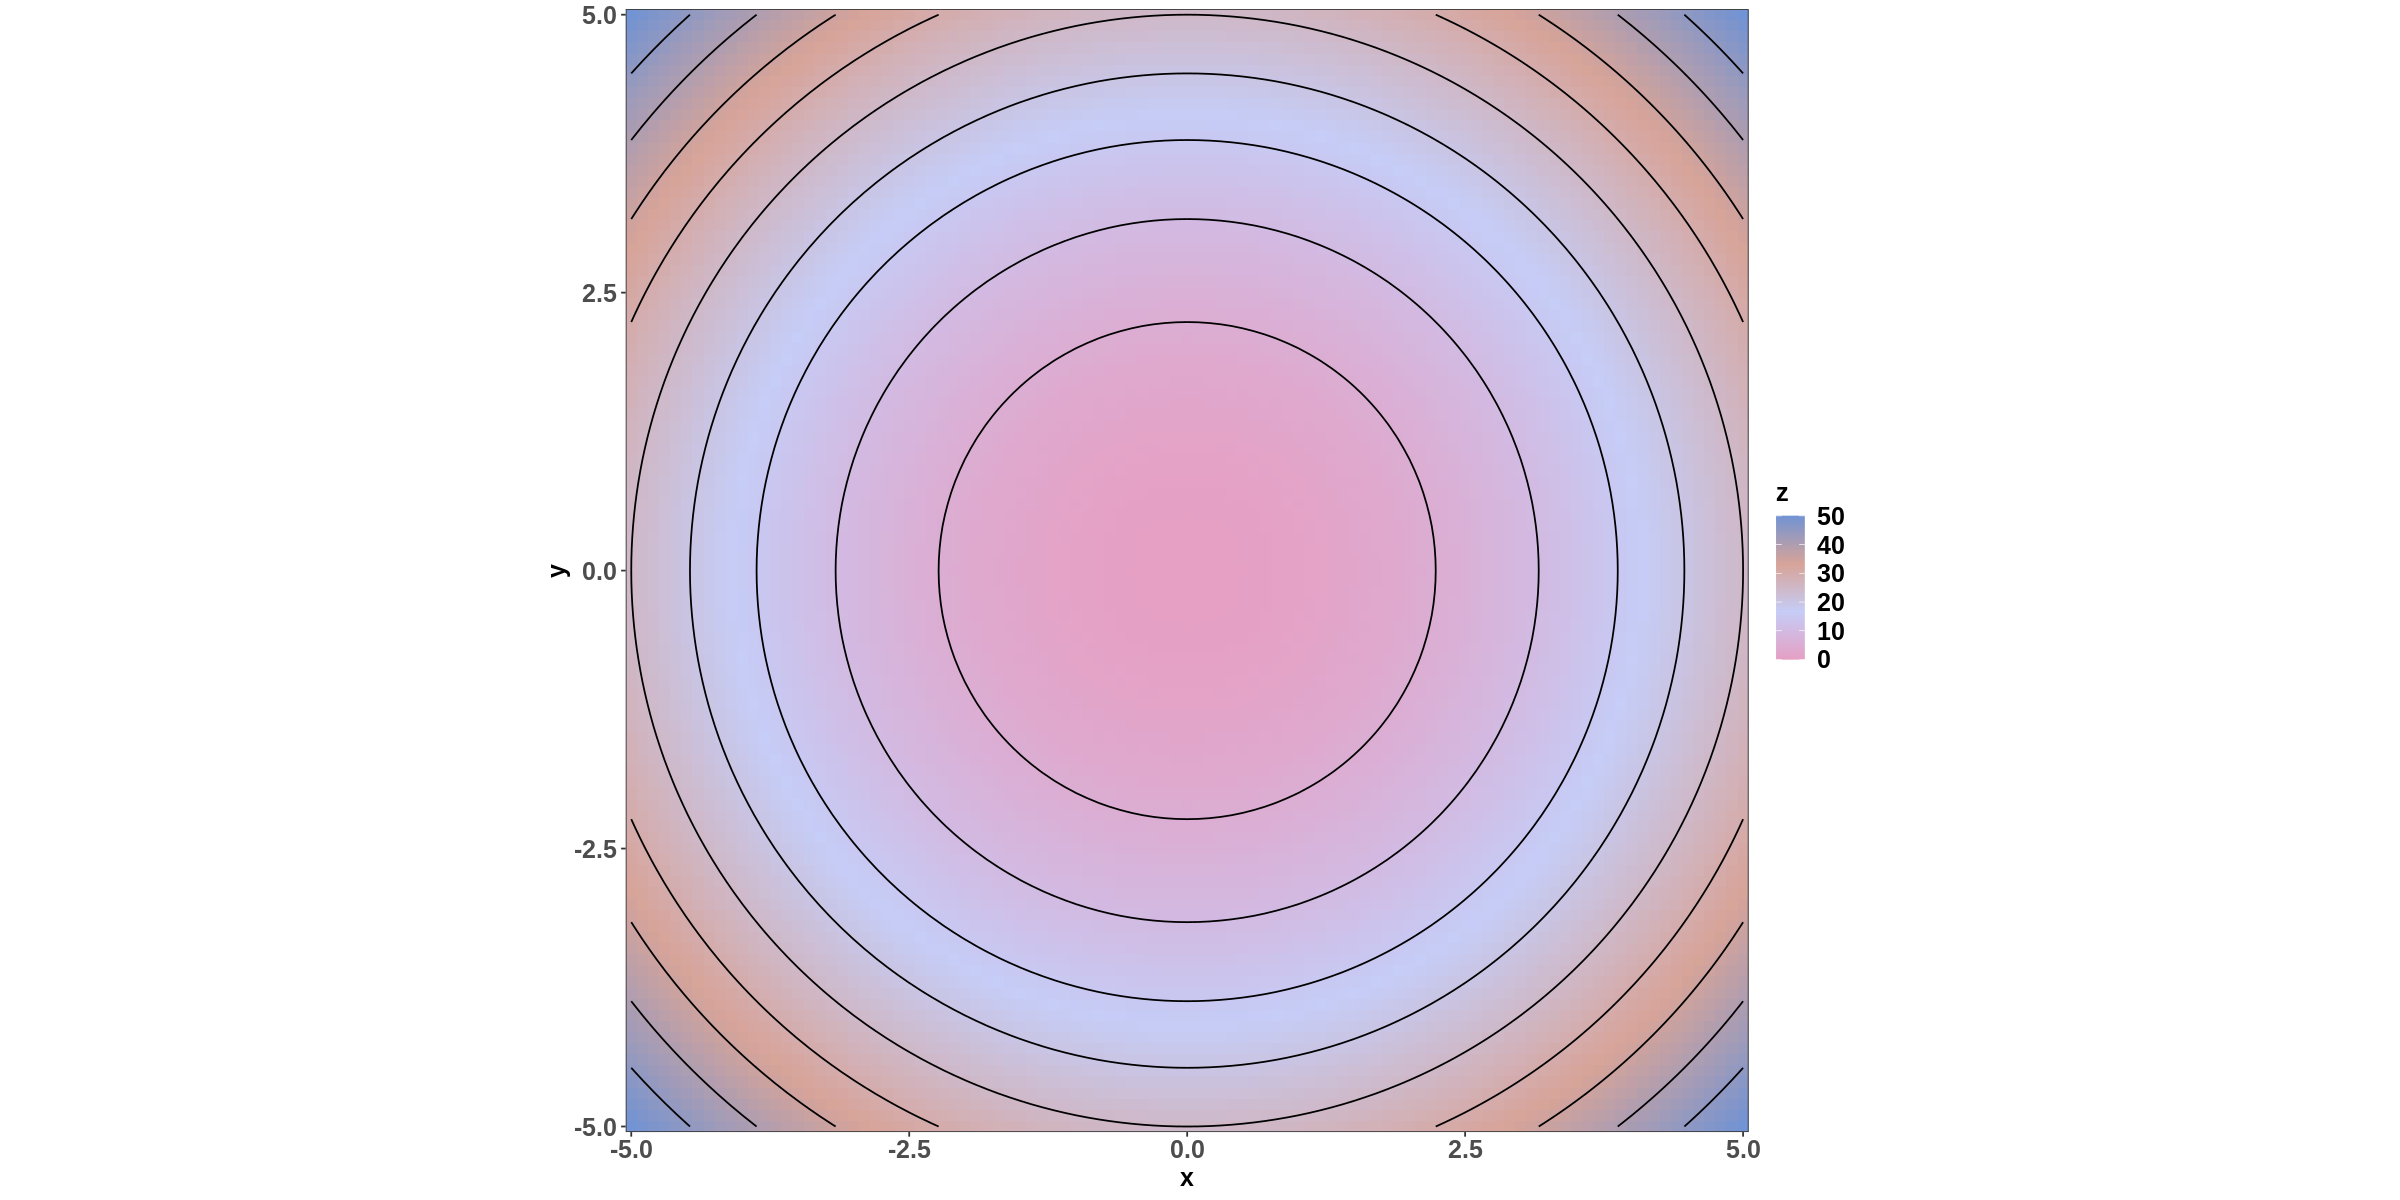

In [209]:
contour_plot(sphere_func, c(-5, 5), c(-5, 5))

## X_0 = (100, ..., 100)

In [210]:
x0 = rep(100, 10)
N = 10
maxiter = round((10000*N)/(4*N))

In [211]:
csa = 
    cma_es_csa(x0, fn = function(x) sphere_func(x), lower = -100, upper = 100, control = list(sigma = 100))

In [212]:
ppmf = 
    cma_es_expth(x0, fn = function(x) sphere_func(x), lower = -100, upper = 100, control = list(sigma = 100))

In [213]:
sigma_df = 
    list(csa, ppmf) %>% 
    get_sigma()

Warning message:
“Removed 869 row(s) containing missing values (geom_path).”
Warning message:
“Removed 869 row(s) containing missing values (geom_path).”


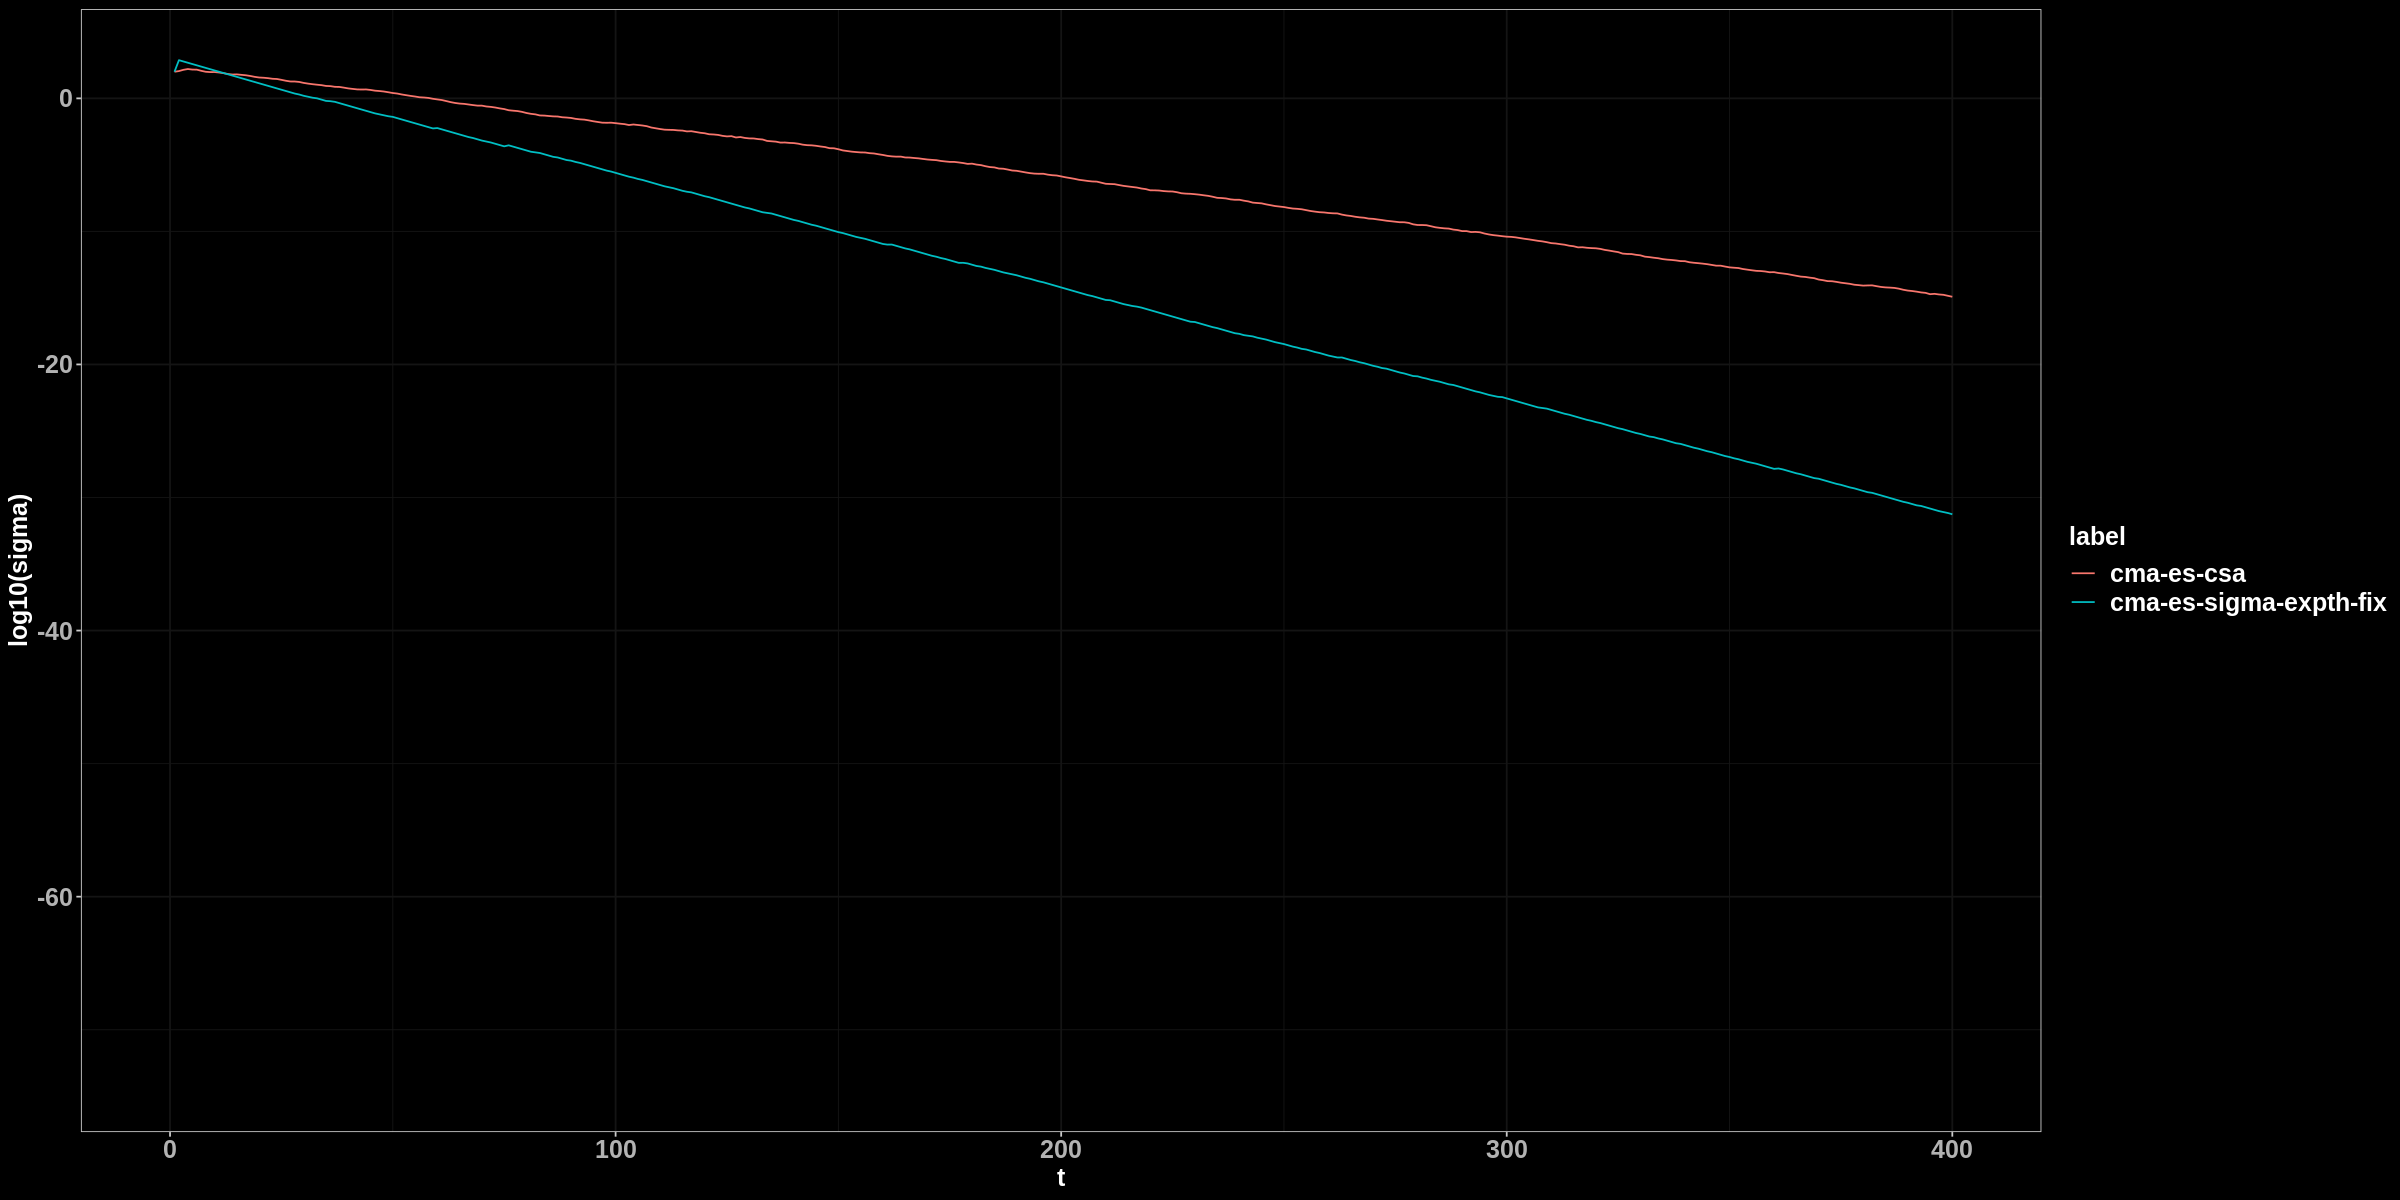

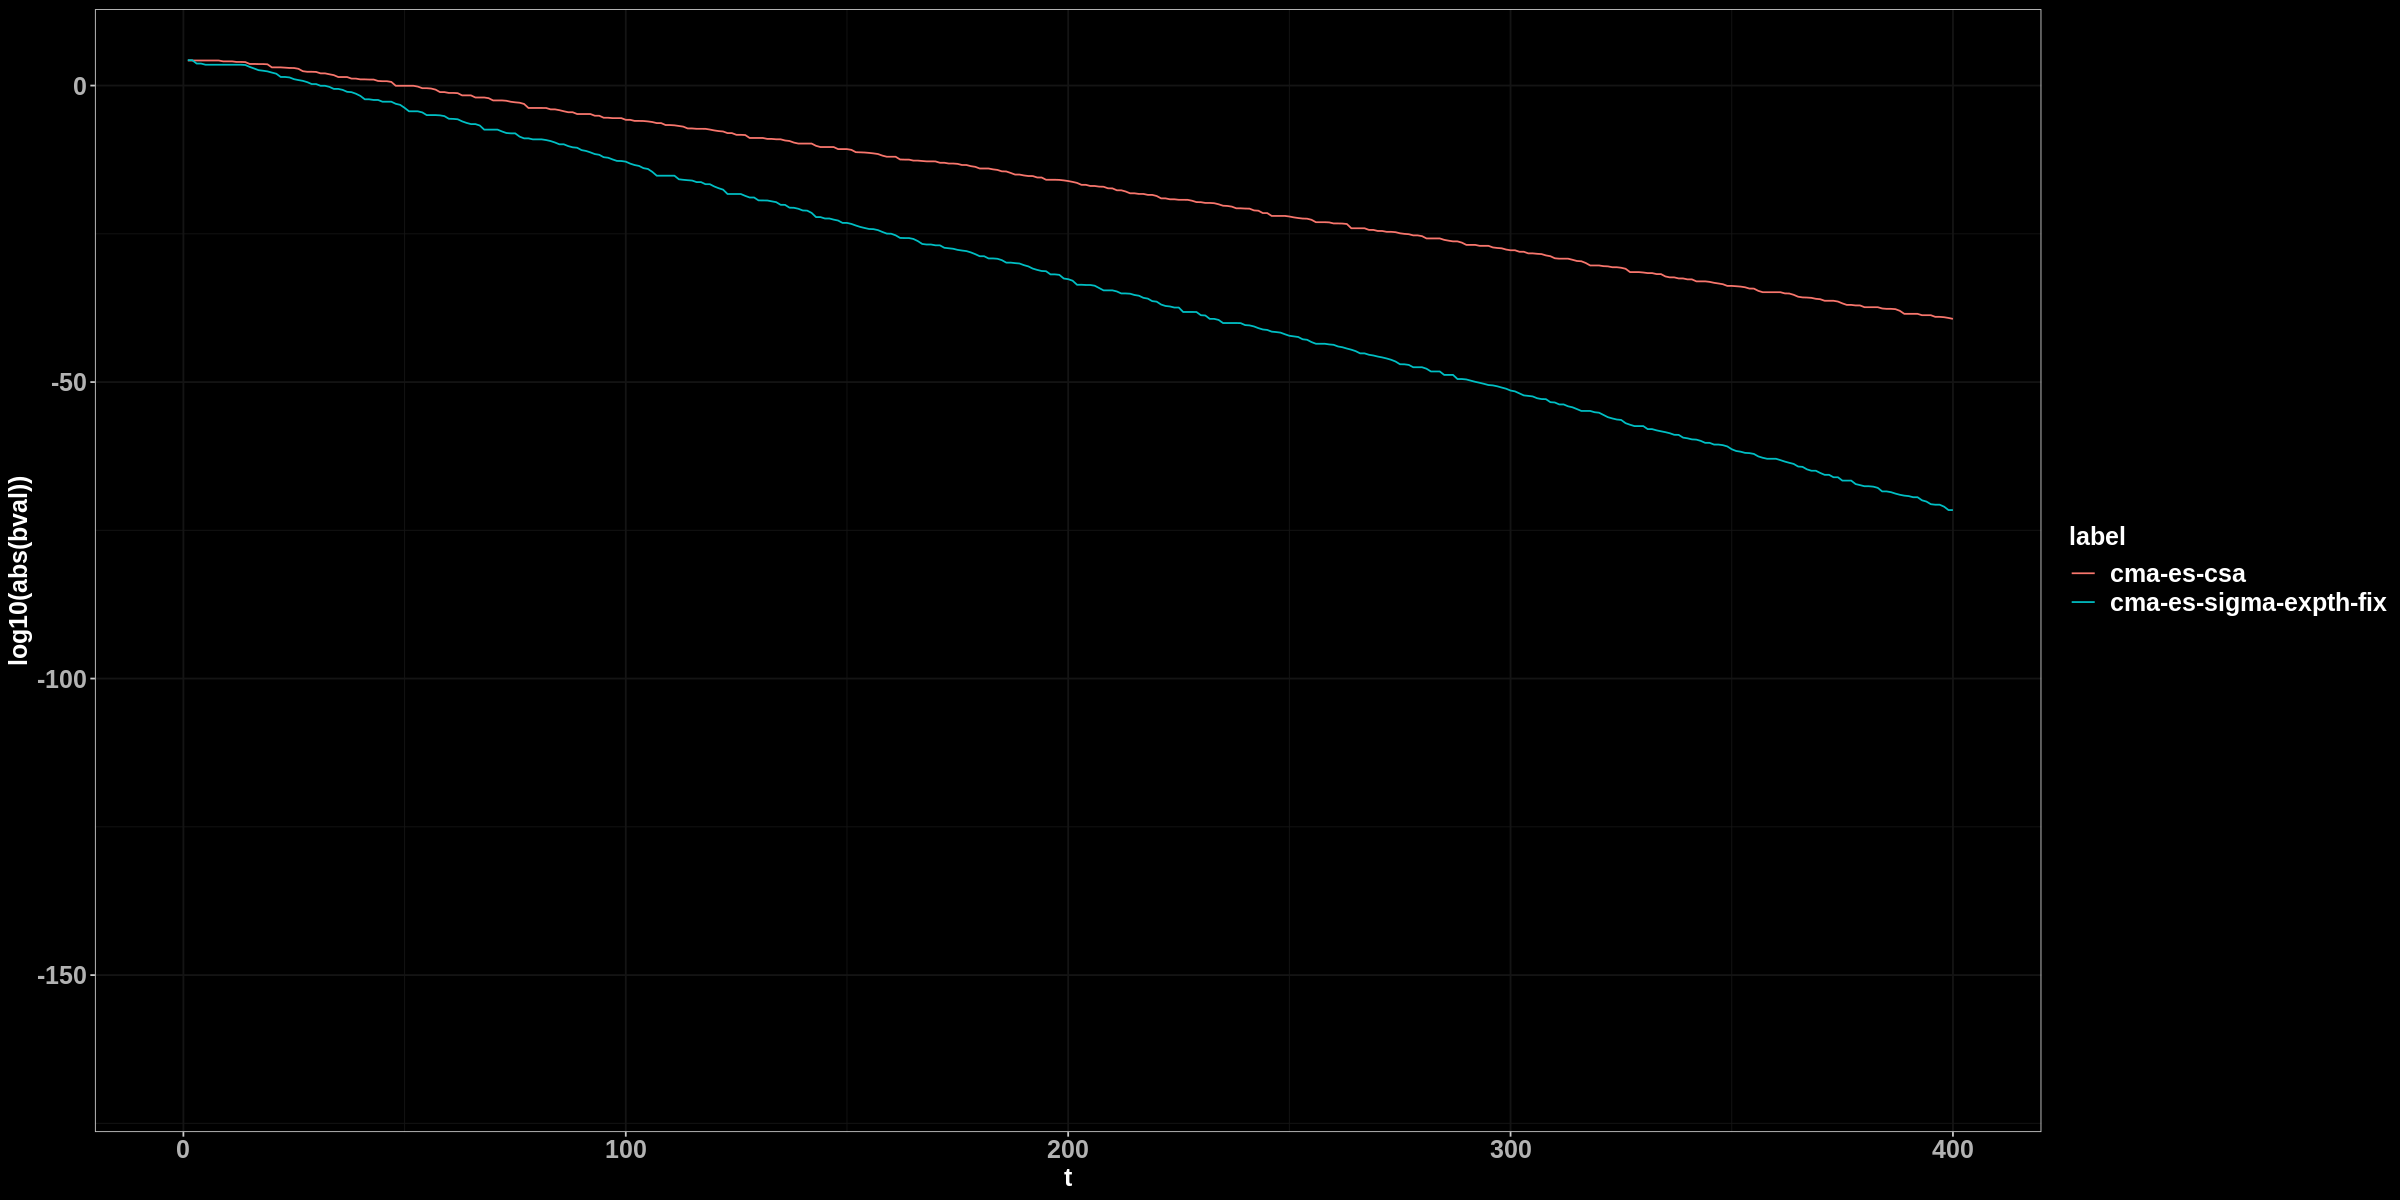

In [214]:
sigma_df %>% 
    plot_sigma(400)
sigma_df %>% 
    plot_bval(400)

## X_0 = (1, ..., 1)

In [215]:
x0 = rep(1, 10)
N = 10
maxiter = round((10000*N)/(4*N))

In [216]:
csa = 
    cma_es_csa(x0, fn = function(x) sphere_func(x), lower = -100, upper = 100, control = list(sigma = 100))

In [217]:
ppmf = 
    cma_es_expth(x0, fn = function(x) sphere_func(x), lower = -100, upper = 100, control = list(sigma = 100))

In [218]:
sigma_df = 
    list(csa, ppmf) %>% 
    get_sigma()

Warning message:
“Removed 862 row(s) containing missing values (geom_path).”
Warning message:
“Removed 862 row(s) containing missing values (geom_path).”


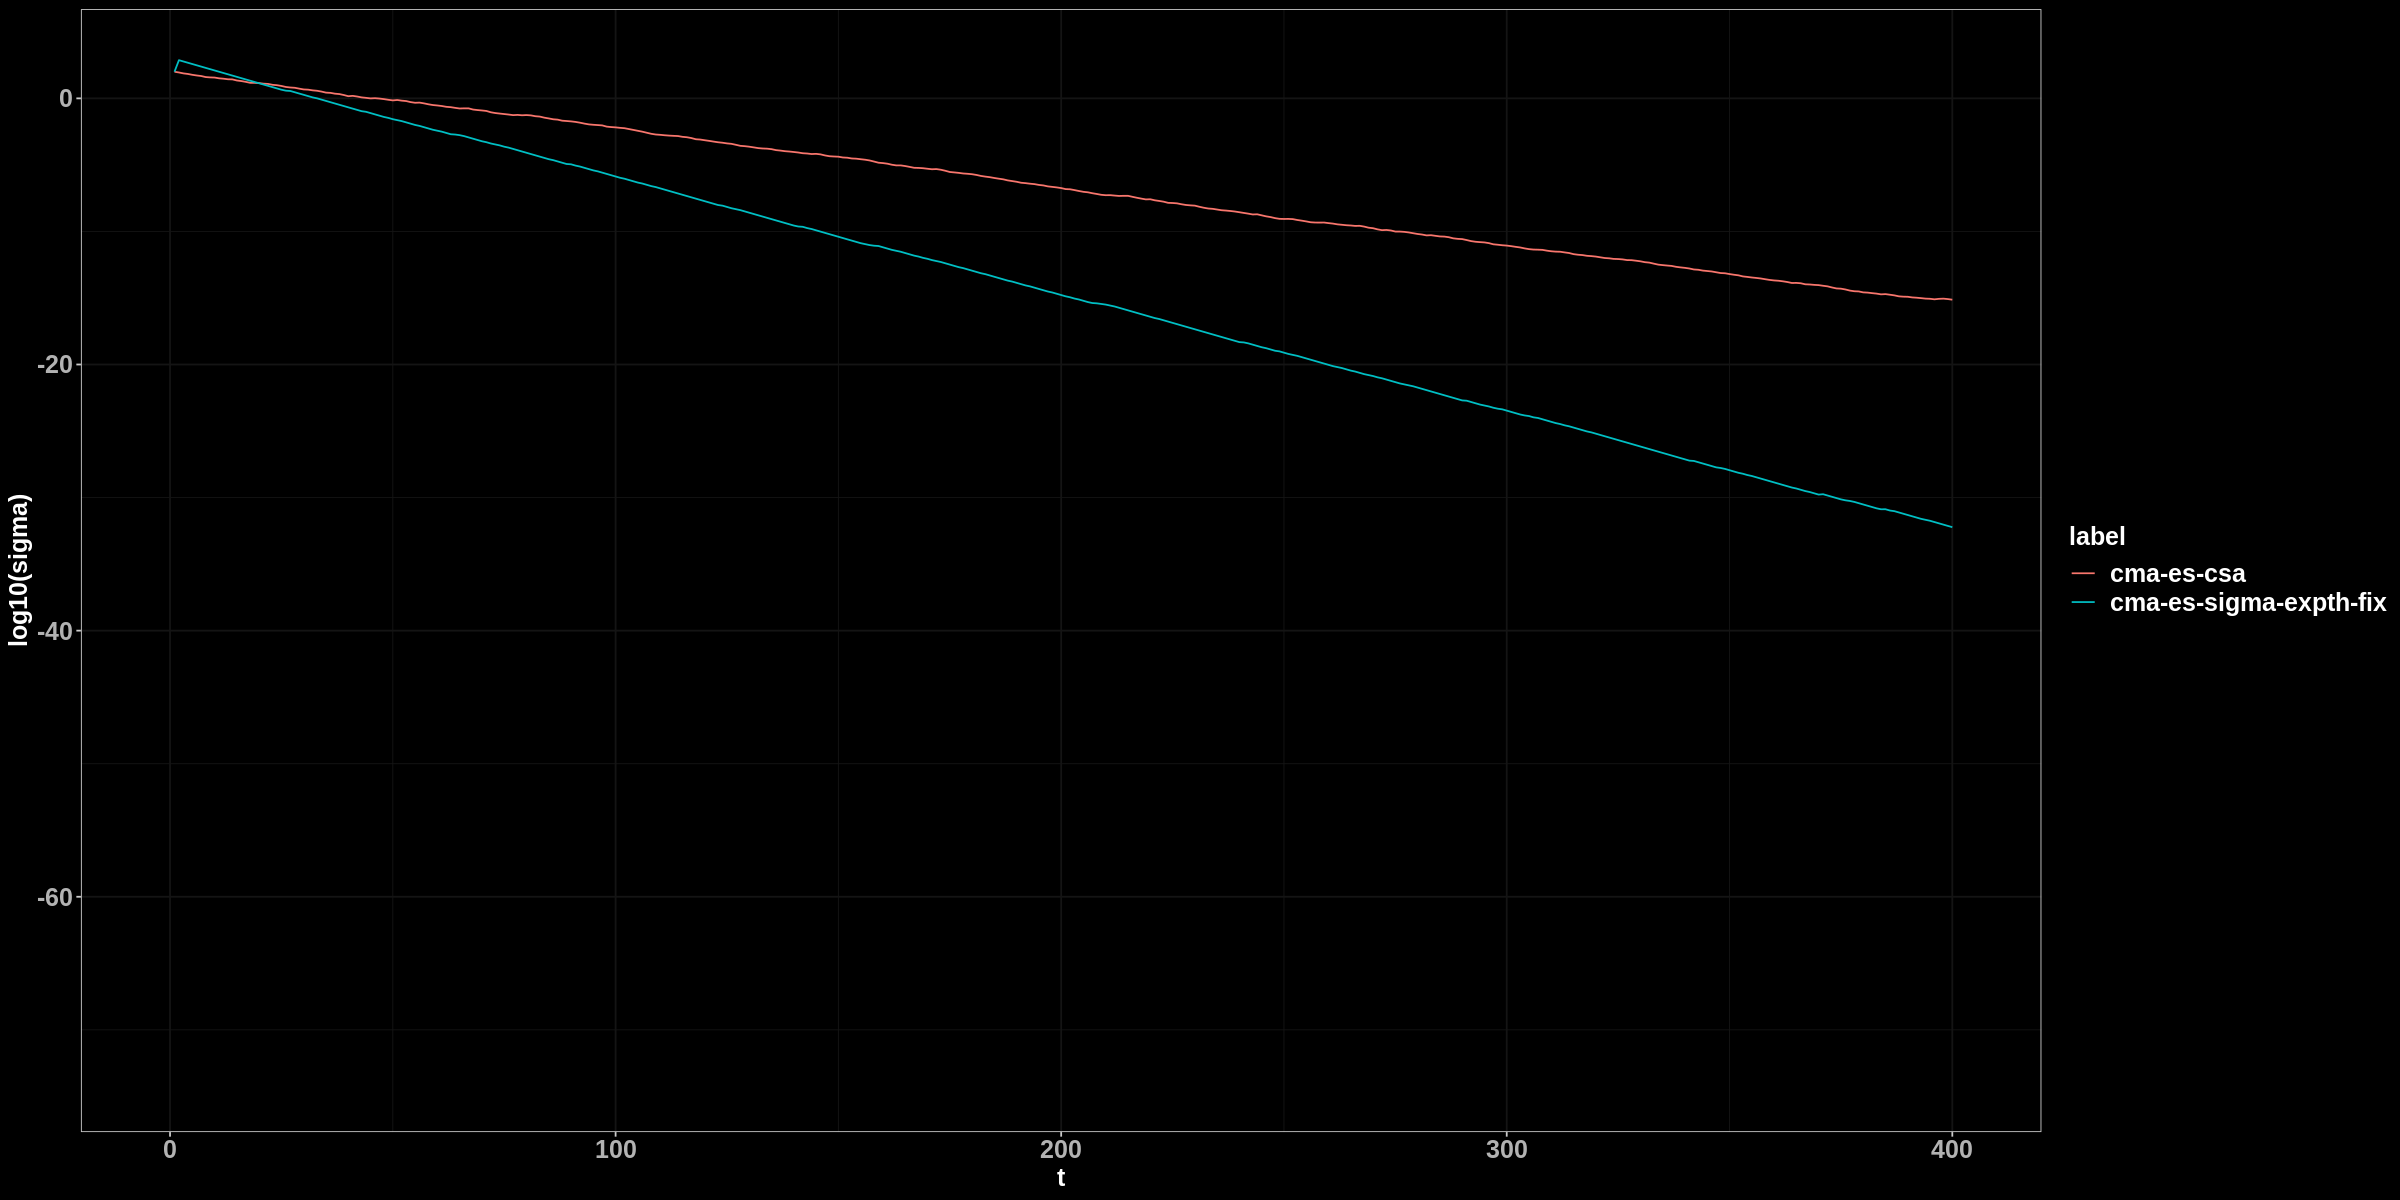

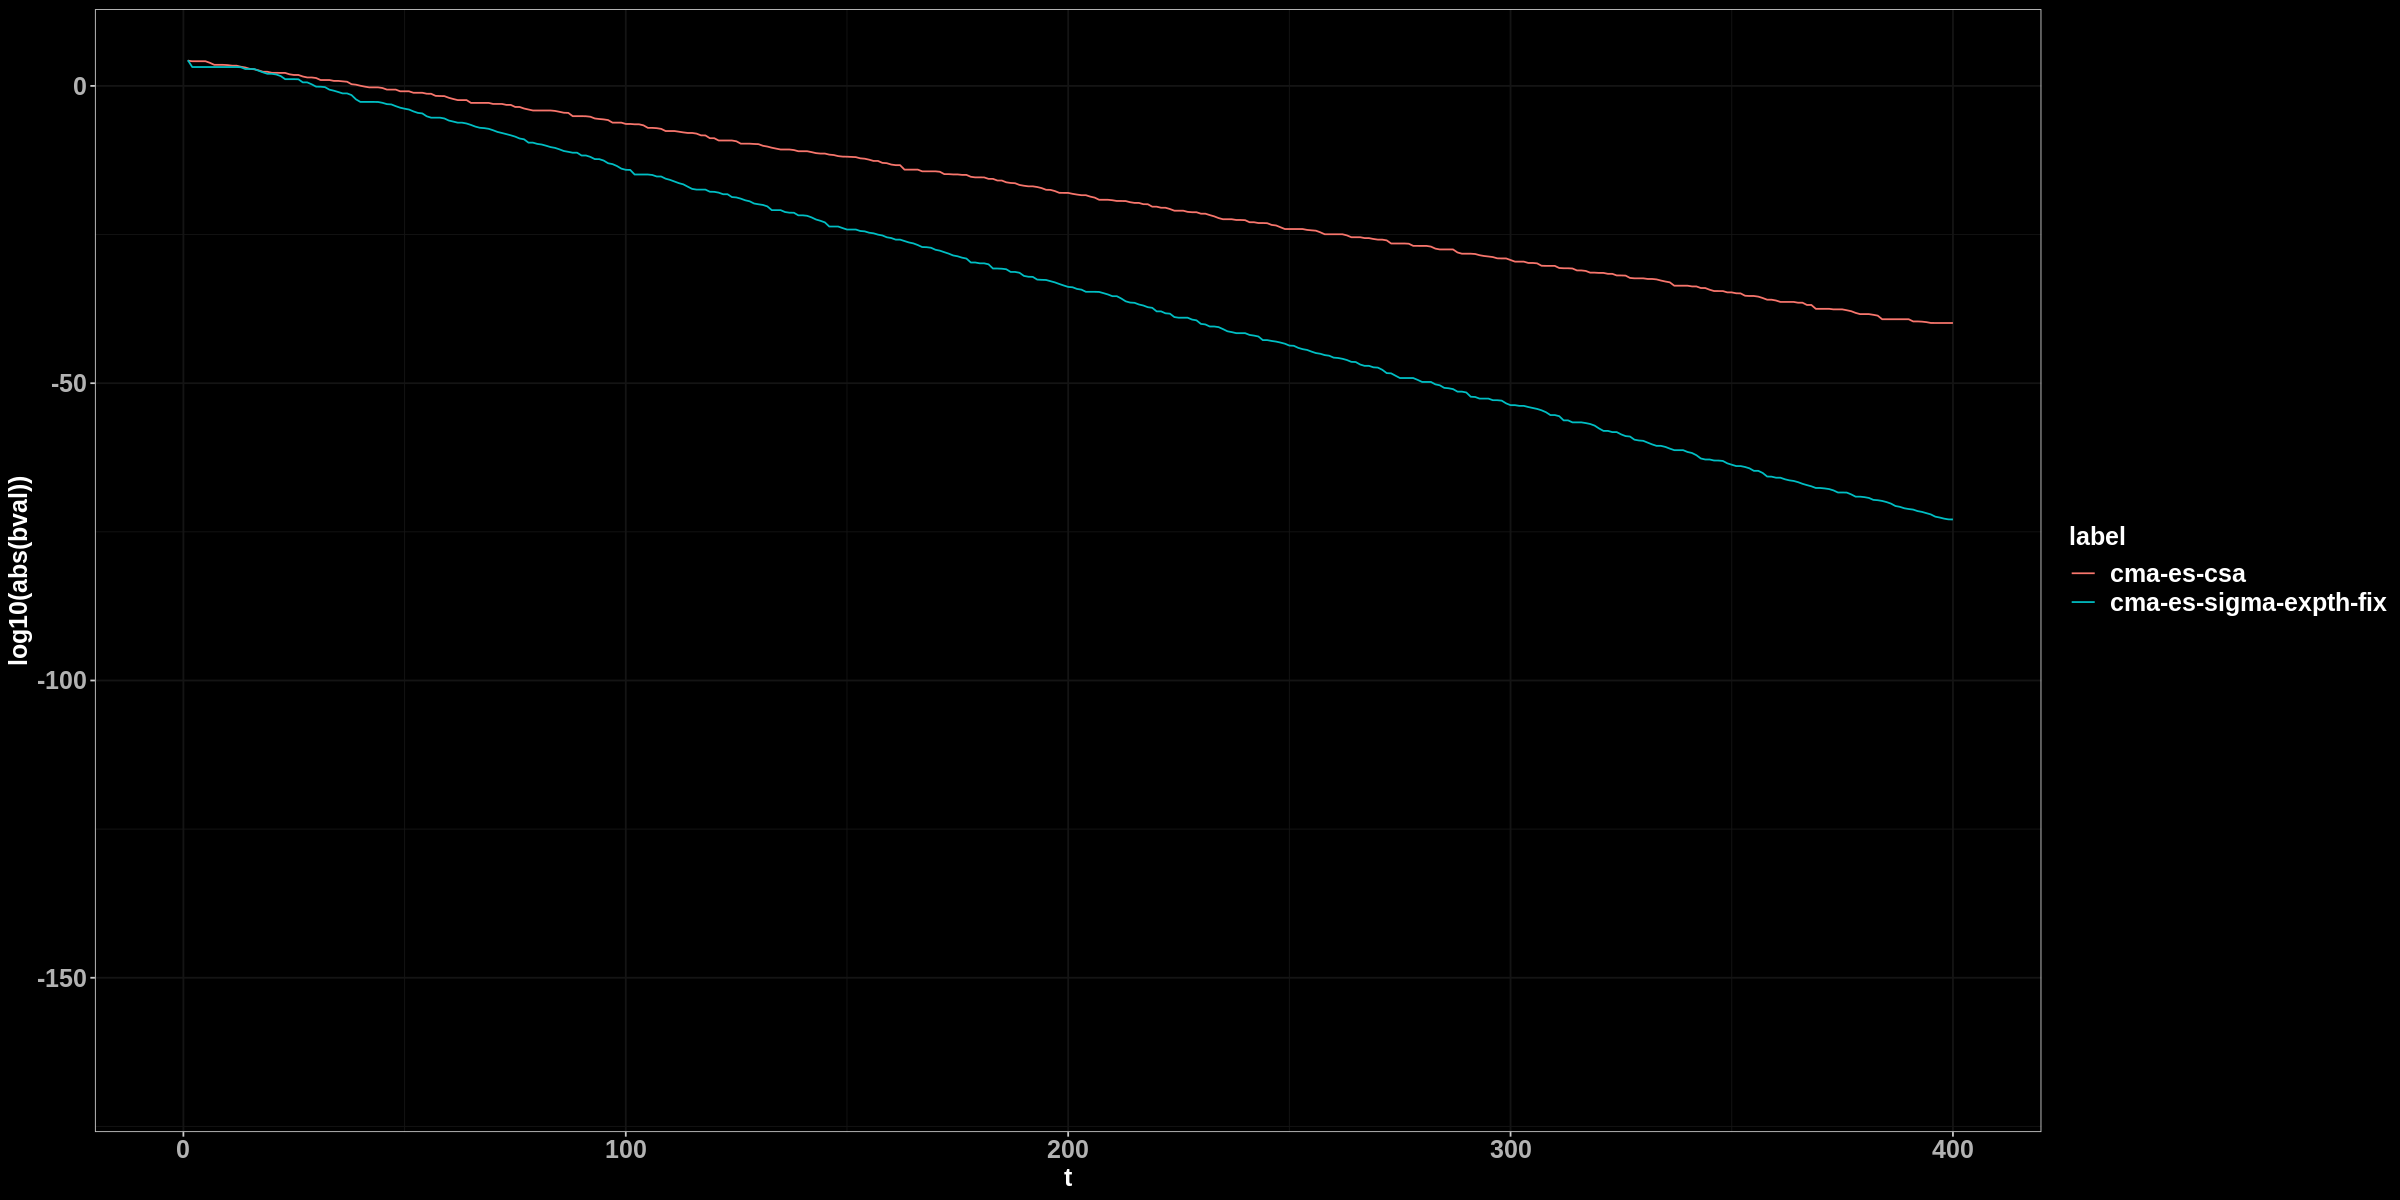

In [219]:
sigma_df %>% 
    plot_sigma(400)
sigma_df %>% 
    plot_bval(400)

# Sphere function, sigma = 0.01

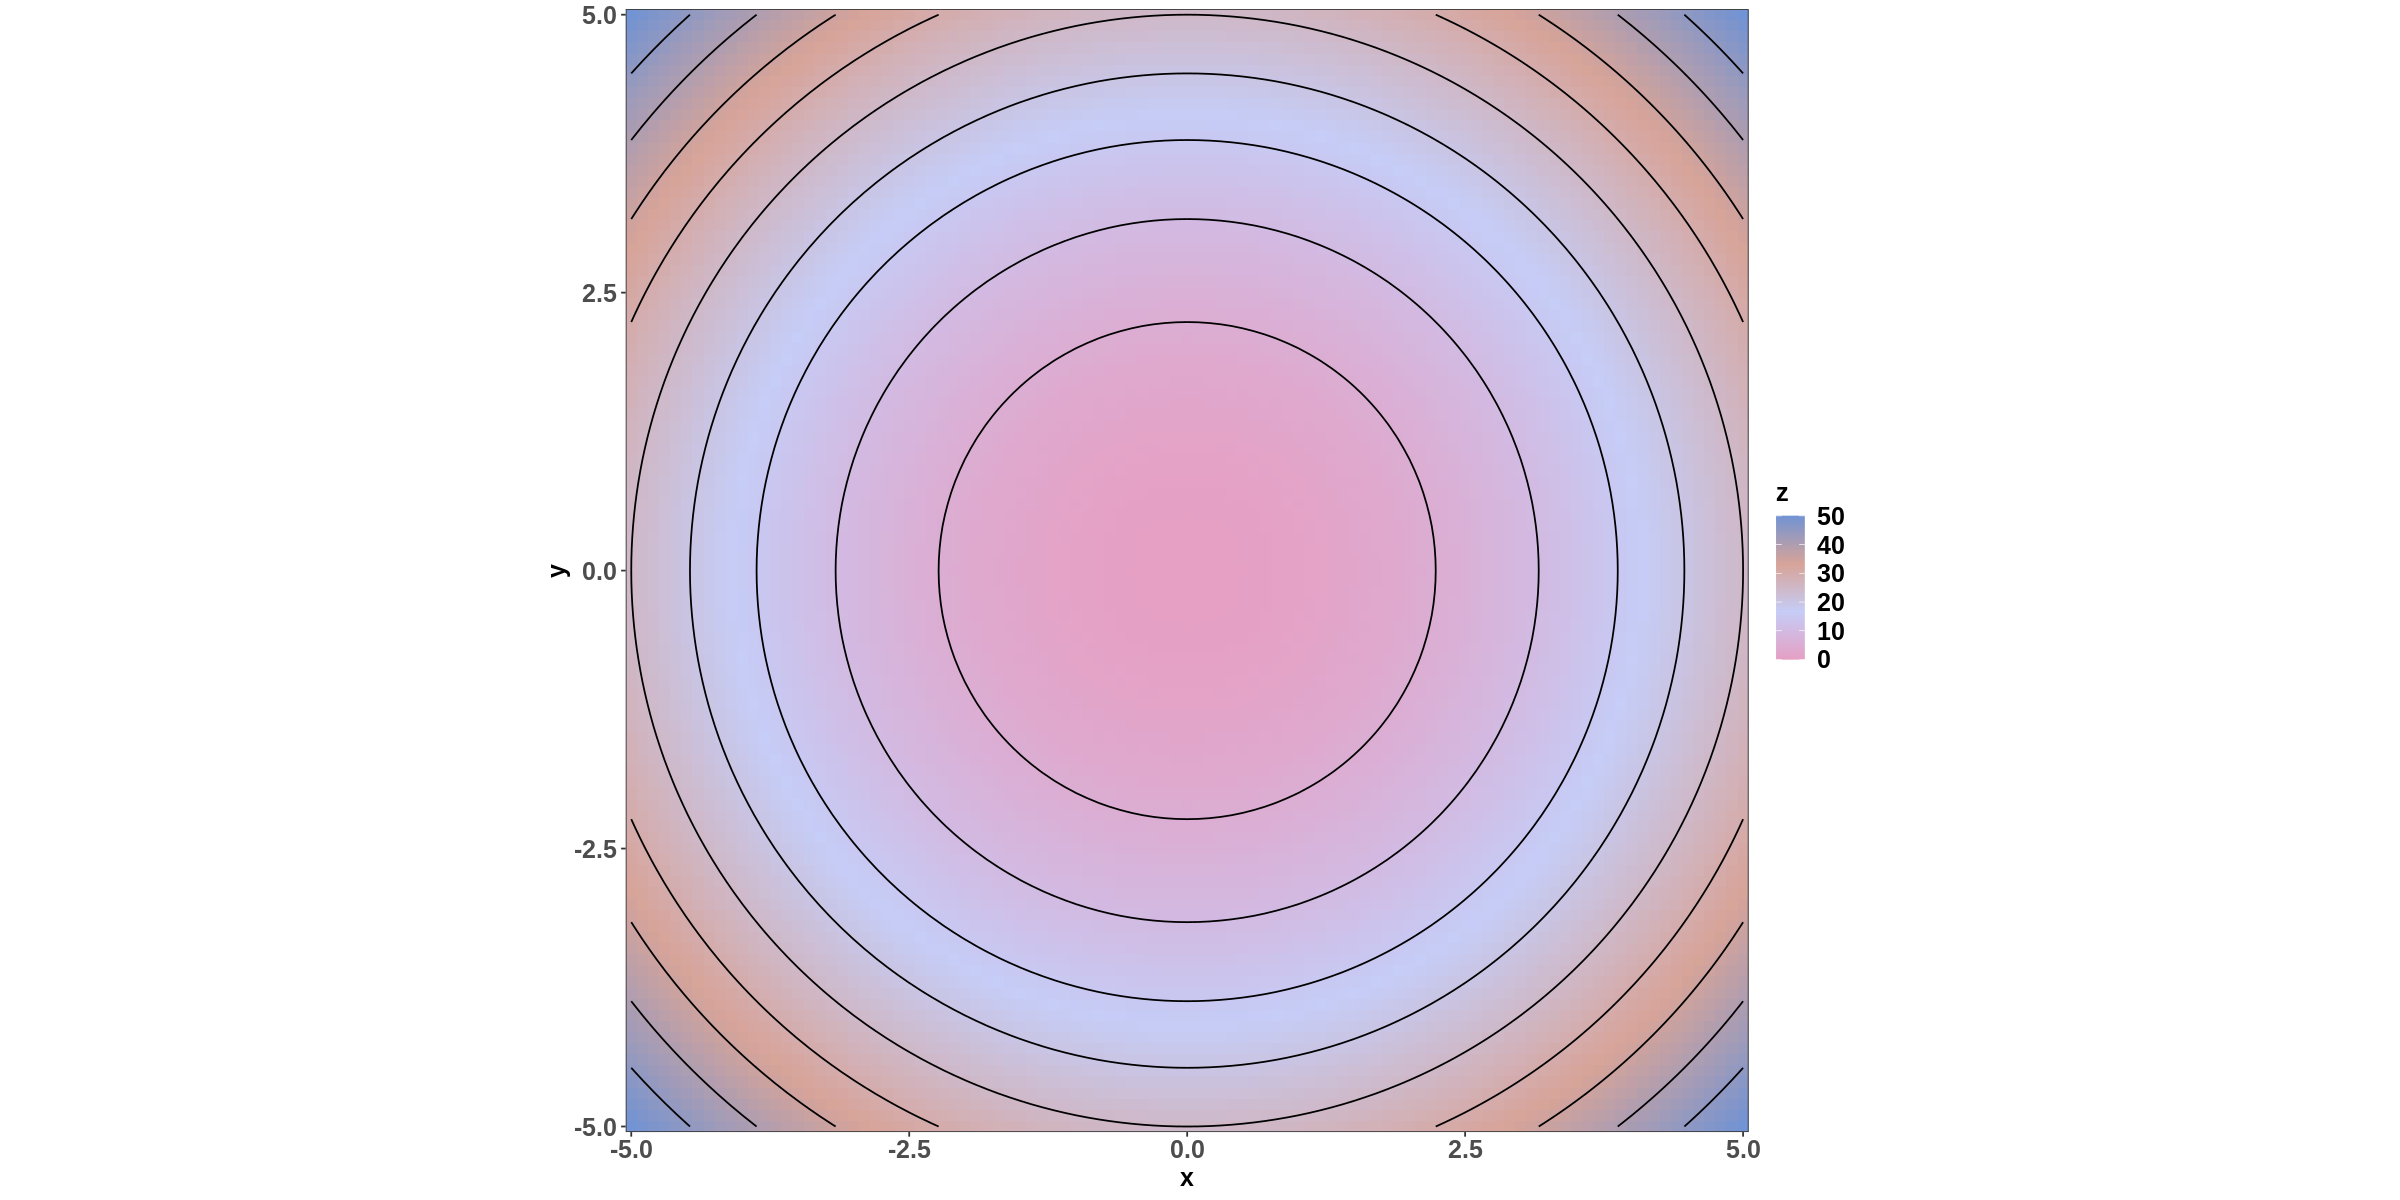

In [220]:
contour_plot(sphere_func, c(-5, 5), c(-5, 5))

## X_0 = (100, ..., 100)

In [221]:
x0 = rep(100, 10)
N = 10
maxiter = round((10000*N)/(4*N))

In [222]:
csa = 
    cma_es_csa(x0, fn = function(x) sphere_func(x), lower = -100, upper = 100, control = list(sigma = 0.01))

In [223]:
ppmf = 
    cma_es_expth(x0, fn = function(x) sphere_func(x), lower = -100, upper = 100, control = list(sigma = 0.01))

In [224]:
sigma_df = 
    list(csa, ppmf) %>% 
    get_sigma()

Warning message:
“Removed 1547 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1547 row(s) containing missing values (geom_path).”


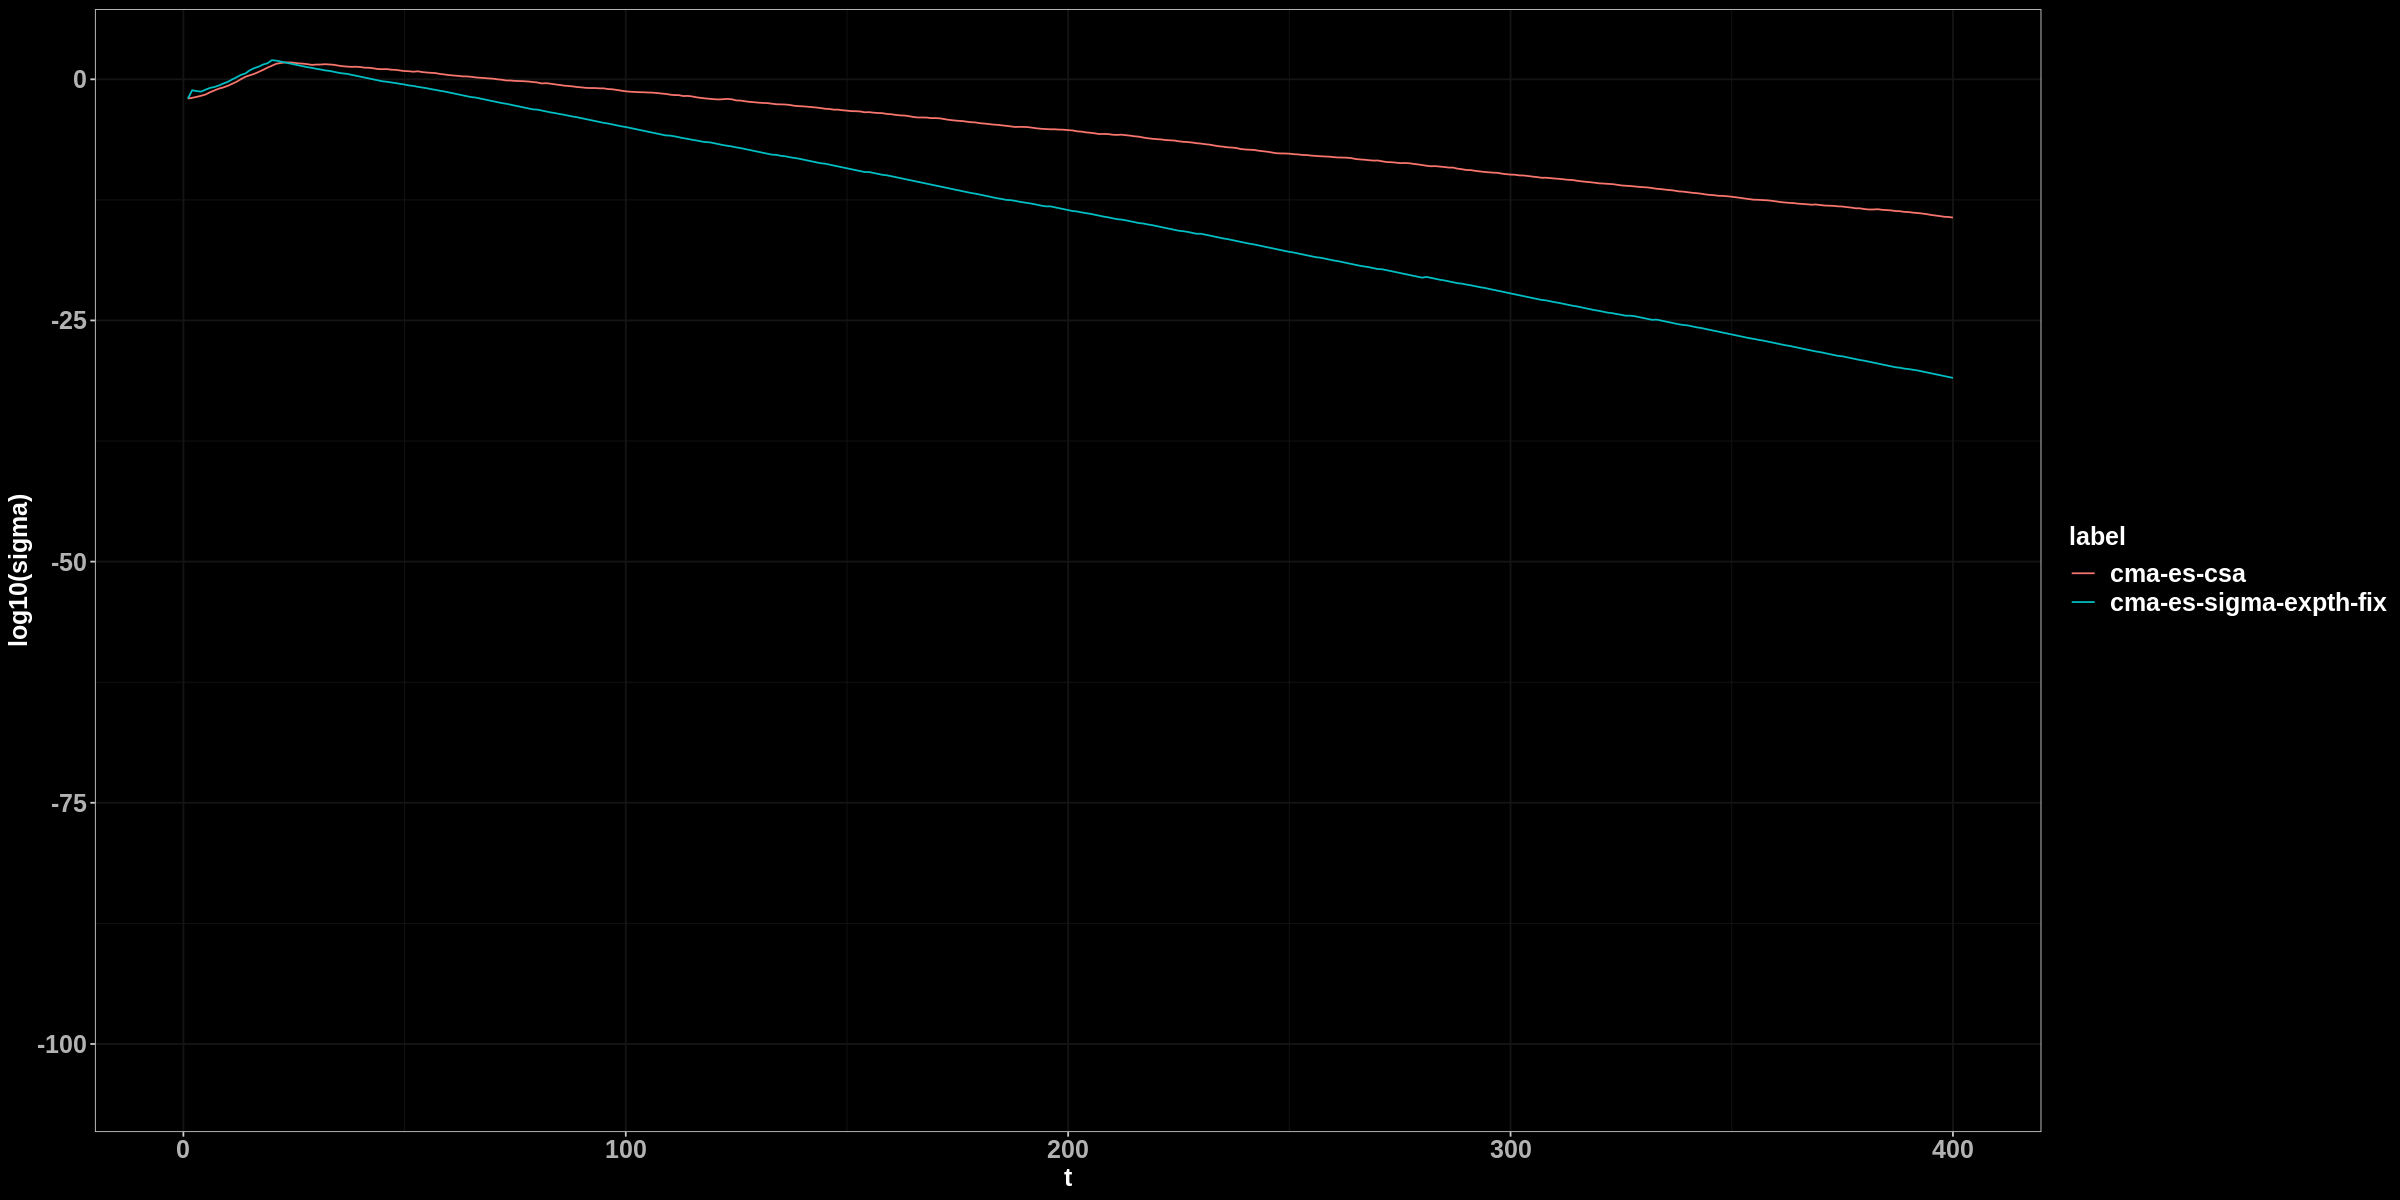

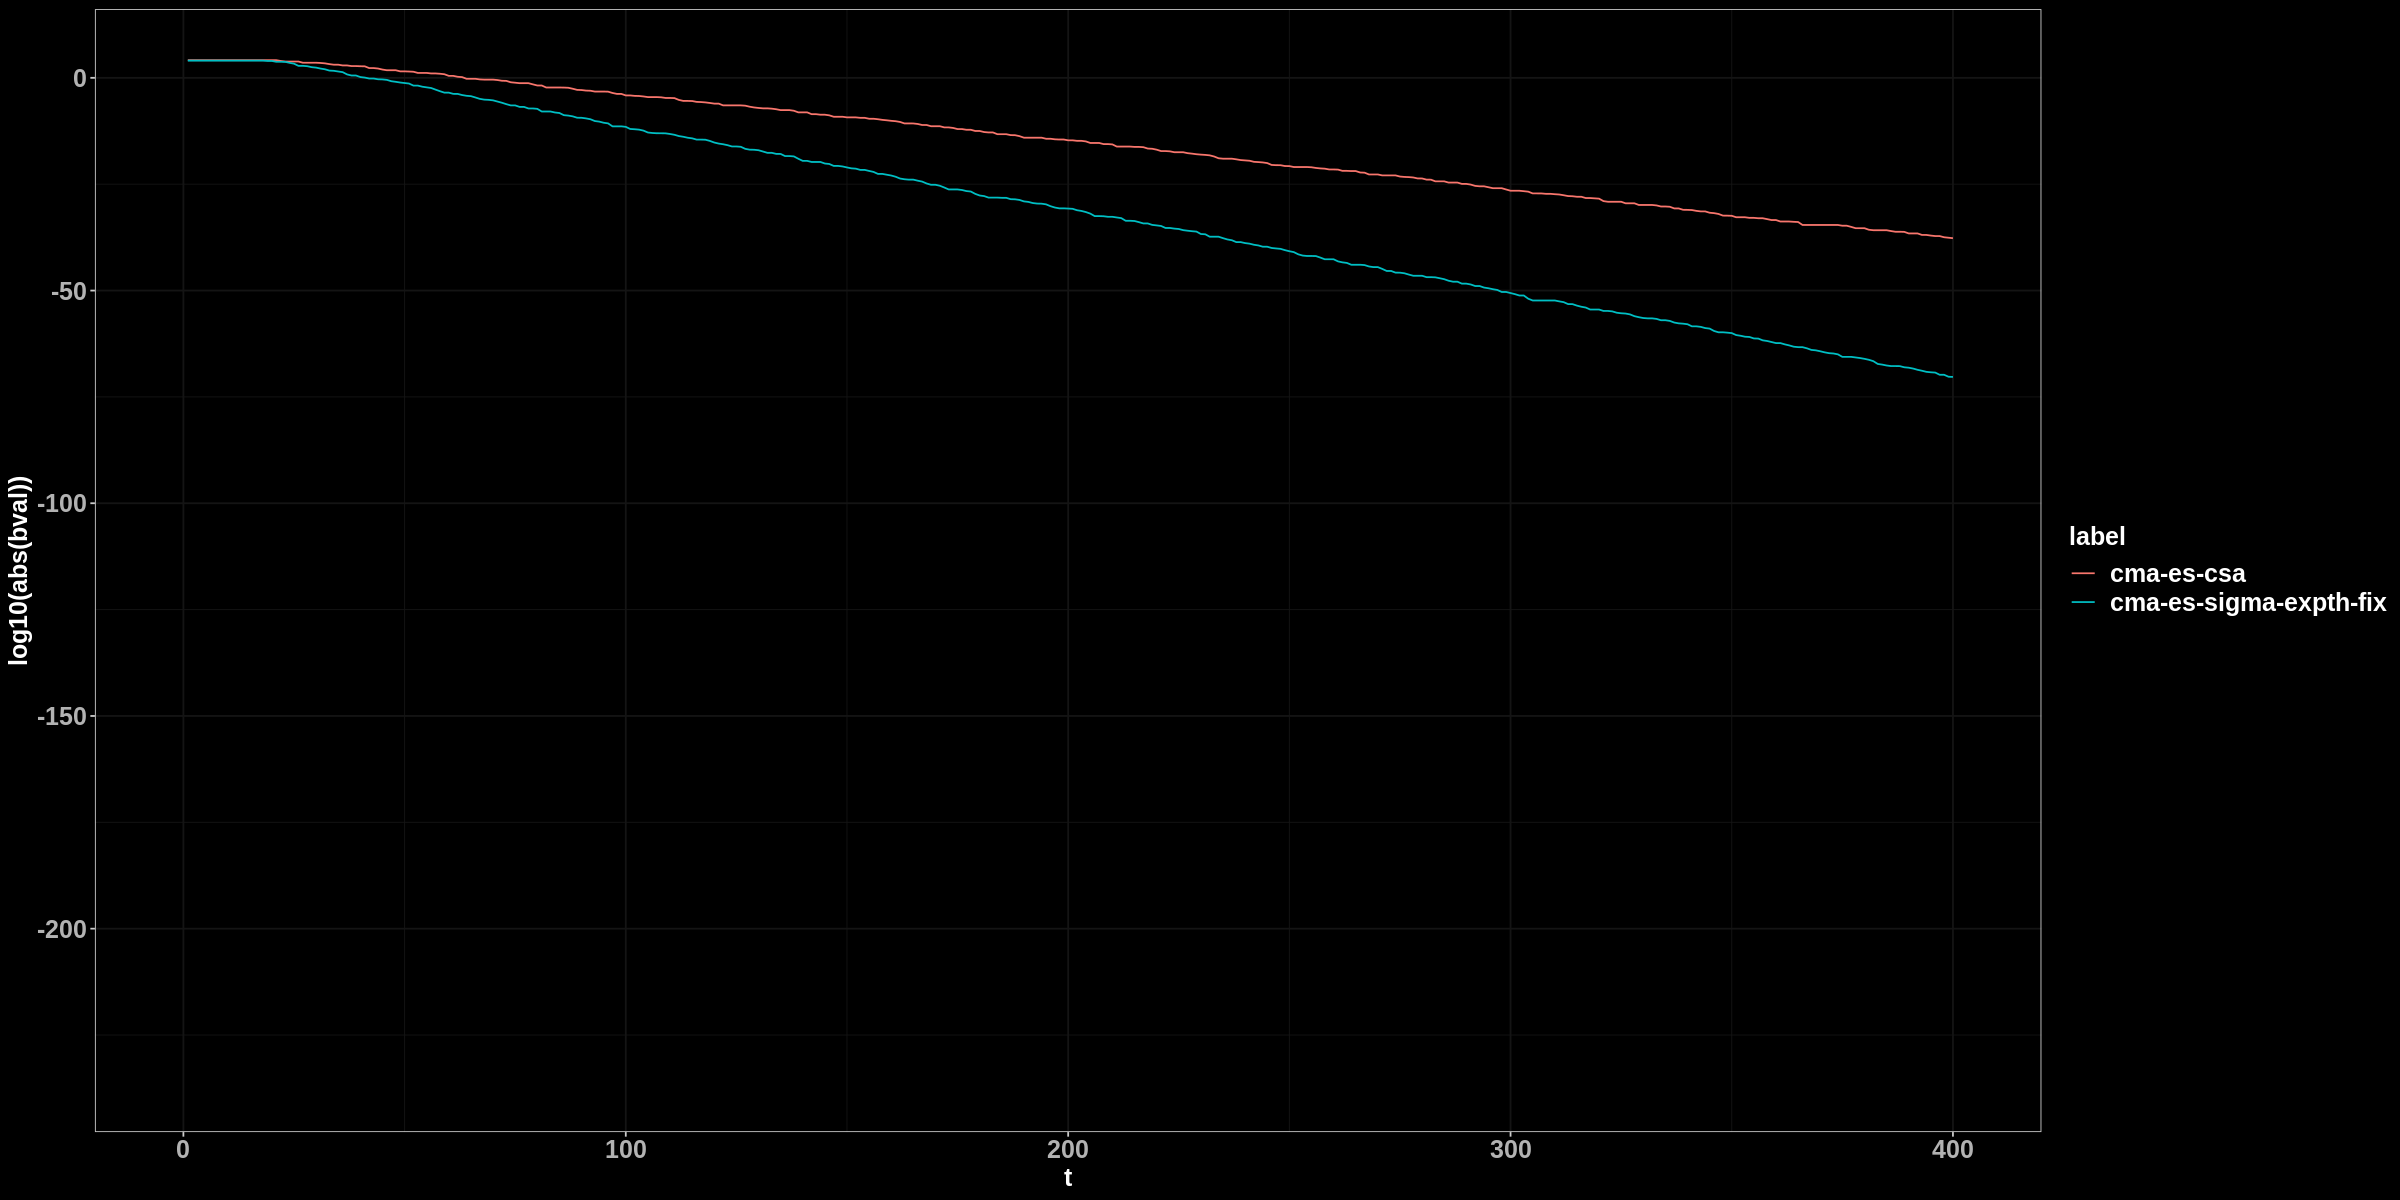

In [225]:
sigma_df %>% 
    plot_sigma(400)
sigma_df %>% 
    plot_bval(400)

## X_0 = (1, ..., 1)

In [226]:
x0 = rep(1, 10)
N = 10
maxiter = round((10000*N)/(4*N))

In [227]:
csa = 
    cma_es_csa(x0, fn = function(x) sphere_func(x), lower = -100, upper = 100, control = list(sigma = 100))

In [228]:
ppmf = 
    cma_es_expth(x0, fn = function(x) sphere_func(x), lower = -100, upper = 100, control = list(sigma = 100))

In [229]:
sigma_df = 
    list(csa, ppmf) %>% 
    get_sigma()

Warning message:
“Removed 847 row(s) containing missing values (geom_path).”
Warning message:
“Removed 847 row(s) containing missing values (geom_path).”


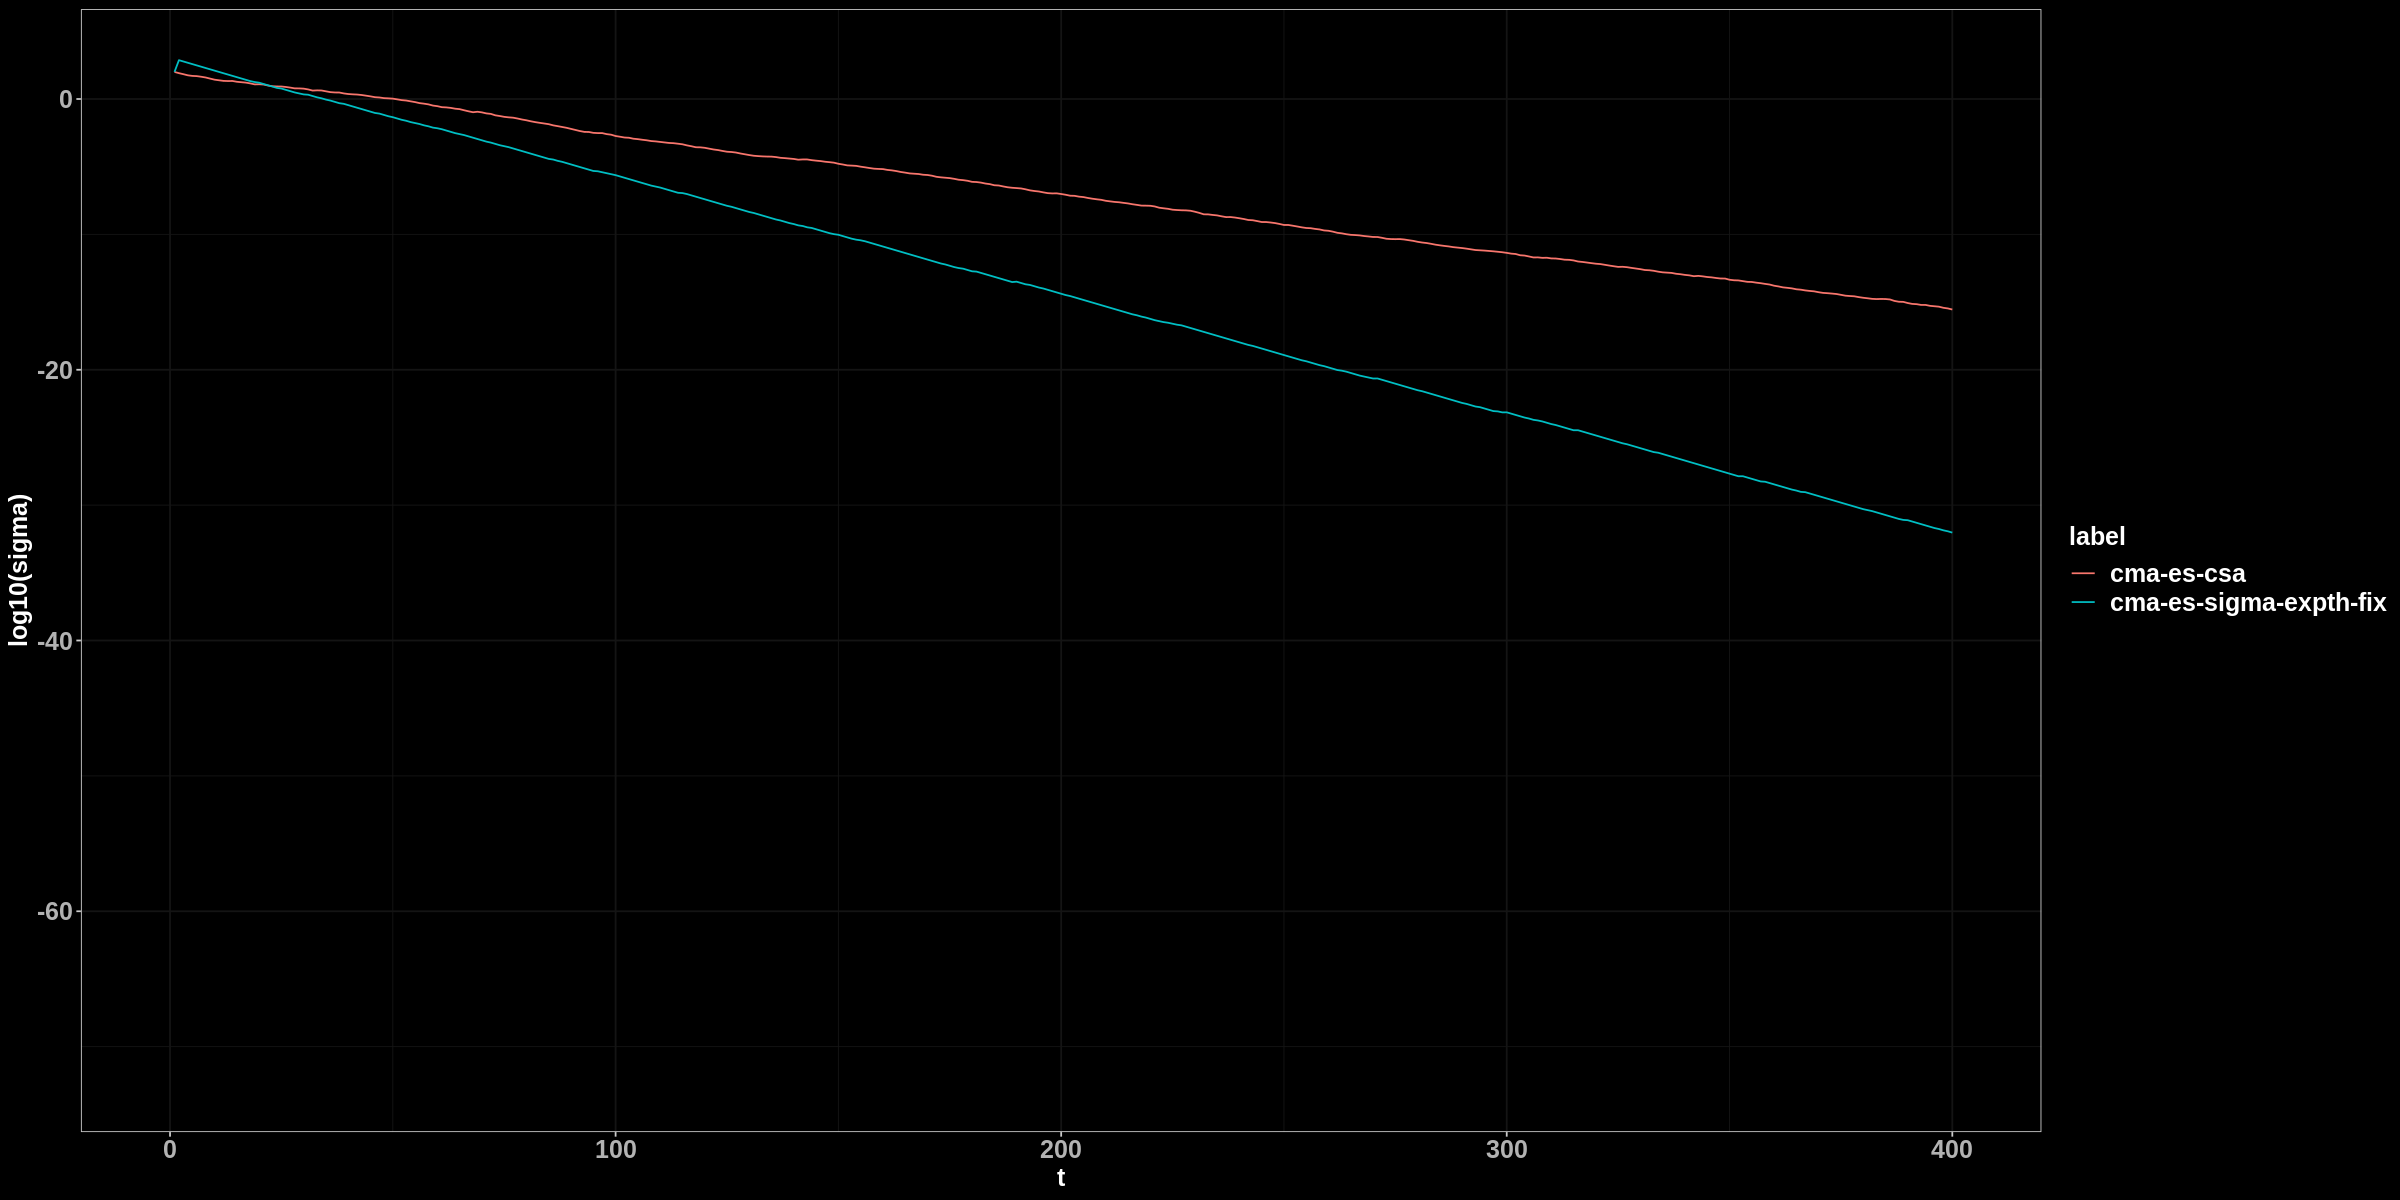

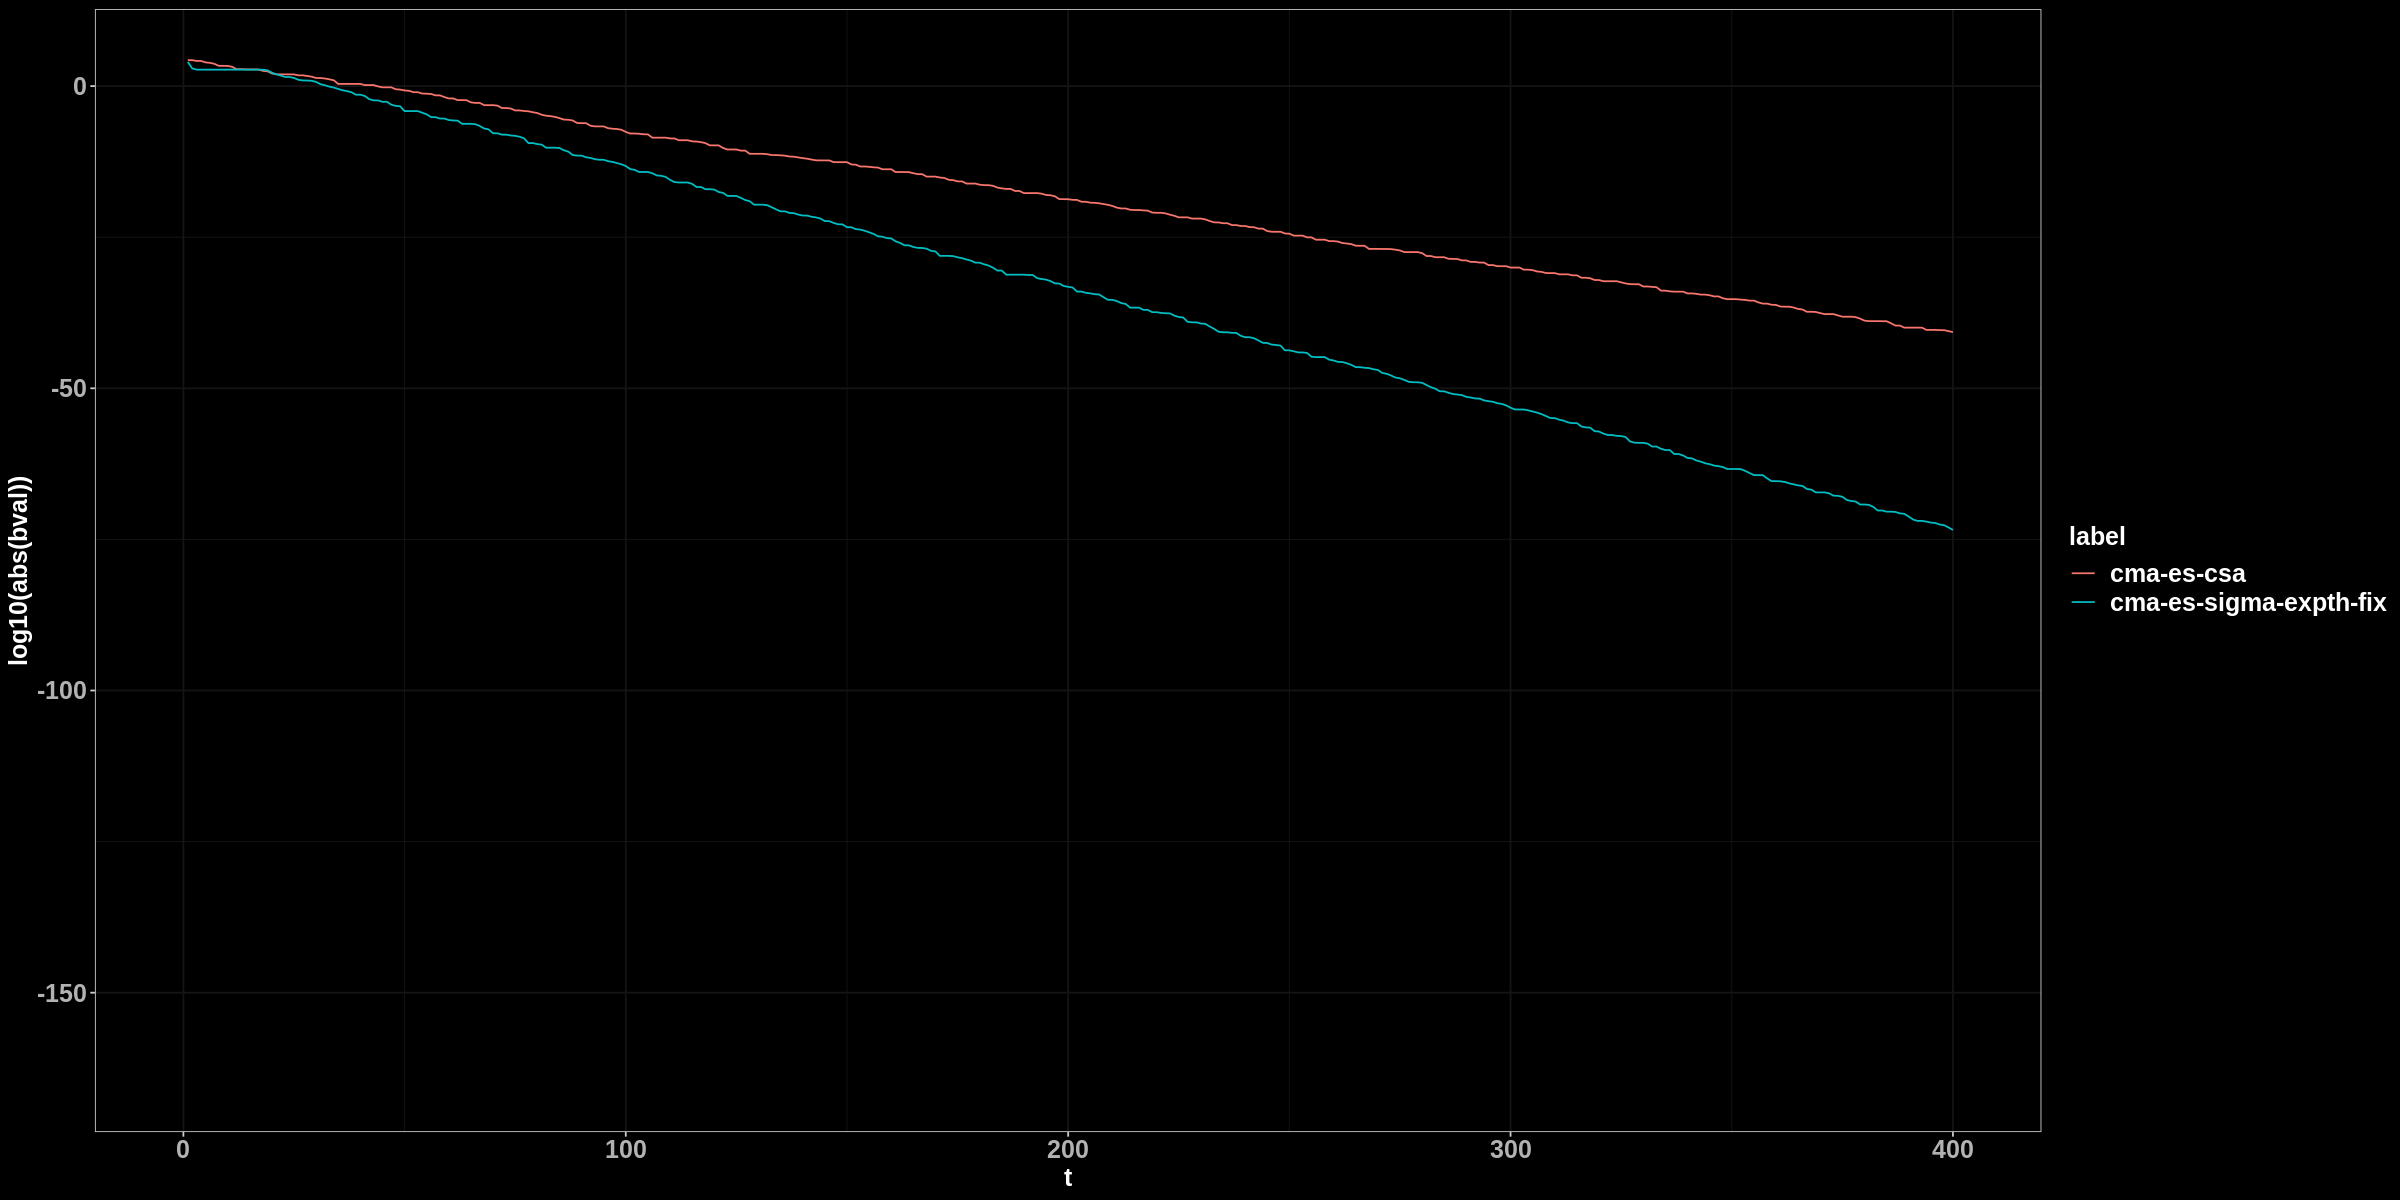

In [230]:
sigma_df %>% 
    plot_sigma(400)
sigma_df %>% 
    plot_bval(400)

# Random fitness

# White noise, sigma = 1

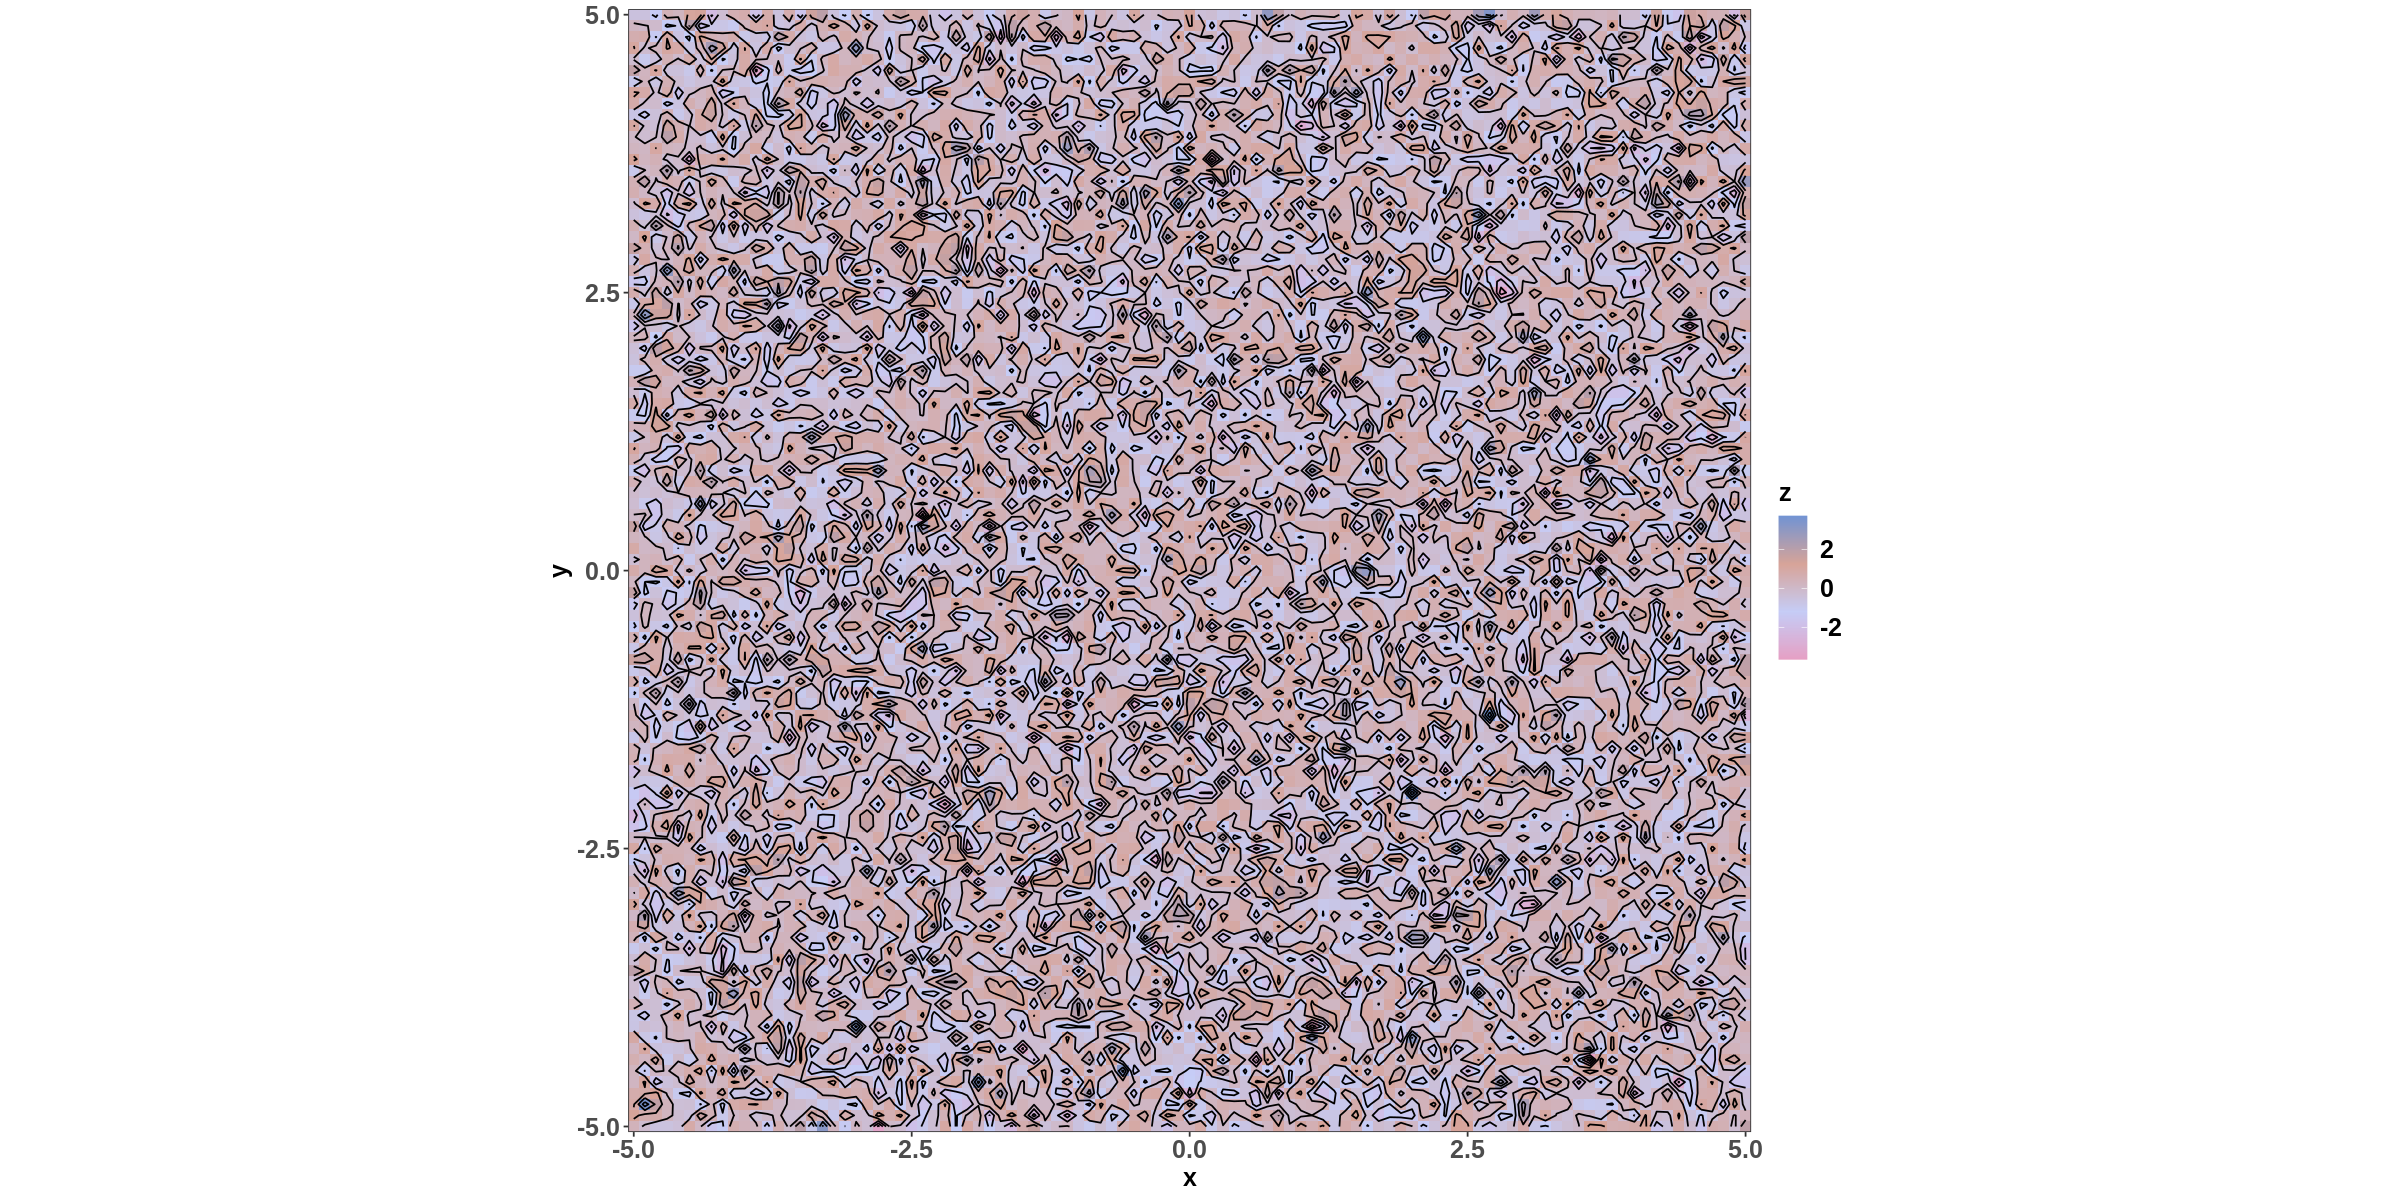

In [231]:
contour_plot(noise_func, c(-5, 5), c(-5, 5))

## X_0 = (1, ..., 1)

In [304]:
x0 = rep(0, 10)
N = 10
maxiter = round((10000*N)/(4*N))

In [305]:
csa = 
    cma_es_csa(x0, fn = function(x) noise_func(x), lower = -100, upper = 100, control = list(sigma = 1))

In [306]:
ppmf = 
    cma_es_expth(x0, fn = function(x) noise_func(x), lower = -100, upper = 100, control = list(sigma = 1))

In [307]:
tpat = 
    cma_es_tpat(x0, fn = function(x) noise_func(x), lower = -100, upper = 100, control = list(sigma = 1))              

In [308]:
sigma_df = 
    list(csa, ppmf, tpat) %>% 
    get_sigma()

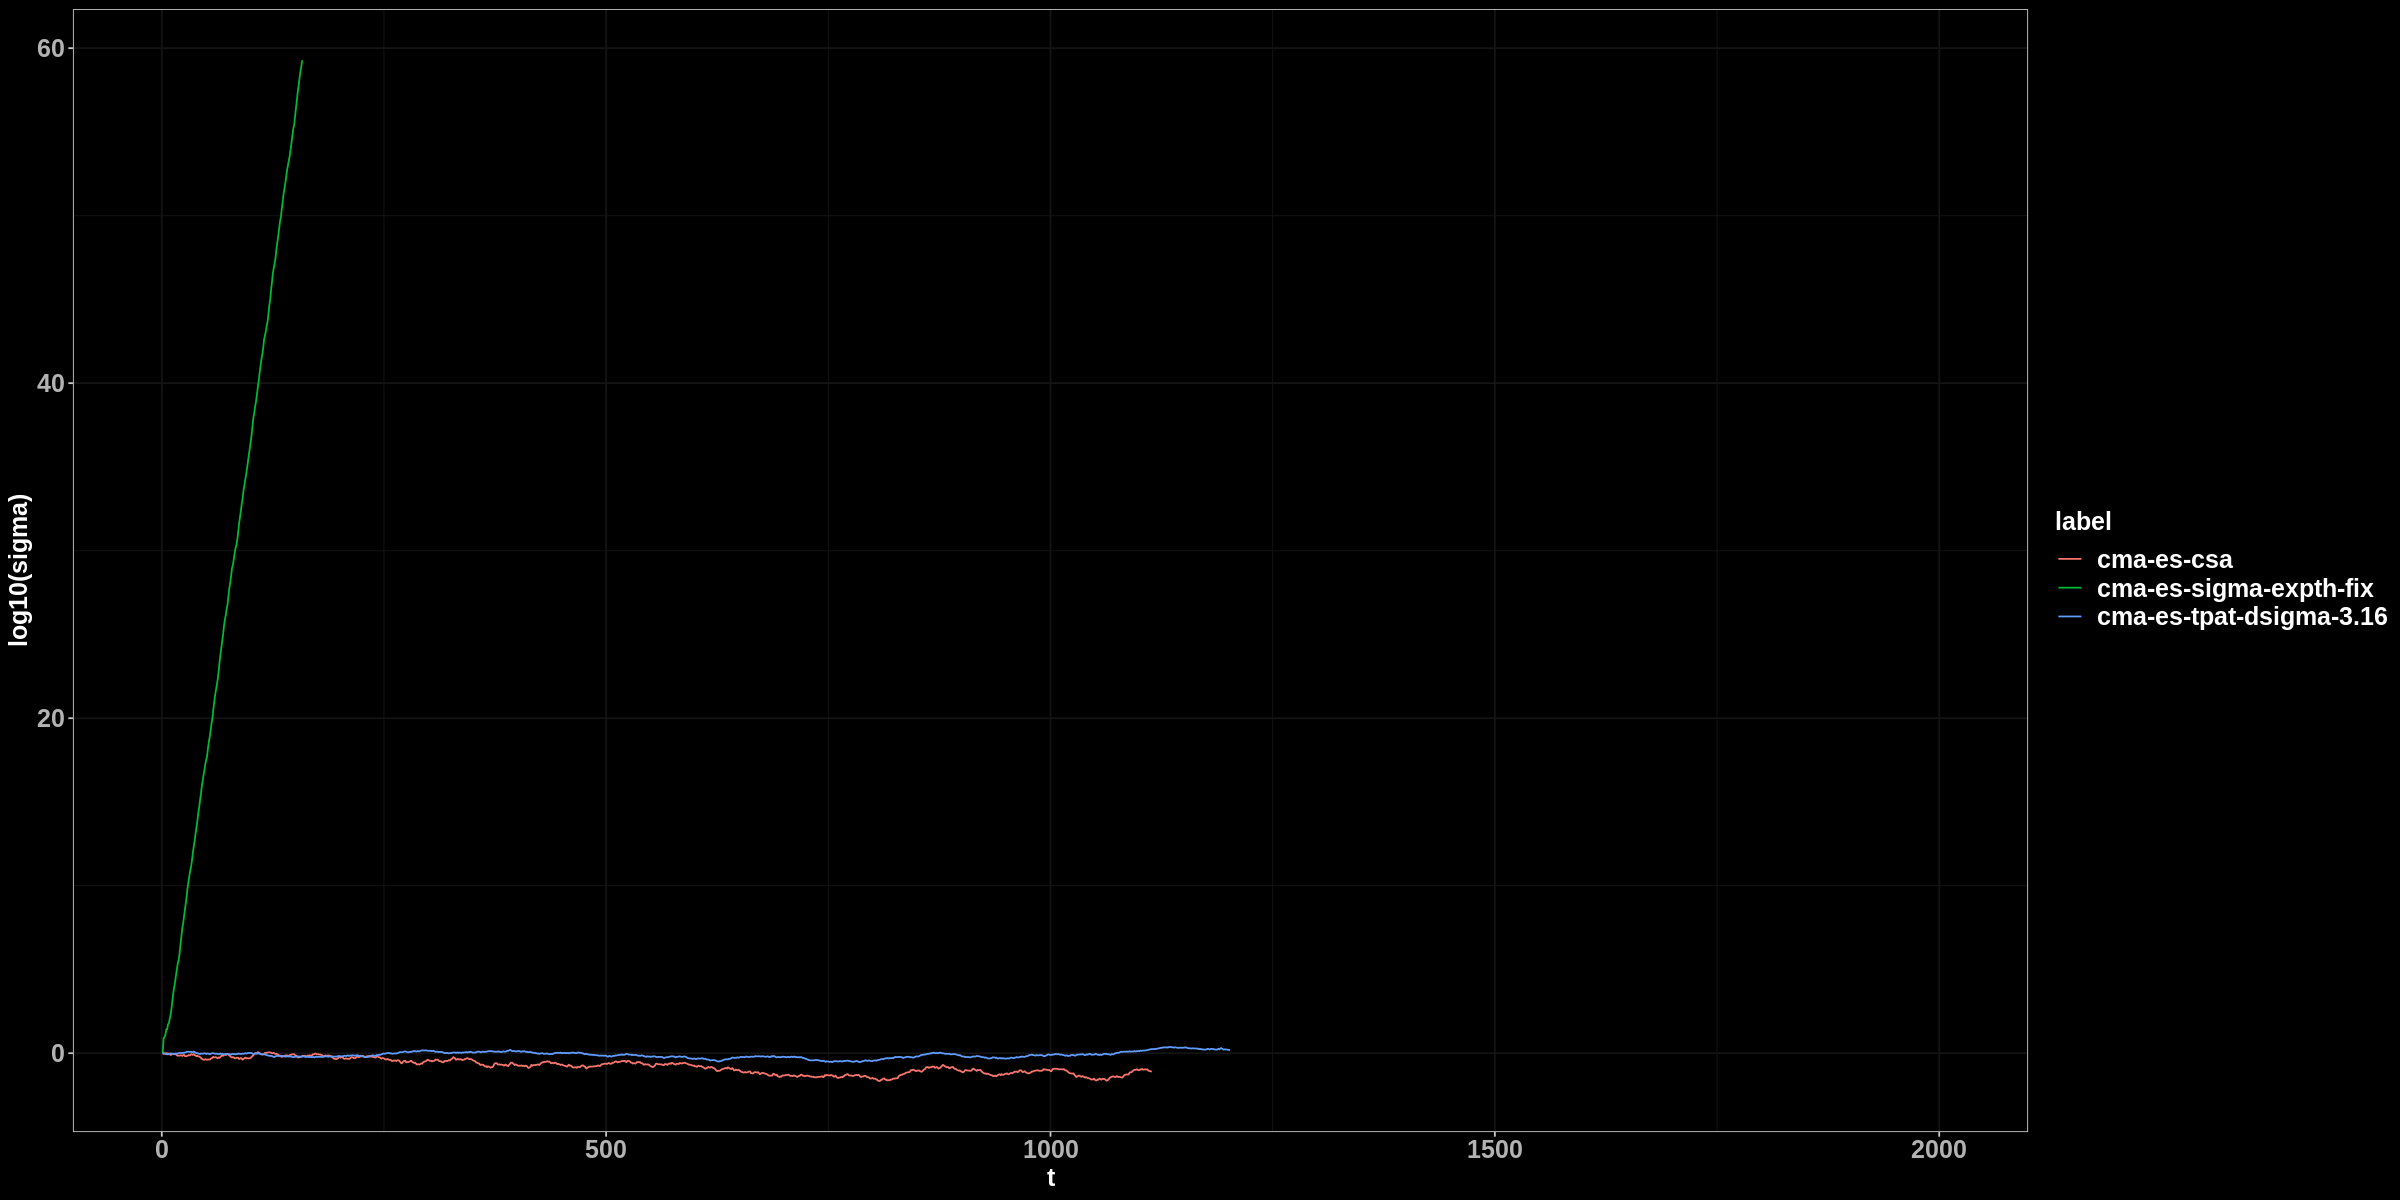

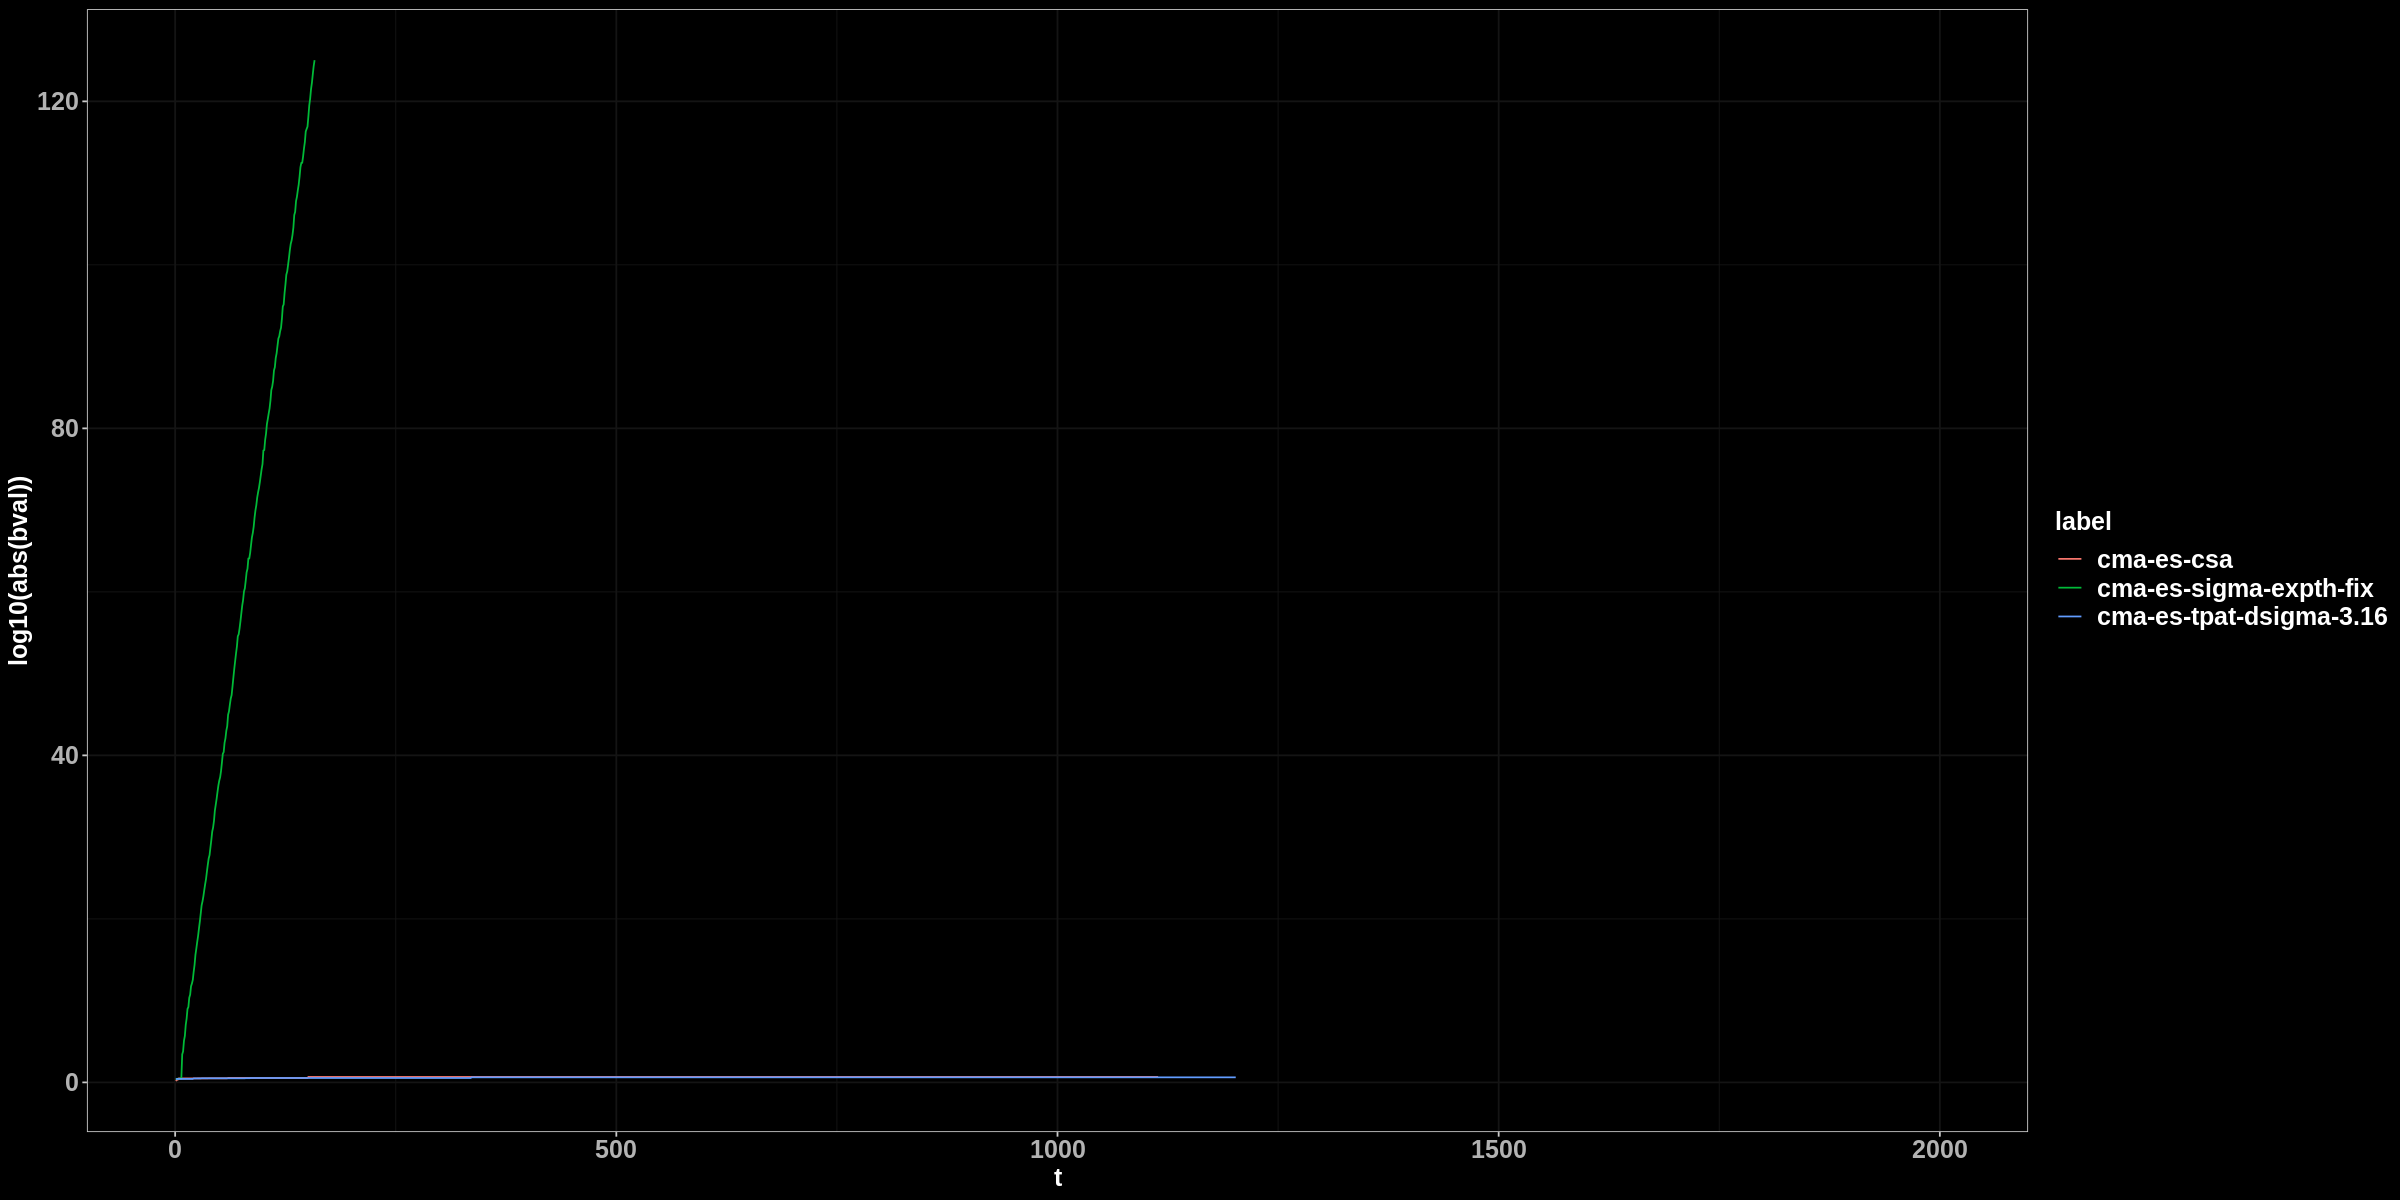

In [309]:
sigma_df %>% 
    plot_sigma(2000)
sigma_df %>% 
    plot_bval(2000)

# White noise, sigma = 0.01

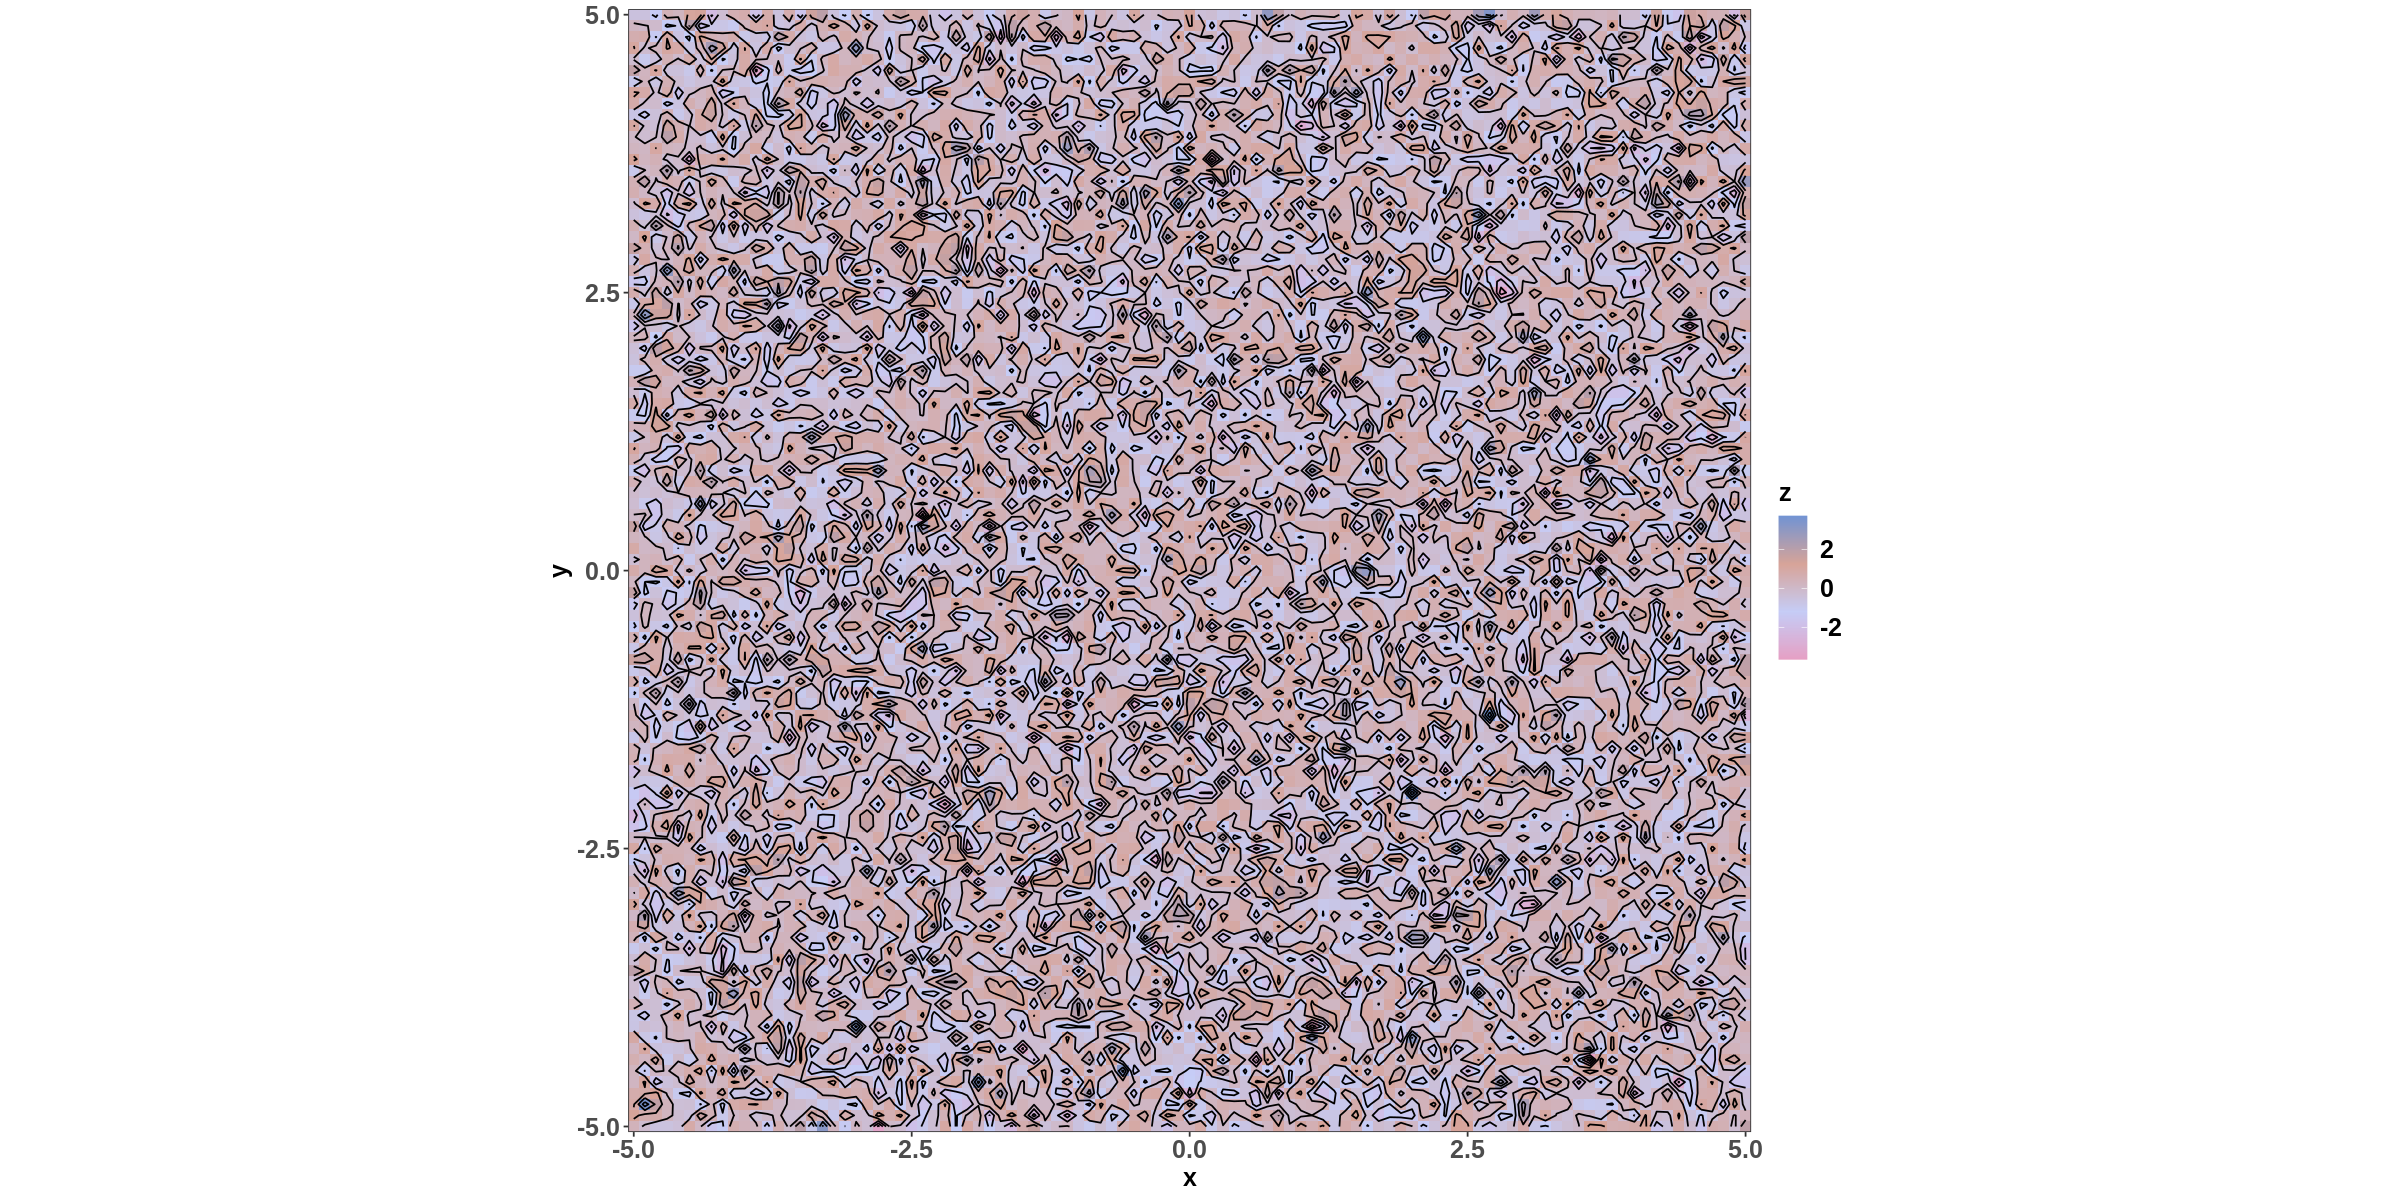

In [231]:
contour_plot(noise_func, c(-5, 5), c(-5, 5))

## X_0 = (1, ..., 1)

In [256]:
x0 = rep(0, 10)
N = 10
maxiter = round((10000*N)/(4*N))

In [257]:
csa = 
    cma_es_csa(x0, fn = function(x) noise_func(x), lower = -100, upper = 100, control = list(sigma = 0.01))

In [273]:
ppmf = 
    cma_es_expth(x0, fn = function(x) noise_func(x), lower = -100, upper = 100, control = list(sigma = 0.01, d_param = 0.3, p_target = 1/5))
 

In [310]:
tpat = 
    cma_es_tpat(x0, fn = function(x) noise_func(x), lower = -100, upper = 100, control = list(sigma = 0.01))                

In [311]:
sigma_df = 
    list(csa, ppmf, tpat) %>% 
    get_sigma()

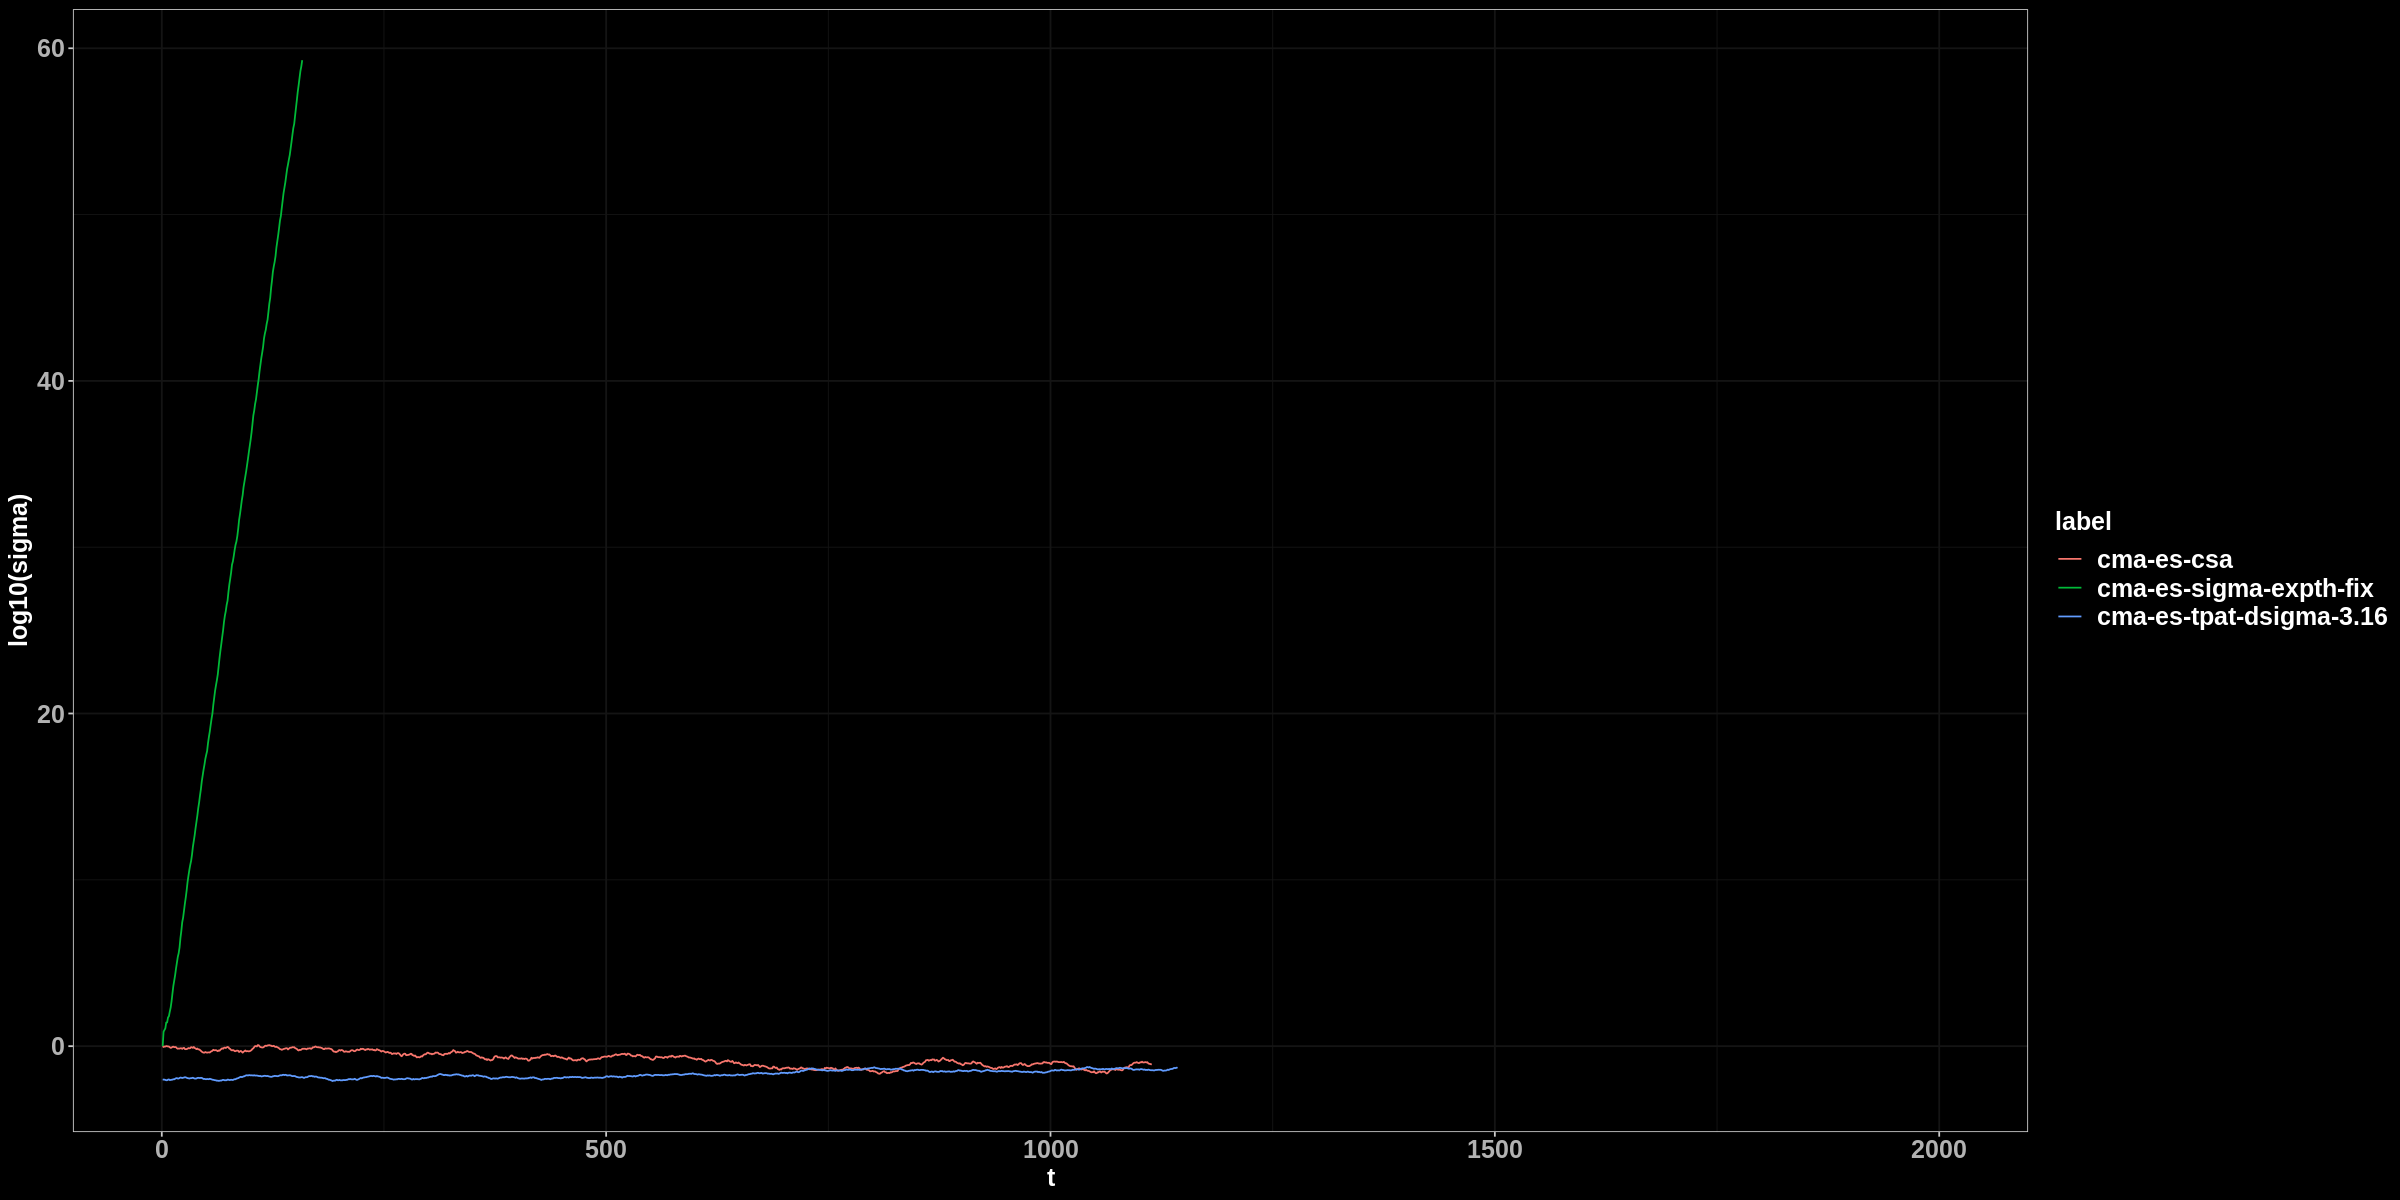

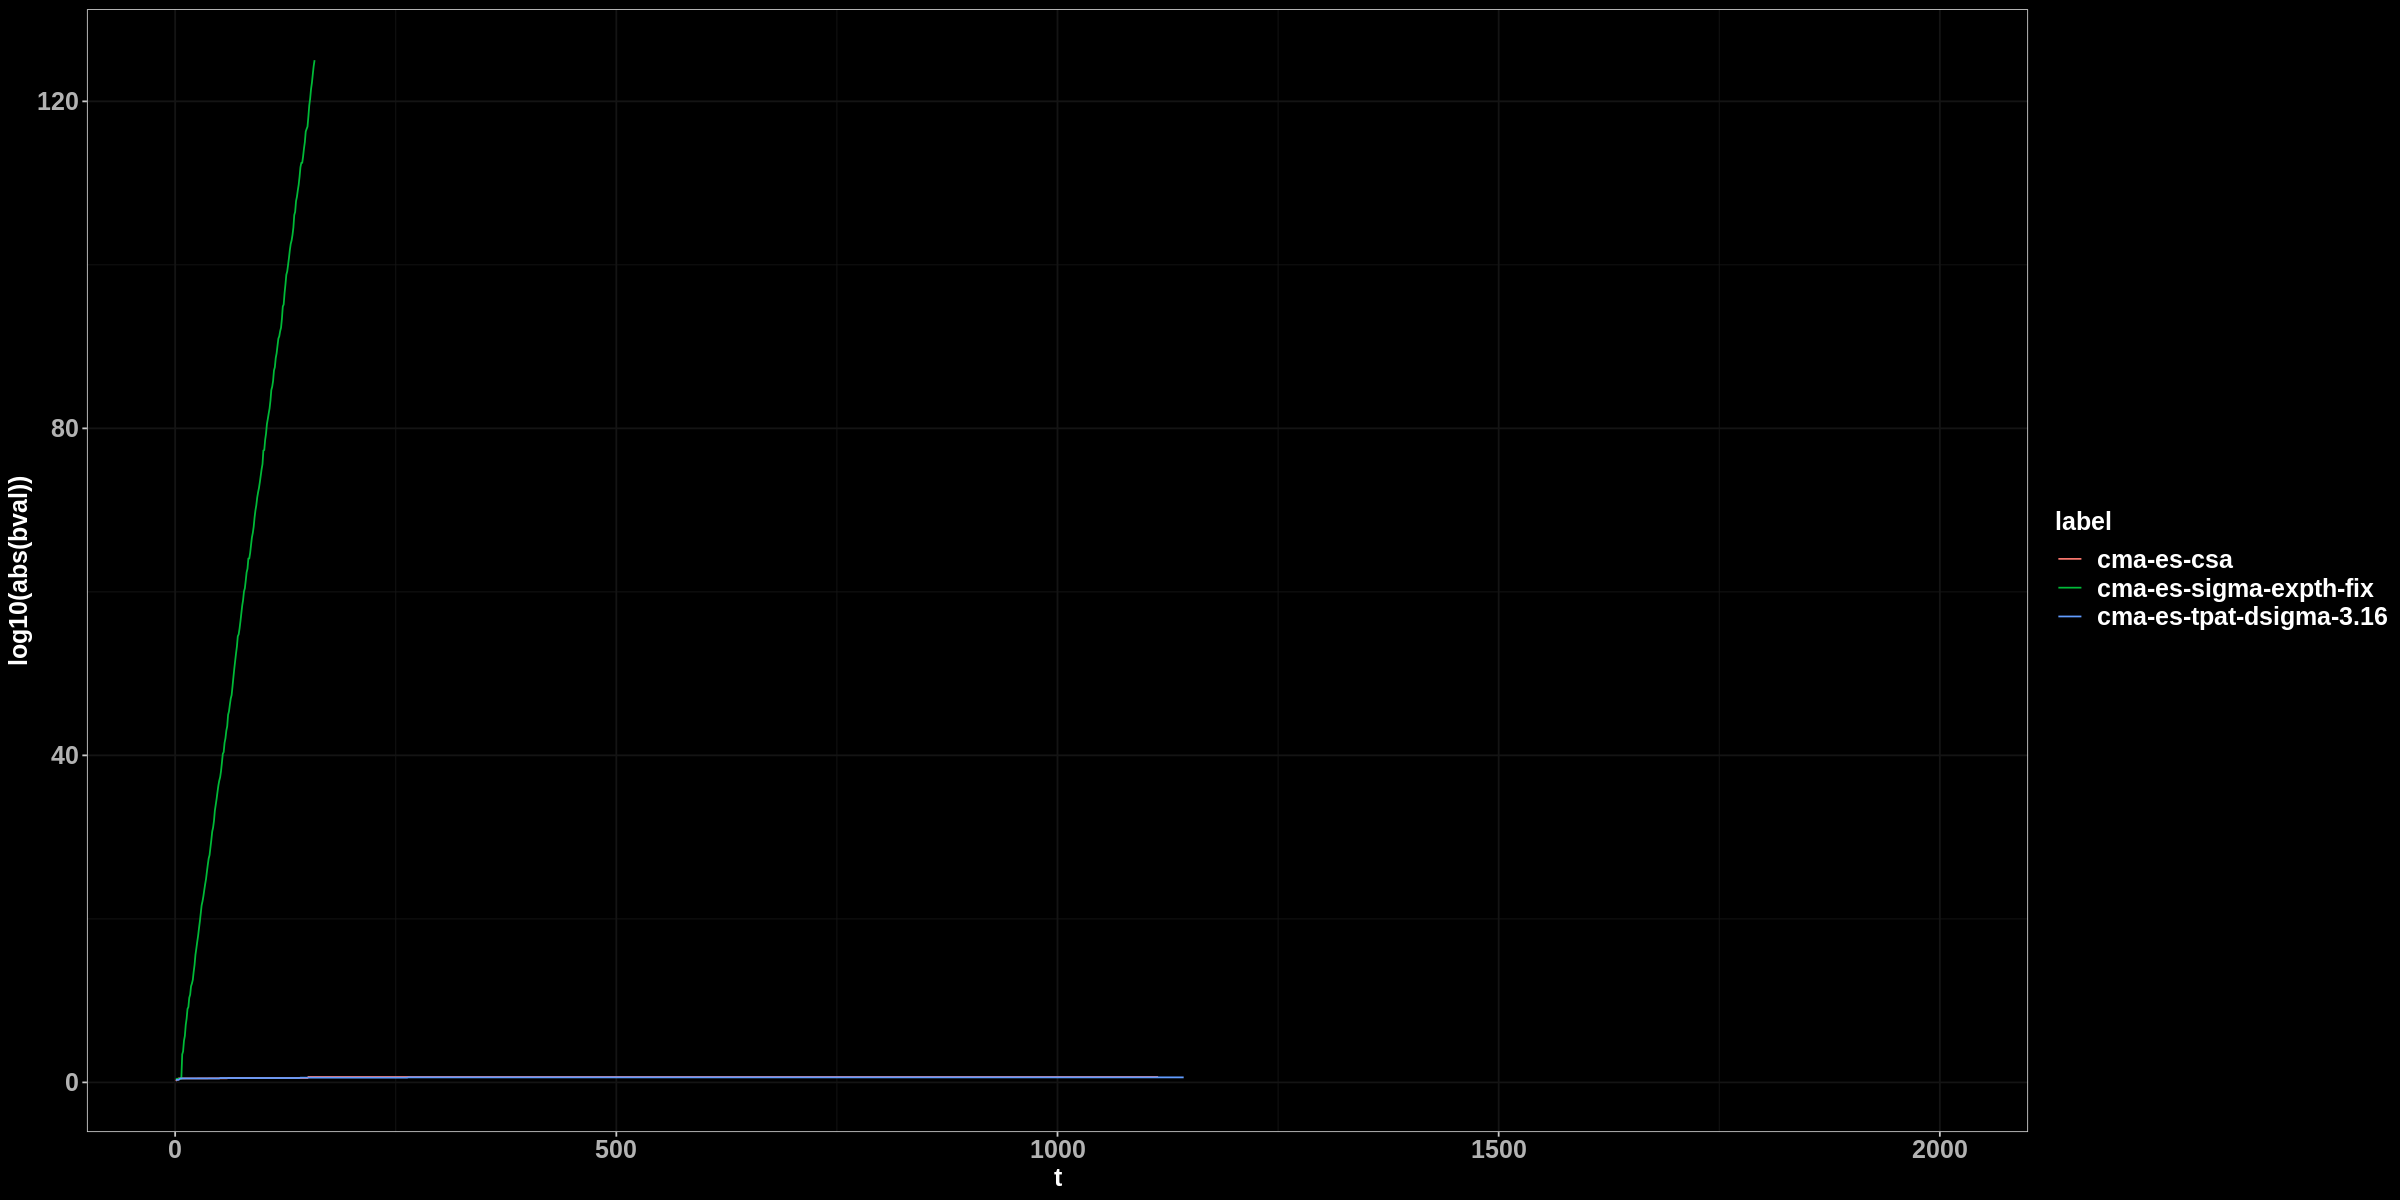

In [312]:
sigma_df %>% 
    plot_sigma(2000)
sigma_df %>% 
    plot_bval(2000)